
### LINEAR REGRESSION CASE STUDY

#### Business Case
    This particular case involved the data of 5000 customers of a Credit Card major. The objective is to understand and prioritize the metrics/parameters that were driving the total credit card spend of a customer.

#### Data file to be used
    Credit Card Data.xls: Credit Card Customer Data for 5000 customers


### Install & Load Packages

In [1]:
# install.packages("Hmisc")
# install.packages("tidyverse")
# install.packages("dplyr")
# install.packages("lubridate")
# install.packages("pastecs")
# install.packages("outliers")
# install.packages("corrplot") 
# install.packages("rcompanion") 
# install.packages("nortest")
# install.packages("ggplot2")
# install.packages("sqldf")
# install.packages("tseries")
# install.packages("forecast")
# install.packages("xlsx")
# install.packages("naniar")
# install.packages("caret")
# install.packages("fastDummies")


In [2]:
library(Hmisc)
library(dplyr)
library(lubridate)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(ggrepel)
library(forcats)
library(scales)
library(tidyr)
library(pastecs)
library(outliers)
library(corrplot)
library(rcompanion)
library(nortest)
library(ggplot2)
library(sqldf)
library(xlsx)
library(naniar)
library(caret)
library(MASS)
library(fastDummies)

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, units


Attaching package: 'dplyr'

The following objects are masked from 'package:Hmisc':

    src, summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.3     v purrr   0.3.2
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x lubridate::as.difftime() masks base::as.difftime()
x lubridate::date()        masks base::date()
x dplyr::filter(

### Import Data into R

In [3]:
cc <- read.csv("C:\\Data_Science\\Certifications\\AnalytixLabs\\Data Science in R\\Data Science with R - Final Projects\\Linear Regression - Credit Card Spend\\Credit Card Data.csv")
head(cc,5)

ï..custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
3964-QJWTRG-NPN,1,2.00,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
0648-AIPJSP-UVM,5,5.00,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
5195-TLUDJE-HVO,3,4.00,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
4459-VLPQUH-3OL,4,3.00,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
8158-SMTQFB-CNO,2,2.00,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [4]:
NROW(cc)
NCOL(cc)

[1] 5000

[1] 132

In [5]:
str(cc)

'data.frame':	5000 obs. of  132 variables:
 $ ï..custid        : Factor w/ 5000 levels "0002-GTOKLU-YVY",..: 1980 347 2606 2221 4037 4826 3670 4454 4531 1758 ...
 $ region           : num  1 5 3 4 2 4 2 3 2 2 ...
 $ townsize         : Factor w/ 6 levels "#NULL!","1.00",..: 3 6 5 4 3 5 6 5 4 3 ...
 $ gender           : num  1 0 1 0 0 0 1 1 1 0 ...
 $ age              : num  20 22 67 23 26 64 52 44 66 47 ...
 $ agecat           : num  2 2 6 2 3 5 5 4 6 4 ...
 $ birthmonth       : Factor w/ 12 levels "April","August",..: 12 9 7 9 6 2 6 11 11 6 ...
 $ ed               : num  15 17 14 16 16 17 14 16 12 11 ...
 $ edcat            : num  3 4 2 3 3 4 2 3 2 1 ...
 $ jobcat           : num  1 2 2 2 2 3 1 1 1 6 ...
 $ union            : num  1 0 0 0 0 0 0 0 0 0 ...
 $ employ           : num  0 0 16 0 1 22 10 11 15 19 ...
 $ empcat           : num  1 1 5 1 1 5 3 4 4 5 ...
 $ retire           : num  0 0 0 0 0 0 0 0 1 0 ...
 $ income           : num  31 15 35 20 23 107 77 97 16 84 ...
 $ lninc      

In [6]:
summary(cc)

           ï..custid        region        townsize        gender      
 0002-GTOKLU-YVY:   1   Min.   :1.000   #NULL!:   2   Min.   :0.0000  
 0003-RLTRGE-IW2:   1   1st Qu.:2.000   1.00  :1436   1st Qu.:0.0000  
 0003-UTGKPR-PRU:   1   Median :3.000   2.00  :1048   Median :1.0000  
 0008-ZIQQOT-SGB:   1   Mean   :3.001   3.00  : 907   Mean   :0.5036  
 0012-CIVYLF-839:   1   3rd Qu.:4.000   4.00  : 857   3rd Qu.:1.0000  
 0014-DOIOFX-LXB:   1   Max.   :5.000   5.00  : 750   Max.   :1.0000  
 (Other)        :4994                                                 
      age            agecat          birthmonth         ed       
 Min.   :18.00   Min.   :2.000   September: 458   Min.   : 6.00  
 1st Qu.:31.00   1st Qu.:3.000   May      : 451   1st Qu.:12.00  
 Median :47.00   Median :4.000   January  : 420   Median :14.00  
 Mean   :47.03   Mean   :4.239   June     : 420   Mean   :14.54  
 3rd Qu.:62.00   3rd Qu.:5.000   February : 418   3rd Qu.:17.00  
 Max.   :79.00   Max.   :6.000   Mar

In [7]:
describe(cc)

cc 

 132  Variables      5000  Observations
--------------------------------------------------------------------------------
ï..custid 
       n  missing distinct 
    5000        0     5000 

lowest : 0002-GTOKLU-YVY 0003-RLTRGE-IW2 0003-UTGKPR-PRU 0008-ZIQQOT-SGB 0012-CIVYLF-839
highest: 9991-FCIBKT-W29 9992-FSFJPL-5D6 9997-QIXKNU-54A 9998-ZGHXLK-EOT 9999-EGLHVE-19G
--------------------------------------------------------------------------------
region 
       n  missing distinct     Info     Mean      Gmd 
    5000        0        5     0.96    3.001    1.609 
                                        
Value          1     2     3     4     5
Frequency   1009   995  1003   966  1027
Proportion 0.202 0.199 0.201 0.193 0.205
--------------------------------------------------------------------------------
townsize 
       n  missing distinct 
    5000        0        6 
                                                    
Value      #NULL!   1.00   2.00   3.00   4.00   5.00
Frequency   

### Exploratory Data Analysis

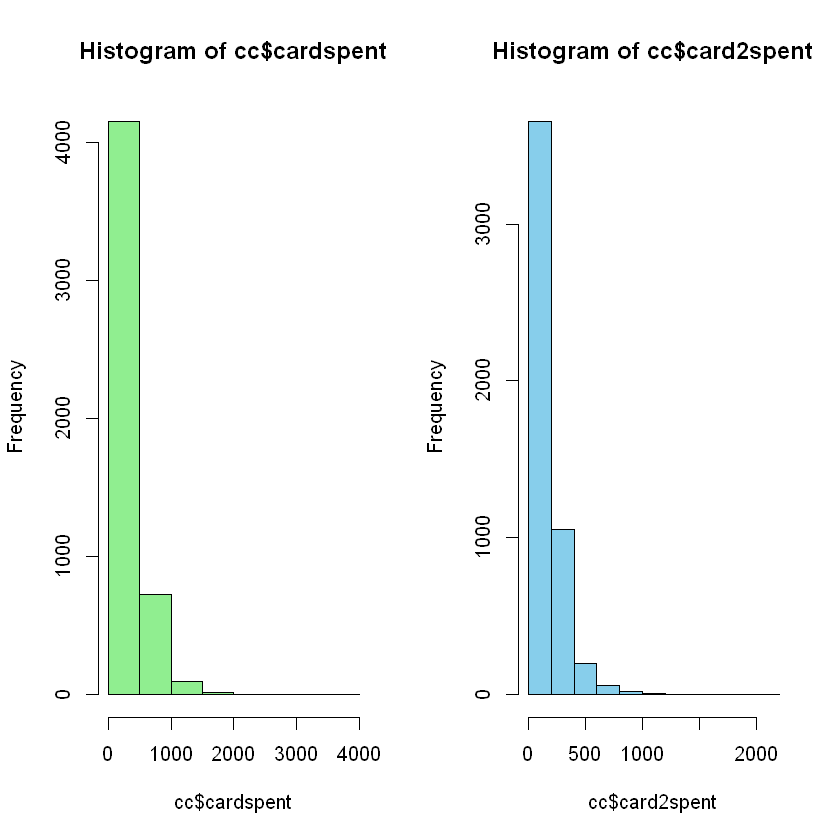

In [8]:
#Distribution of primary and secondary spends

par(mfrow=c(1,2))
hist(cc$cardspent, col = "lightgreen")
hist(cc$card2spent, col = "skyblue")

In [9]:
#Creating a new Derived Variable "TotalCreditSpend" which is a summation of primary and secondary spend
cc$total_spend = cc$cardspent + cc$card2spent

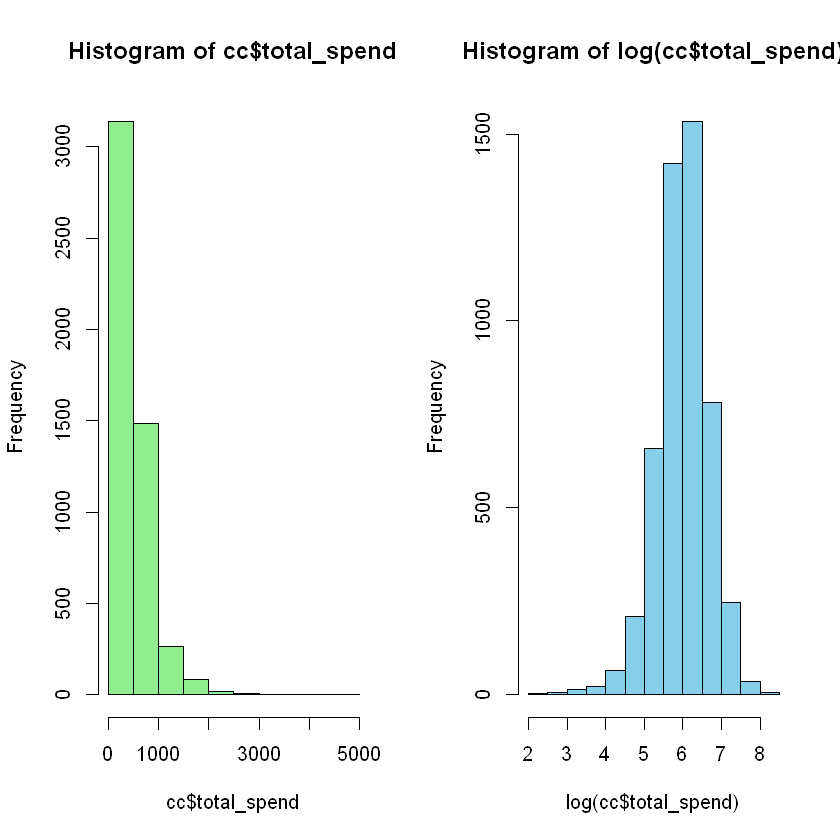

In [10]:
#Distribution of total_spend
#Log Transforming dependent variable to make it a Normal Distribution

par(mfrow=c(1,2))
hist(cc$total_spend, col = "lightgreen")
hist(log(cc$total_spend),col = "skyblue")

cc$ln_Total_spend <- log(cc$total_spend)

# Drop the total_spend variable
cc <- subset(cc,select = -c(total_spend))


#### Drop "cardspent"(Primary card), "card2spend"(Secondary card), carditems,card2items as they are dependant on spending

In [11]:
cc <- subset(cc,select = -c(cardspent,card2spent,ï..custid,birthmonth,carditems,card2items))
names(cc)

[1] "region"            "townsize"          "gender"           
  [4] "age"               "agecat"            "ed"               
  [7] "edcat"             "jobcat"            "union"            
 [10] "employ"            "empcat"            "retire"           
 [13] "income"            "lninc"             "inccat"           
 [16] "debtinc"           "creddebt"          "lncreddebt"       
 [19] "othdebt"           "lnothdebt"         "default"          
 [22] "jobsat"            "marital"           "spoused"          
 [25] "spousedcat"        "reside"            "pets"             
 [28] "pets_cats"         "pets_dogs"         "pets_birds"       
 [31] "pets_reptiles"     "pets_small"        "pets_saltfish"    
 [34] "pets_freshfish"    "homeown"           "hometype"         
 [37] "address"           "addresscat"        "cars"             
 [40] "carown"            "cartype"           "carvalue"         
 [43] "carcatvalue"       "carbought"         "carbuy"           
 [46] "commute"           "commutecat"        "commutetime"      
 [49] "commutecar"        "commutemotorcycle" "commutecarpool"   
 [52] "commutebus"        "commuterail"       "commutepublic"    
 [55] "commutebike"       "commutewalk"       "commutenonmotor"  
 [58] "telecommute"       "reason"            "polview"          
 [61] "polparty"          "polcontrib"        "vote"             
 [64] "card"              "cardtype"          "cardbenefit"      
 [67] "cardfee"           "cardtenure"        "cardtenurecat"    
 [70] "card2"             "card2type"         "card2benefit"     
 [73] "card2fee"          "card2tenure"       "card2tenurecat"   
 [76] "active"            "bfast"             "tenure"           
 [79] "churn"             "longmon"           "lnlongmon"        
 [82] "longten"           "lnlongten"         "tollfree"         
 [85] "tollmon"           "lntollmon"         "tollten"          
 [88] "lntollten"         "equip"             "equipmon"         
 [91] "lnequipmon"        "equipten"          "lnequipten"       
 [94] "callcard"          "cardmon"           "lncardmon"        
 [97] "cardten"           "lncardten"         "wireless"         
[100] "wiremon"           "lnwiremon"         "wireten"          
[103] "lnwireten"         "multline"          "voice"            
[106] "pager"             "internet"          "callid"           
[109] "callwait"          "forward"           "confer"           
[112] "ebill"             "owntv"             "hourstv"          
[115] "ownvcr"            "owndvd"            "owncd"            
[118] "ownpda"            "ownpc"             "ownipod"          
[121] "owngame"           "ownfax"            "news"             
[124] "response_01"       "response_02"       "response_03"      
[127] "ln_Total_spend"

### Segregate into Categorical & Numerical variables

In [12]:
# Numeric variables
cc_num <- subset(cc,select = -c(region,townsize,gender,agecat,edcat,jobcat,union,
                                       empcat,retire,inccat,default,jobsat,marital,spousedcat,
                                       homeown,hometype,address,addresscat,cars,carown,cartype,
                                       carcatvalue,carbought,carbuy,commute,commutecat,commutecar,
                                       commutemotorcycle,commutecarpool,commutebus,commuterail,
                                       commutepublic,commutebike,commutewalk,commutenonmotor,
                                       telecommute,reason,polview,polparty,polcontrib,vote,card,
                                       cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,
                                       card2type,card2benefit,card2fee,card2tenure,card2tenurecat,
                                       active,bfast,churn,tollfree,equip,callcard,wireless,multline,
                                       voice,pager,internet,callid,callwait,forward,confer,ebill,
                                       owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,
                                       news,response_01,response_02,response_03))

num_var <- names(cc_num)
cc_num <- as.data.frame(lapply(cc_num,as.numeric))

head(cc_num,5)
str(cc_num)

age,ed,employ,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,...,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,ln_Total_spend
20,15,0,31,3.43,11.1,1.20,377,2.24,320,...,14.25,45,595,42,0.00,1,0.00,1,13,5.007029
22,17,0,15,2.71,18.6,1.22,379,1.57,284,...,16.00,52,600,150,45.65,108,1683.55,330,18,4.350794
67,14,16,35,3.56,9.9,0.93,7,2.54,332,...,23.00,80,103,234,0.00,1,0.00,1,21,5.886021
23,16,0,20,3.00,5.7,0.02,331,1.12,250,...,21.00,72,621,162,0.00,1,0.00,1,26,5.884464
26,16,1,23,3.14,1.7,0.21,154,0.18,169,...,17.25,57,478,102,19.05,22,410.80,190,27,6.230147


'data.frame':	5000 obs. of  45 variables:
 $ age           : num  20 22 67 23 26 64 52 44 66 47 ...
 $ ed            : num  15 17 14 16 16 17 14 16 12 11 ...
 $ employ        : num  0 0 16 0 1 22 10 11 15 19 ...
 $ income        : num  31 15 35 20 23 107 77 97 16 84 ...
 $ lninc         : num  3.43 2.71 3.56 3 3.14 4.67 4.34 4.57 2.77 4.43 ...
 $ debtinc       : num  11.1 18.6 9.9 5.7 1.7 5.6 1.9 14.4 2.6 4.1 ...
 $ creddebt      : num  1.2 1.22 0.93 0.02 0.21 1.06 0.5 5.95 0.1 1.77 ...
 $ lncreddebt    : num  377 379 7 331 154 365 69 537 228 416 ...
 $ othdebt       : num  2.24 1.57 2.54 1.12 0.18 4.93 0.96 8.02 0.31 1.67 ...
 $ lnothdebt     : num  320 284 332 250 169 399 4 447 116 291 ...
 $ spoused       : num  -1 -1 13 18 13 -1 -1 15 -1 -1 ...
 $ reside        : num  3 2 3 5 4 1 1 2 1 2 ...
 $ pets          : num  0 6 3 0 0 11 2 10 1 1 ...
 $ pets_cats     : num  0 0 2 0 0 1 0 0 1 1 ...
 $ pets_dogs     : num  0 0 1 0 0 1 2 2 0 0 ...
 $ pets_birds    : num  0 0 0 0 0 0 0 0 0 0 ...

In [13]:
# Categorical variables
cc_cat <- subset(cc,select = c(region,townsize,gender,agecat,edcat,jobcat,union,
                                    empcat,retire,inccat,default,jobsat,marital,spousedcat,
                                    homeown,hometype,address,addresscat,cars,carown,cartype,
                                    carcatvalue,carbought,carbuy,commute,commutecat,commutecar,
                                    commutemotorcycle,commutecarpool,commutebus,commuterail,
                                    commutepublic,commutebike,commutewalk,commutenonmotor,
                                    telecommute,reason,polview,polparty,polcontrib,vote,card,
                                    cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,
                                    card2type,card2benefit,card2fee,card2tenure,card2tenurecat,
                                    active,bfast,churn,tollfree,equip,callcard,wireless,multline,
                                    voice,pager,internet,callid,callwait,forward,confer,ebill,
                                    owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,
                                    news,response_01,response_02,response_03))

cat_var <- names(cc_cat)
cc_cat <- as.data.frame(lapply(cc_cat,as.factor))


str(cc_cat)
head(cc_cat)

'data.frame':	5000 obs. of  82 variables:
 $ region           : Factor w/ 5 levels "1","2","3","4",..: 1 5 3 4 2 4 2 3 2 2 ...
 $ townsize         : Factor w/ 6 levels "#NULL!","1.00",..: 3 6 5 4 3 5 6 5 4 3 ...
 $ gender           : Factor w/ 2 levels "0","1": 2 1 2 1 1 1 2 2 2 1 ...
 $ agecat           : Factor w/ 5 levels "2","3","4","5",..: 1 1 5 1 2 4 4 3 5 3 ...
 $ edcat            : Factor w/ 5 levels "1","2","3","4",..: 3 4 2 3 3 4 2 3 2 1 ...
 $ jobcat           : Factor w/ 6 levels "1","2","3","4",..: 1 2 2 2 2 3 1 1 1 6 ...
 $ union            : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 1 1 ...
 $ empcat           : Factor w/ 5 levels "1","2","3","4",..: 1 1 5 1 1 5 3 4 4 5 ...
 $ retire           : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 1 ...
 $ inccat           : Factor w/ 5 levels "1","2","3","4",..: 2 1 2 1 1 4 4 4 1 4 ...
 $ default          : Factor w/ 2 levels "0","1": 2 2 1 2 1 1 1 1 1 1 ...
 $ jobsat           : Factor w/ 5 levels "1","2","3","4",..: 1 1 4 

region,townsize,gender,agecat,edcat,jobcat,union,empcat,retire,inccat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
1,2.00,1,2,3,1,1,1,0,2,...,0,0,0,1,1,0,0,0,1,0
5,5.00,0,2,4,2,0,1,0,1,...,1,1,1,1,1,1,1,0,0,0
3,4.00,1,6,2,2,0,5,0,2,...,1,0,0,0,0,0,1,0,0,0
4,3.00,0,2,3,2,0,1,0,1,...,1,0,1,1,1,0,1,1,0,0
2,2.00,0,3,3,2,0,1,0,1,...,1,0,1,0,1,0,0,0,1,0
4,4.00,0,5,4,3,0,5,0,4,...,1,1,0,0,0,0,0,0,1,0


In [14]:
str(cc_cat)

'data.frame':	5000 obs. of  82 variables:
 $ region           : Factor w/ 5 levels "1","2","3","4",..: 1 5 3 4 2 4 2 3 2 2 ...
 $ townsize         : Factor w/ 6 levels "#NULL!","1.00",..: 3 6 5 4 3 5 6 5 4 3 ...
 $ gender           : Factor w/ 2 levels "0","1": 2 1 2 1 1 1 2 2 2 1 ...
 $ agecat           : Factor w/ 5 levels "2","3","4","5",..: 1 1 5 1 2 4 4 3 5 3 ...
 $ edcat            : Factor w/ 5 levels "1","2","3","4",..: 3 4 2 3 3 4 2 3 2 1 ...
 $ jobcat           : Factor w/ 6 levels "1","2","3","4",..: 1 2 2 2 2 3 1 1 1 6 ...
 $ union            : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 1 1 ...
 $ empcat           : Factor w/ 5 levels "1","2","3","4",..: 1 1 5 1 1 5 3 4 4 5 ...
 $ retire           : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 1 ...
 $ inccat           : Factor w/ 5 levels "1","2","3","4",..: 2 1 2 1 1 4 4 4 1 4 ...
 $ default          : Factor w/ 2 levels "0","1": 2 2 1 2 1 1 1 1 1 1 ...
 $ jobsat           : Factor w/ 5 levels "1","2","3","4",..: 1 1 4 

#### Find and Replace all offending strings with a NA

In [15]:
# There are some missing strings like #NULL! that should be replaced by "NA"
# Write out all the offending strings
# Later we will handle all such NAs together
na_strings <- c("#NULL!", "NA", "N A", "N / A", "N/A", "N/ A", "Not Available", "NOt available")
cc_num <- cc_num %>% naniar::replace_with_na_all(condition = ~.x %in% na_strings)


#### Drop the Numerical variables which tend to have higher percentage of missing values(#NULL!)

In [16]:
cc_num$lntollmon <- NULL
cc_num$lntollten <- NULL
cc_num$lnequipmon <- NULL
cc_num$lnequipten <- NULL
cc_num$lncardmon <- NULL
cc_num$lncardten <- NULL
cc_num$lnwiremon <- NULL
cc_num$lnwireten <- NULL


In [17]:
names(cc_num)

[1] "age"            "ed"             "employ"         "income"        
 [5] "lninc"          "debtinc"        "creddebt"       "lncreddebt"    
 [9] "othdebt"        "lnothdebt"      "spoused"        "reside"        
[13] "pets"           "pets_cats"      "pets_dogs"      "pets_birds"    
[17] "pets_reptiles"  "pets_small"     "pets_saltfish"  "pets_freshfish"
[21] "carvalue"       "commutetime"    "tenure"         "longmon"       
[25] "lnlongmon"      "longten"        "lnlongten"      "tollmon"       
[29] "tollten"        "equipmon"       "equipten"       "cardmon"       
[33] "cardten"        "wiremon"        "wireten"        "hourstv"       
[37] "ln_Total_spend"

#### Descriptive Statistics

In [18]:
# Statistics for Numeric variables

mystats_num = function(x) {
  nmiss=sum(is.na(x))
  c = class(x)
  a = x[!is.na(x)]
  m = mean(a,na.rm = T)
  med=median(a,na.rm = T)
  n = length(a)
  s = sd(a,na.rm = T)
  min = min(a,na.rm = T)
  q1=quantile(a,0.25,na.rm = T)
  q2=quantile(a,0.5,na.rm = T)
  q3=quantile(a,0.75,na.rm = T)
  p99=quantile(a,0.99,na.rm = T)
  max = max(a,na.rm = T)
  UC = m+3*s
  LC = m-3*s
  outlier_flag= max>1.5*(p99)
  return(c(class=c,n=n, nmiss=nmiss, outlier_flag=outlier_flag, mean=m,median=med, stdev=s,min = min,
           q1=q1,q2=q2,q3=q3,p99=p99,max=max, UC=UC, LC=LC ))
}

In [19]:
#Statistics for Categorical variables

mystats_cat=function(x){
    Var_Type=class(x)
    n=length(x)
    nmiss=sum(is.na(x))
    return( c(Var_Type=Var_Type, n=n,nmiss=nmiss))
  }

In [20]:
# Save the stats in a file
num_stats <- data.frame(apply(cc_num,2,FUN = mystats_num))
write.csv(num_stats,"C:\\Data_Science\\Certifications\\AnalytixLabs\\Data Science in R\\Data Science with R - Final Projects\\Linear Regression - Credit Card Spend\\NumericStats.csv")

cat_stats <- t(data.frame(apply(cc_cat,2,FUN = mystats_cat)))
write.csv(cat_stats,"C:\\Data_Science\\Certifications\\AnalytixLabs\\Data Science in R\\Data Science with R - Final Projects\\Linear Regression - Credit Card Spend\\CategoricalStats.csv")#View(cat_stats)

#### Find Missing or "NA" values

In [21]:
# User-Defined function to find NAs for cc dataframe
# There will be few NA values that we introduced in previous step

findMissingValues <- function(x) {
na_cnt <- colSums(is.na(x))
columns <- colnames(x)   
na_percent <- apply(x, 2, function(col)sum(is.na(col))*100/length(col))
tot_cnt <- apply(x, 2, function(col)length(col))
res <- data.frame(columns,tot_cnt,na_cnt,na_percent)
print(res[order(res$na_percent),]) 
                 
list_na <- colnames(x)[ apply(x, 2, anyNA) ]

gg <- ggplot(data = res, mapping = aes(x = na_percent, y = columns)) + geom_point(alpha = 1, aes(color = columns))
print(list_na) 
gg              
                
}            

                      columns tot_cnt na_cnt na_percent
age                       age    5000      0          0
ed                         ed    5000      0          0
employ                 employ    5000      0          0
income                 income    5000      0          0
lninc                   lninc    5000      0          0
debtinc               debtinc    5000      0          0
creddebt             creddebt    5000      0          0
lncreddebt         lncreddebt    5000      0          0
othdebt               othdebt    5000      0          0
lnothdebt           lnothdebt    5000      0          0
spoused               spoused    5000      0          0
reside                 reside    5000      0          0
pets                     pets    5000      0          0
pets_cats           pets_cats    5000      0          0
pets_dogs           pets_dogs    5000      0          0
pets_birds         pets_birds    5000      0          0
pets_reptiles   pets_reptiles    5000      0    

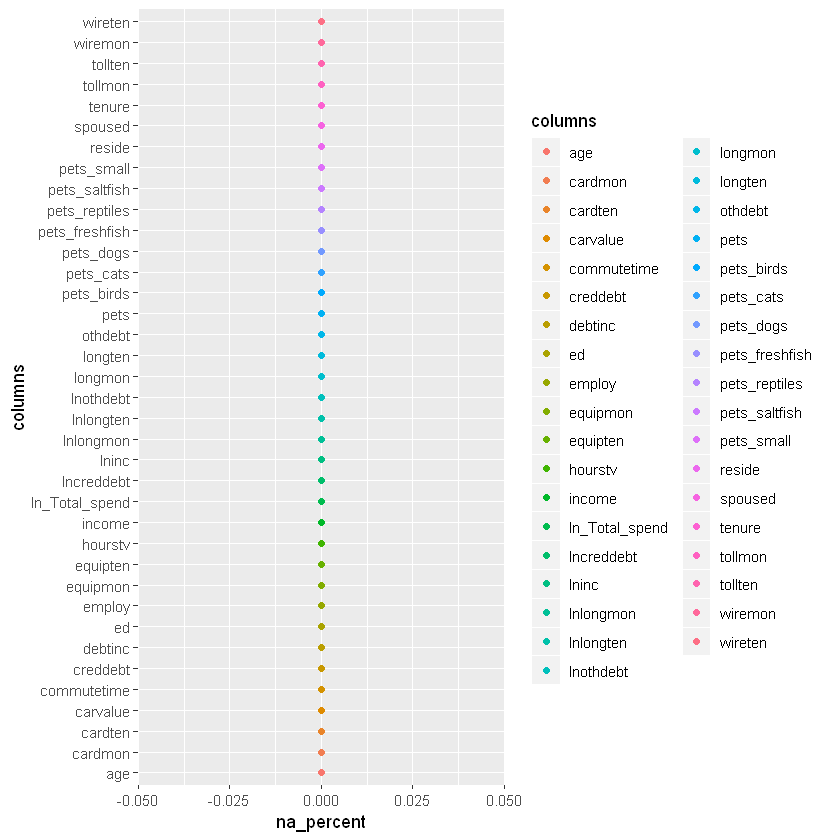

In [22]:
findMissingValues(cc_num)

#### Impute NA values with mean

In [23]:
#Mean value treatment for Numerical variables
#Store the columns with NA values in list_na
#Find the mean values of such columns

list_na <- colnames(cc_num)[ apply(cc_num, 2, anyNA) ]
list_na

average_missing <- apply(cc_num[,colnames(cc_num) %in% list_na], 2, mean, na.rm =  TRUE)
average_missing


character(0)

numeric(0)

In [24]:
#Impute Missing data with the Mean or Median

cc_num$lncreddebt[is.na(cc_num$lncreddebt)] <- 269.990398079616
cc_num$lnothdebt[is.na(cc_num$lnothdebt)] <- 285.403880776155
cc_num$commutetime[is.na(cc_num$commutetime)] <- 17.4029611844738
cc_num$longten[is.na(cc_num$longten)] <- 2211.45987592556
cc_num$lnlongten[is.na(cc_num$lnlongten)] <- 436.341004602762
cc_num$cardten[is.na(cc_num$cardten)] <- 267.27631052421

                            columns tot_cnt na_cnt na_percent
region                       region    5000      0          0
townsize                   townsize    5000      0          0
gender                       gender    5000      0          0
agecat                       agecat    5000      0          0
edcat                         edcat    5000      0          0
jobcat                       jobcat    5000      0          0
union                         union    5000      0          0
empcat                       empcat    5000      0          0
retire                       retire    5000      0          0
inccat                       inccat    5000      0          0
default                     default    5000      0          0
jobsat                       jobsat    5000      0          0
marital                     marital    5000      0          0
spousedcat               spousedcat    5000      0          0
homeown                     homeown    5000      0          0
hometype

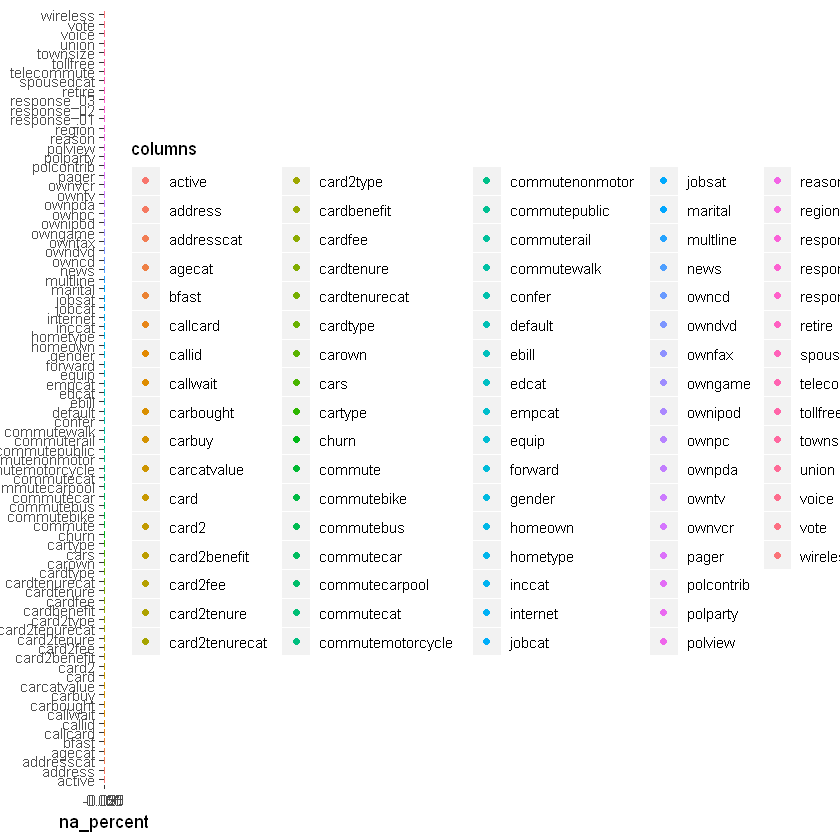

In [25]:
# No missing values in categorical list

findMissingValues(cc_cat)

#### Treatment of Outliers

In [26]:
# Create a function that will find and cap the outliers.
# An outlier is considered if it is below the (Q1 – 1.5*IQR) or above (Q3 + 1.5*IQR)
# Or, an outlier is considered if it is below the 5th percentile or above 95th percentile
# We will cap the low and high outliers with 5th and 95th percentile values respectively

HandleOutlier <- function(x,names){
  
   m1 <- mean(x, na.rm = T) 
   cat("\n Mean with outliers:\n", round(m1, 4))
   OutVals = boxplot(x, main="Boxplot with outliers",horizontal = TRUE,col = "red")$out
   cat("\n Pre-treatment Outliers:\n", OutVals)
   
   which(x %in% OutVals)    
#   hist(x, main="Histogram with outliers", xlab=NA, ylab=NA, col="red",)
#   plot(x,xlab="Plot with Outliers", ylab="values", pch="*", col="red", cex=2)

# Method 1: Capping with 5th and 95th percentiles for outliers defined by IQR 
    
#   qnt <- quantile(x, probs=c(.25, .75), na.rm = T)
#   caps <- quantile(x, probs=c(.05, .95), na.rm = T)
#   H <- 1.5 * IQR(x, na.rm = T)
#   x[x < (qnt[1] - H)] <- caps[1]
#   x[x > (qnt[2] + H)] <- caps[2]
    
# Method 2: Capping outliers with 5th and 95th percentiles 
    quantiles <- quantile(x, c(.05, .95), na.rm = T)
    x[ x < quantiles[1] ] <- quantiles[1]
    x[ x > quantiles[2] ] <- quantiles[2]
    
# Method 3: We can replace the outliers with NAs and later impute NAs using MICE or kNN  
    
#  y[x < (qnt[1] - H)] <- NA
#  y[x > (qnt[2] + H)] <- NA
    
# Method 4: Imputation with mean / median / mode
    
#  x[x < (qnt[1] - H)] <- median(x, na.rm = T)
#  x[x > (qnt[2] + H)] <- median(x, na.rm = T)
#  x[x < (qnt[1] - H)] <- mean(x, na.rm = T)
#  x[x > (qnt[2] + H)] <- mean(x, na.rm = T)
#  x[x < (qnt[1] - H)] <- mode(x, na.rm = T)
#  x[x > (qnt[2] + H)] <- mode(x, na.rm = T)
    
   m2 <- mean(x, na.rm = T)
   cat("\n Mean without outliers:\n", round(m2, 4))
   OutVals = boxplot(x, main="Boxplot without outliers",horizontal = TRUE,col = "green")$out
      
   cat("\n Post-treatment Outliers:\n", OutVals)
    
   which(x %in% OutVals)
#   hist(x, main="Histogram without outliers", xlab=NA, ylab=NA, col="green")
#   plot(x,xlab="Plot without Outliers", ylab="values", pch="*", col="green", cex=2)

    return(x)
}


 Mean with outliers:
 47.0256
 Pre-treatment Outliers:
 
 Mean without outliers:
 46.9976

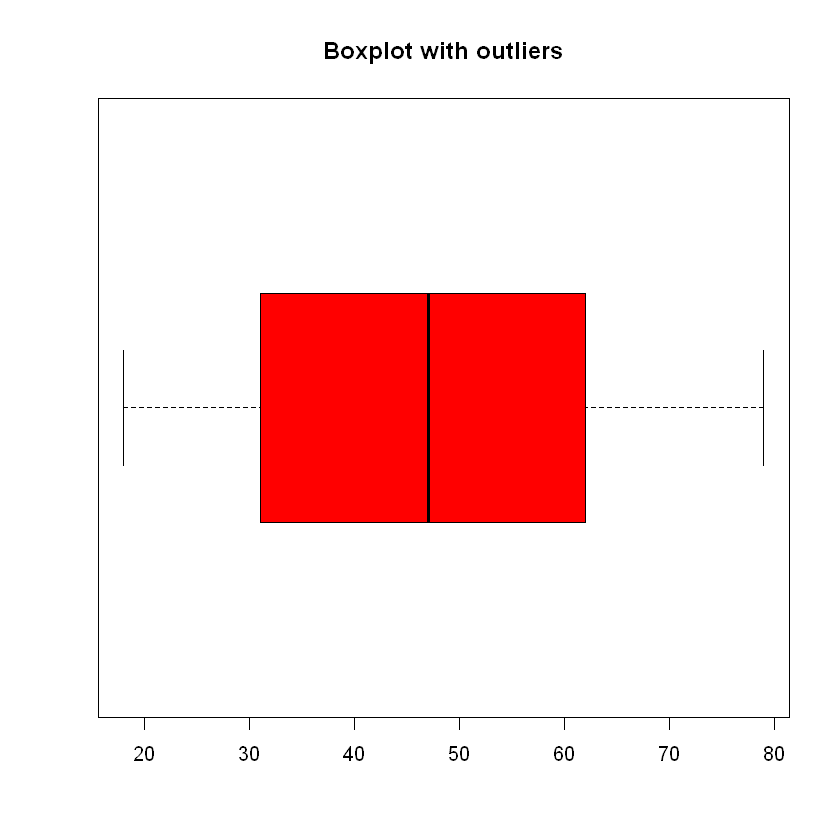


 Post-treatment Outliers:
 
 Mean with outliers:
 14.543

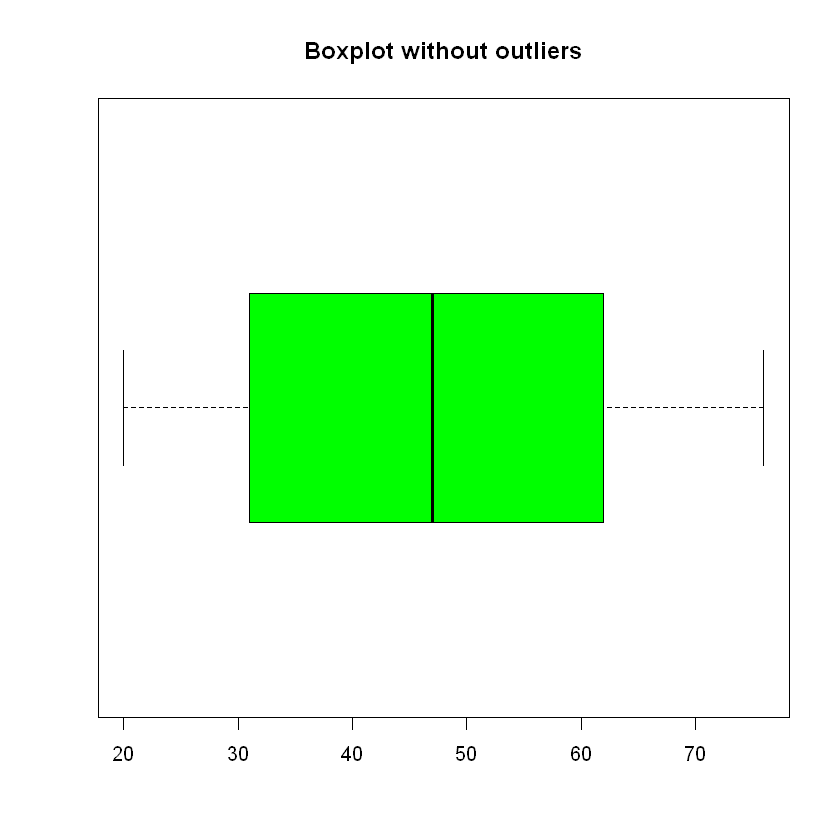


 Pre-treatment Outliers:
 
 Mean without outliers:
 14.5438

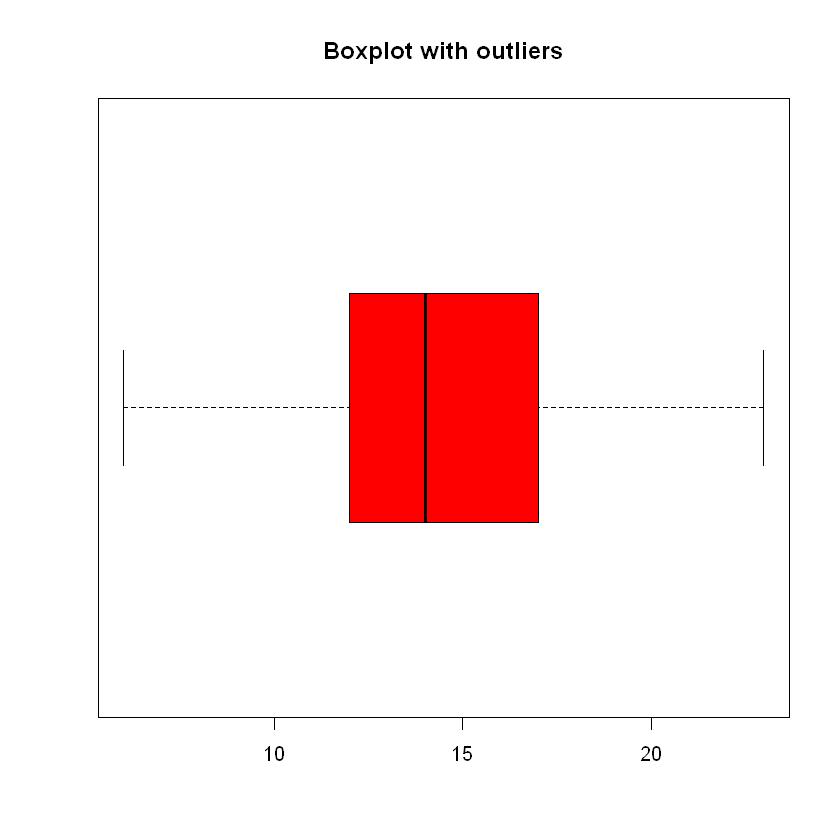


 Post-treatment Outliers:
 
 Mean with outliers:
 9.7304

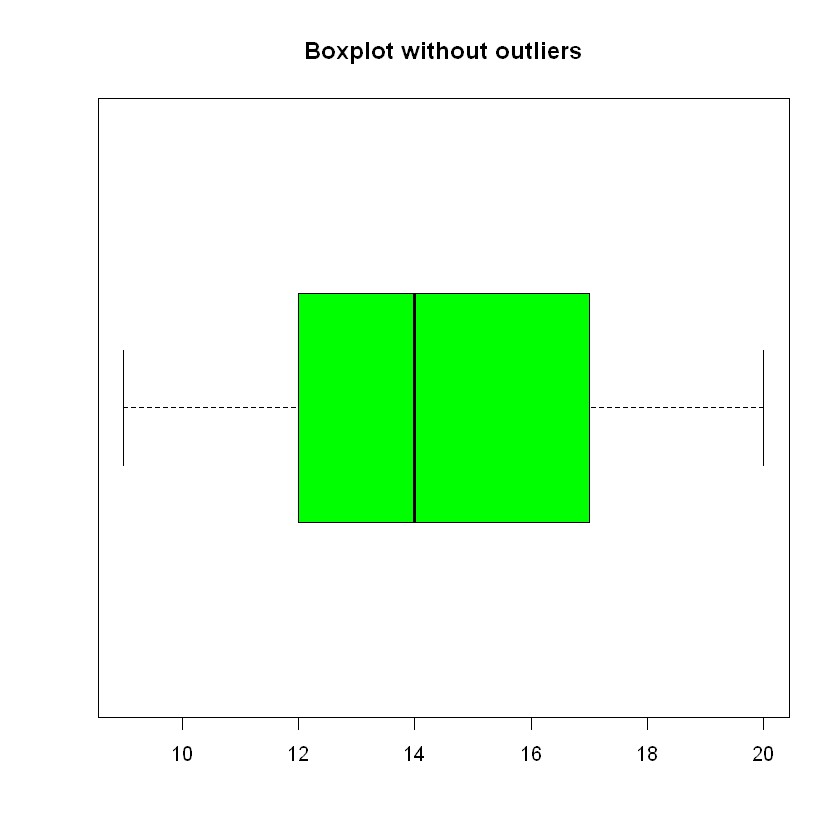


 Pre-treatment Outliers:
 36 36 35 39 45 35 39 39 36 36 36 40 39 37 48 35 38 35 37 35 40 36 46 35 43 45 38 37 37 35 43 43 37 43 39 39 40 40 39 35 36 37 39 39 47 41 36 39 35 40 36 36 35 42 35 37 49 38 40 35 35 37 39 45 36 40 38 37 42 44 35 39 38 36 39 38 37 37 42 36 42 42 44 38 35 37 38 36 44 38 38 37 38 35 36 38 44 35 38 37 39 35 37 37 38 35 38 39 44 44 35 36 40 38 43 52 35 35 36 39 39 37 36 42 39 38 51 43 38 42
 Mean without outliers:
 9.4954

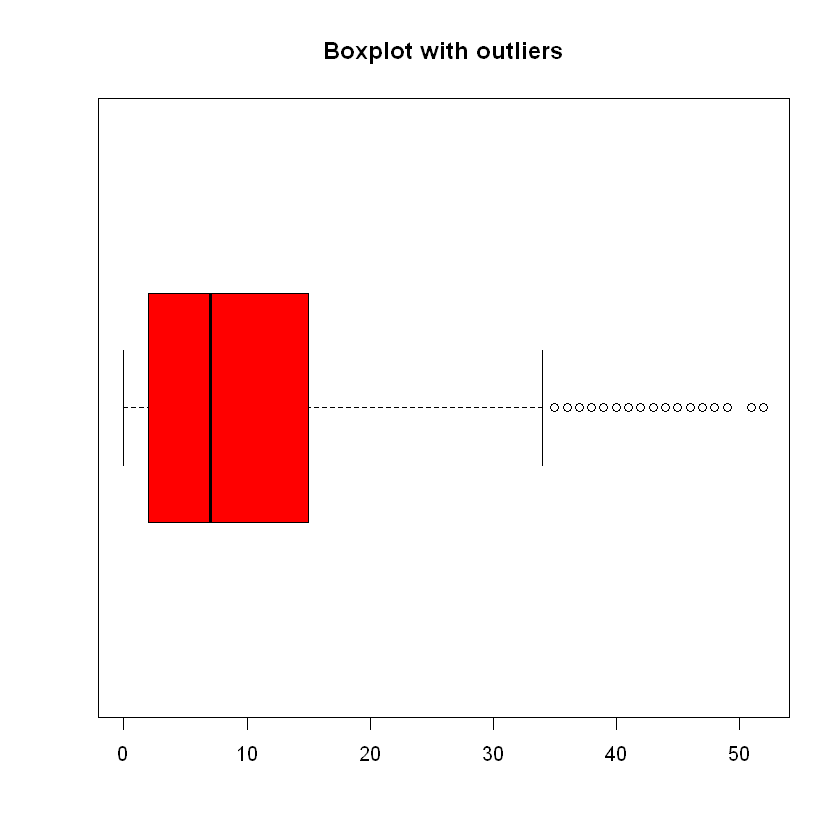


 Post-treatment Outliers:
 
 Mean with outliers:
 54.7596

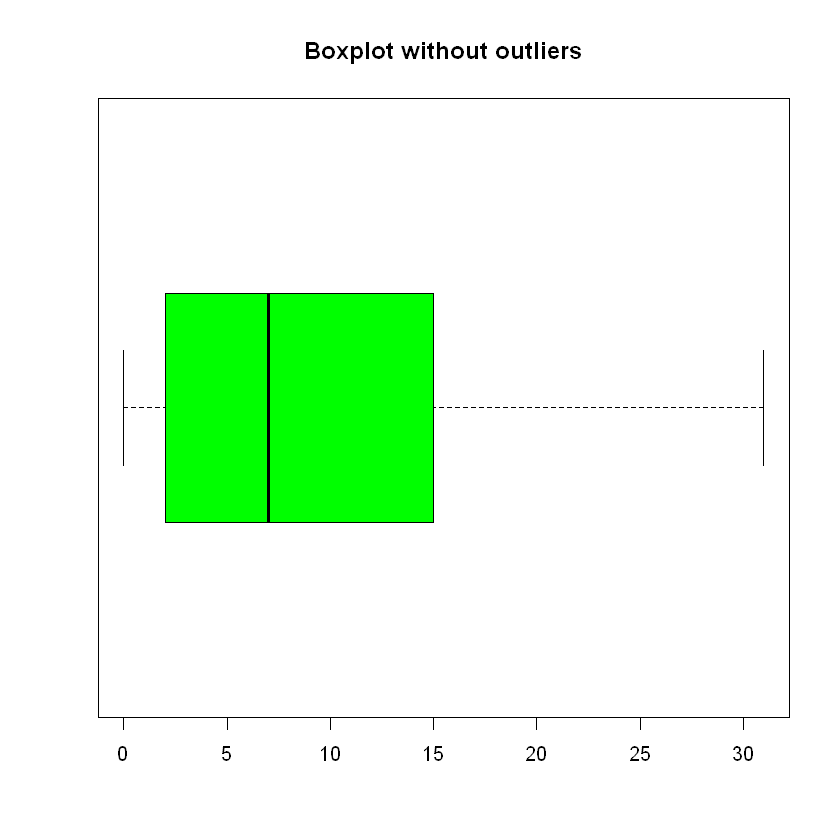


 Pre-treatment Outliers:
 171 424 141 137 284 138 327 143 224 149 155 156 142 193 164 152 143 237 208 182 141 350 191 143 310 182 154 143 165 143 181 193 259 208 293 207 339 145 147 144 236 184 296 167 137 186 197 190 240 190 136 304 183 140 203 182 388 165 147 218 297 149 197 148 204 515 167 143 172 134 226 141 150 212 150 146 148 186 411 136 180 242 134 1073 240 158 259 224 179 280 202 138 145 346 187 146 179 170 137 142 160 159 209 138 140 261 148 137 134 156 133 137 218 167 234 179 179 166 168 295 293 210 185 252 300 174 313 188 133 156 142 226 173 185 164 144 135 142 324 368 144 199 472 171 409 170 133 146 142 228 163 142 169 995 168 338 132 261 360 150 418 148 166 132 135 218 133 142 300 161 279 323 138 257 150 144 133 140 134 142 140 149 138 133 160 181 171 215 180 227 186 132 143 181 167 175 215 191 156 137 273 174 193 159 142 169 146 237 147 345 133 185 158 132 165 197 255 780 196 245 160 137 184 145 143 642 151 273 183 157 232 145 173 211 220 150 174 144 146 153 242 147 165 

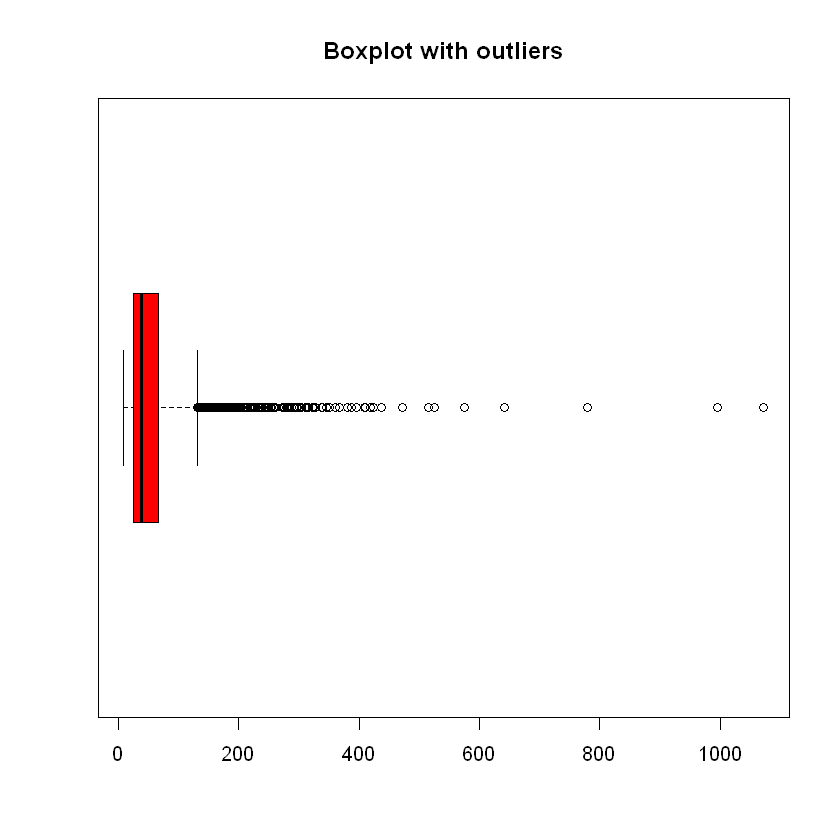


 Post-treatment Outliers:
 147 147 141 137 147 138 147 143 147 147 147 147 142 147 147 147 143 147 147 147 141 147 147 143 147 147 147 143 147 143 147 147 147 147 147 147 147 145 147 144 147 147 147 147 137 147 147 147 147 147 136 147 147 140 147 147 147 147 147 147 147 147 147 147 147 147 147 143 147 134 147 141 147 147 147 146 147 147 147 136 147 147 134 147 147 147 147 147 147 147 147 138 145 147 147 146 147 147 137 142 147 147 147 138 140 147 147 137 134 147 133 137 147 147 147 147 147 147 147 147 147 147 147 147 147 147 147 147 133 147 142 147 147 147 147 144 135 142 147 147 144 147 147 147 147 147 133 146 142 147 147 142 147 147 147 147 132 147 147 147 147 147 147 132 135 147 133 142 147 147 147 147 138 147 147 144 133 140 134 142 140 147 138 133 147 147 147 147 147 147 147 132 143 147 147 147 147 147 147 137 147 147 147 147 142 147 146 147 147 147 133 147 147 132 147 147 147 147 147 147 147 137 147 145 143 147 147 147 147 147 147 145 147 147 147 147 147 144 146 147 147 147 147 

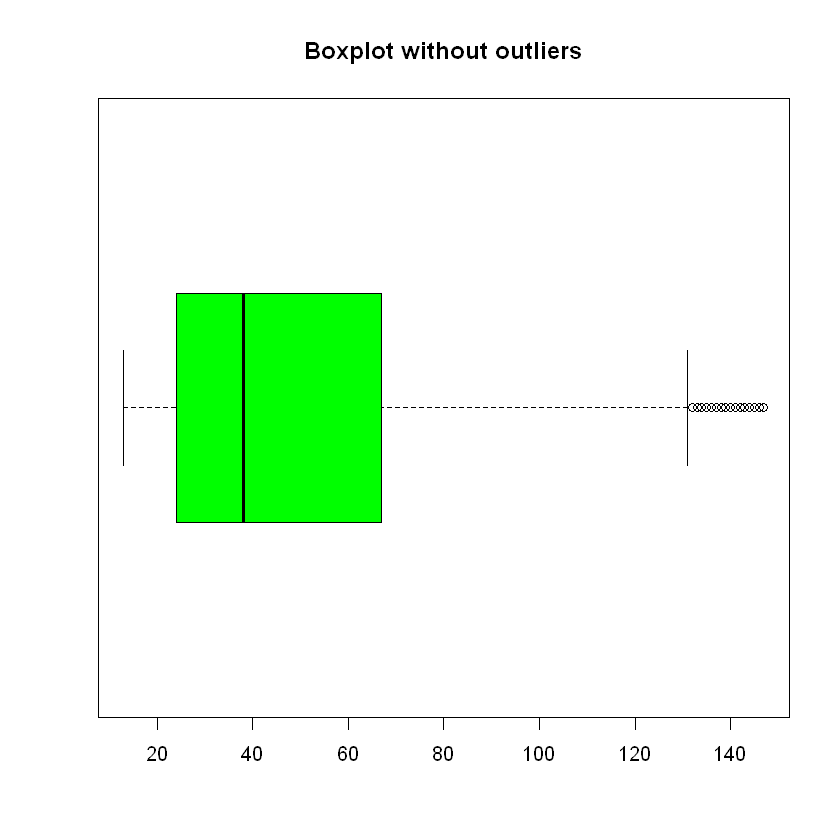


 Pre-treatment Outliers:
 6.05 5.79 5.86 5.74 5.83 5.96 6.24 6.02 6.98 5.85 5.75 5.78 5.91 6.16 6.01 6.9 5.82 5.89 6.04 5.78 5.84 6.66 6.46 6.27 5.98 5.75 5.94 5.75 6.08 6.35
 Mean without outliers:
 3.693

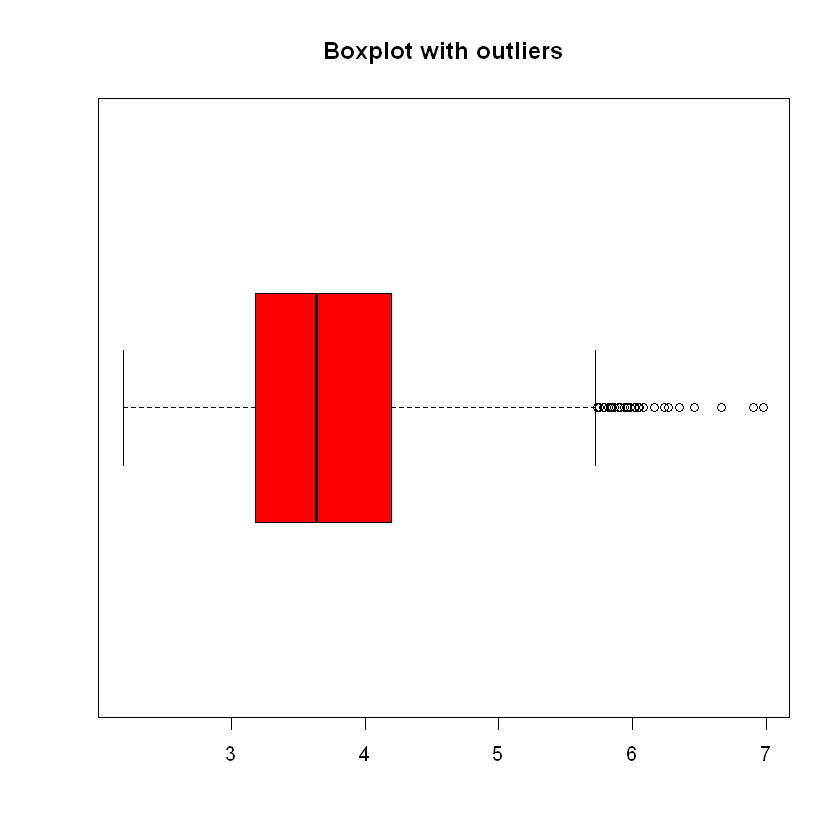


 Post-treatment Outliers:
 
 Mean with outliers:
 9.9542

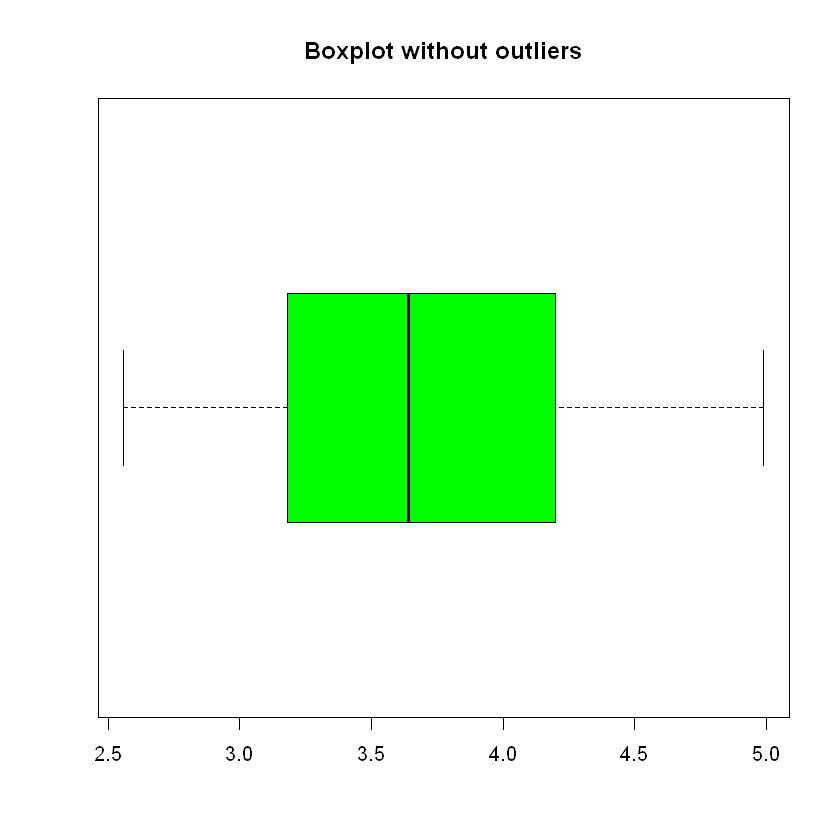


 Pre-treatment Outliers:
 34.2 27.7 41.7 29.7 29.3 30.7 29.7 30.6 31.1 31.7 36.7 28.5 33.2 27.3 27.1 28 27.9 36.7 27.3 28.1 26.7 28.4 29 27 36.4 27.2 27.9 34.1 41 28.3 29.2 27.5 26.8 28.8 28.4 27.2 28.5 26.8 37.5 26.8 32.7 29.3 30.2 31.5 27.5 26.9 26.5 26.5 30.4 29.3 34.9 29.4 43.1 29.2 35.8 31.8 26.6 28.5 30.1 26.6 32.9 26.6 36.5 32.3 28.9 29.2 28 33.3 28.4 28.3 27.8 32.1 33.4 33.8 38.2 29.3 29.2 26.4 31.6 27.9 27.1 28.9 28.7 27.6 35.8 26.6 26.7 34.9 31.8 28 27.9 27.7 33.5 33.1 34.3 30 29.7 28.7 28 37.5 40.7 27.5 36.5
 Mean without outliers:
 9.765

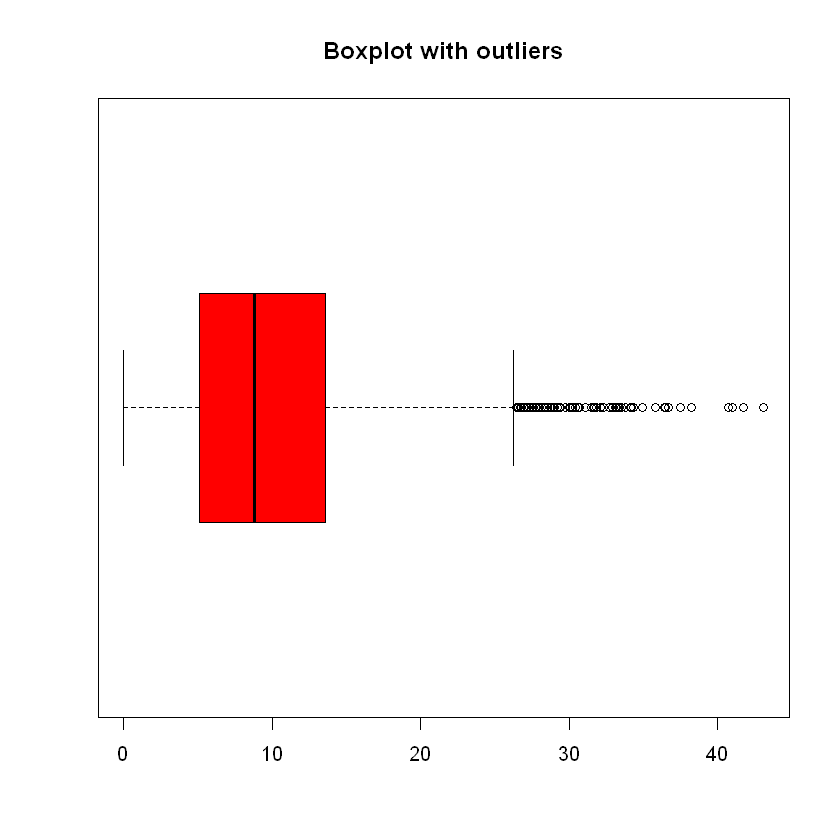


 Post-treatment Outliers:
 
 Mean with outliers:
 1.8574

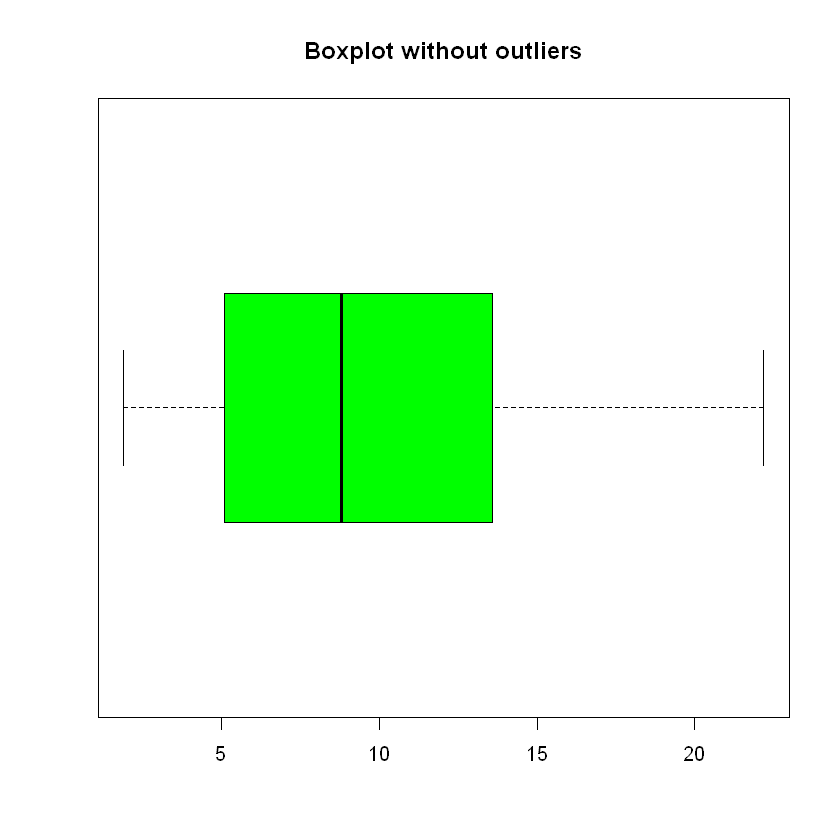


 Pre-treatment Outliers:
 5.95 13.11 4.69 9.59 15.46 4.82 5.4 15.53 8.33 9.66 6.69 5.3 5.38 4.82 6.55 7.58 4.84 9.96 6.88 7.54 8.2 28.85 5.64 6.07 5.96 6.33 5.94 4.73 7.66 6.07 5.87 19.67 4.98 6.41 5.11 9.94 9.44 5.79 7.32 9.21 10.91 5.29 5.94 7.67 11.72 6.62 5.03 18.07 11.94 14.25 10.55 14.26 5.21 8.34 34.72 9.57 12.37 9.07 9.64 7.04 11.77 5.99 6.8 5.57 8.72 13.05 4.64 6.74 6.57 5.95 8.4 12.03 6.36 6.06 4.64 9.6 5.74 10.45 6.1 5.49 5.61 16.42 5.36 13.98 5.94 10.51 9.72 4.84 13.89 7.41 5.49 12.17 7.35 109.07 5.73 5.87 5.33 6.14 24.02 5.02 5.09 12.5 5.25 8.49 4.61 5.15 4.85 5.01 4.9 8.21 7.85 5.01 5.83 5.51 7.26 6.55 5.8 6.04 14.32 4.6 6.22 6.28 4.92 17.12 9.29 8.34 16.76 9.92 4.98 6.59 5.95 8.86 6.65 4.78 5.42 4.67 8.68 5.02 6.56 5.57 6.07 9.61 10.98 10.24 5.52 6.1 4.98 4.68 42.1 5.03 4.94 15.11 8.19 12.48 5 16.85 8.85 5.11 4.82 5.37 9.45 5.3 6.94 6.89 7.49 4.8 6.61 9.59 13.96 8.48 8.07 4.64 5.02 4.75 9 7.95 5.38 6.99 5.19 4.95 5.39 14.27 9.91 7.07 6.02 6.05 6.4 67.49 12.6 4.77 5.81 6

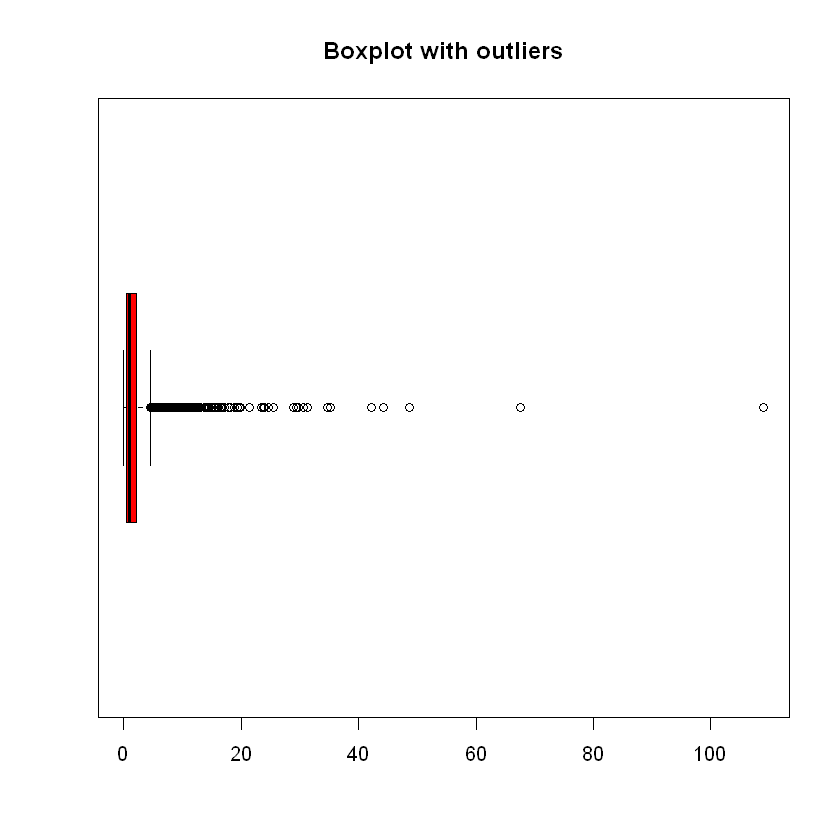


 Post-treatment Outliers:
 5.95 6.3715 4.69 6.3715 6.3715 4.82 5.4 6.3715 6.3715 6.3715 6.3715 5.3 5.38 4.82 6.3715 6.3715 4.84 6.3715 6.3715 6.3715 6.3715 6.3715 5.64 6.07 5.96 6.33 5.94 4.73 6.3715 6.07 5.87 6.3715 4.98 6.3715 5.11 6.3715 6.3715 5.79 6.3715 6.3715 6.3715 5.29 5.94 6.3715 6.3715 6.3715 5.03 6.3715 6.3715 6.3715 6.3715 6.3715 5.21 6.3715 6.3715 6.3715 6.3715 6.3715 6.3715 6.3715 6.3715 5.99 6.3715 5.57 6.3715 6.3715 4.64 6.3715 6.3715 5.95 6.3715 6.3715 6.36 6.06 4.64 6.3715 5.74 6.3715 6.1 5.49 5.61 6.3715 5.36 6.3715 5.94 6.3715 6.3715 4.84 6.3715 6.3715 5.49 6.3715 6.3715 6.3715 5.73 5.87 5.33 6.14 6.3715 5.02 5.09 6.3715 5.25 6.3715 4.61 5.15 4.85 5.01 4.9 6.3715 6.3715 5.01 5.83 5.51 6.3715 6.3715 5.8 6.04 6.3715 4.6 6.22 6.28 4.92 6.3715 6.3715 6.3715 6.3715 6.3715 4.98 6.3715 5.95 6.3715 6.3715 4.78 5.42 4.67 6.3715 5.02 6.3715 5.57 6.07 6.3715 6.3715 6.3715 5.52 6.1 4.98 4.68 6.3715 5.03 4.94 6.3715 6.3715 6.3715 5 6.3715 6.3715 5.11 4.82 5.37 6.3715 5.3 6.371

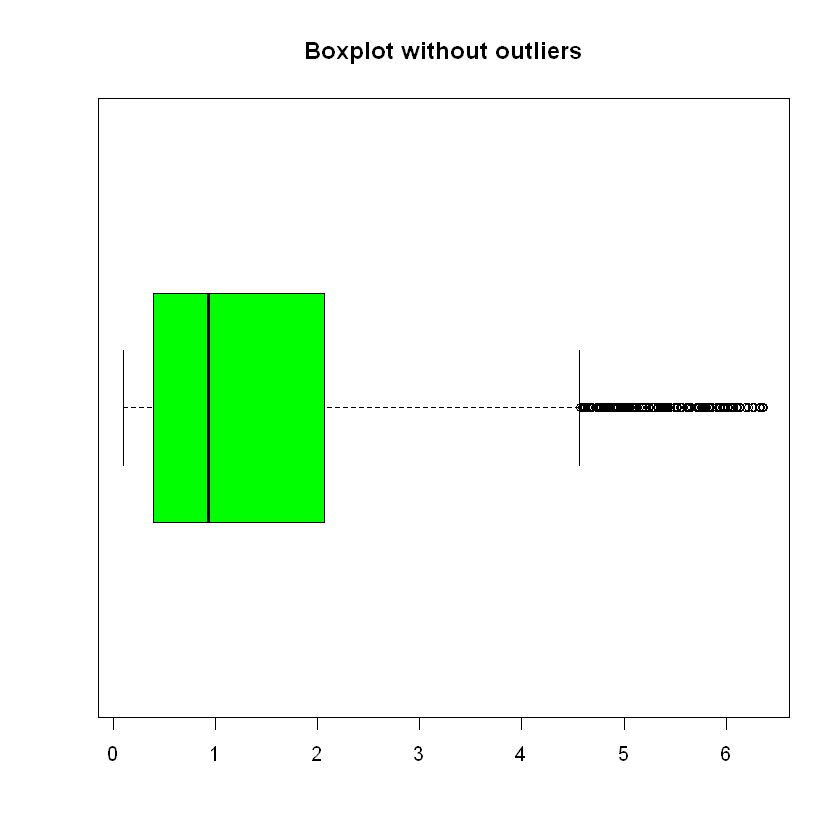


 Pre-treatment Outliers:
 
 Mean without outliers:
 268.2427

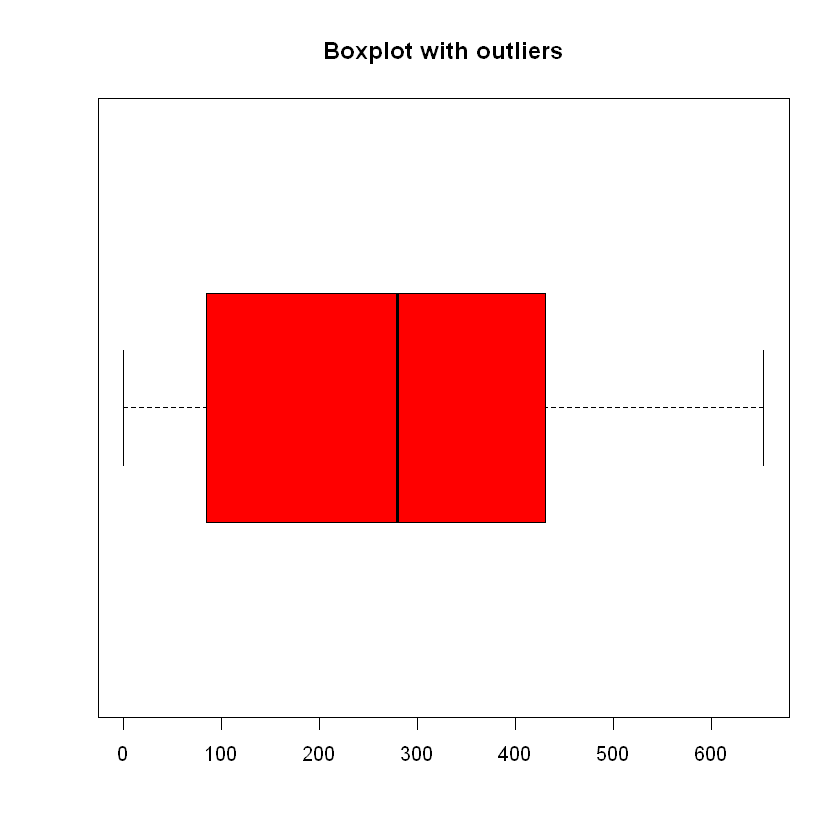


 Post-treatment Outliers:
 
 Mean with outliers:
 3.6545

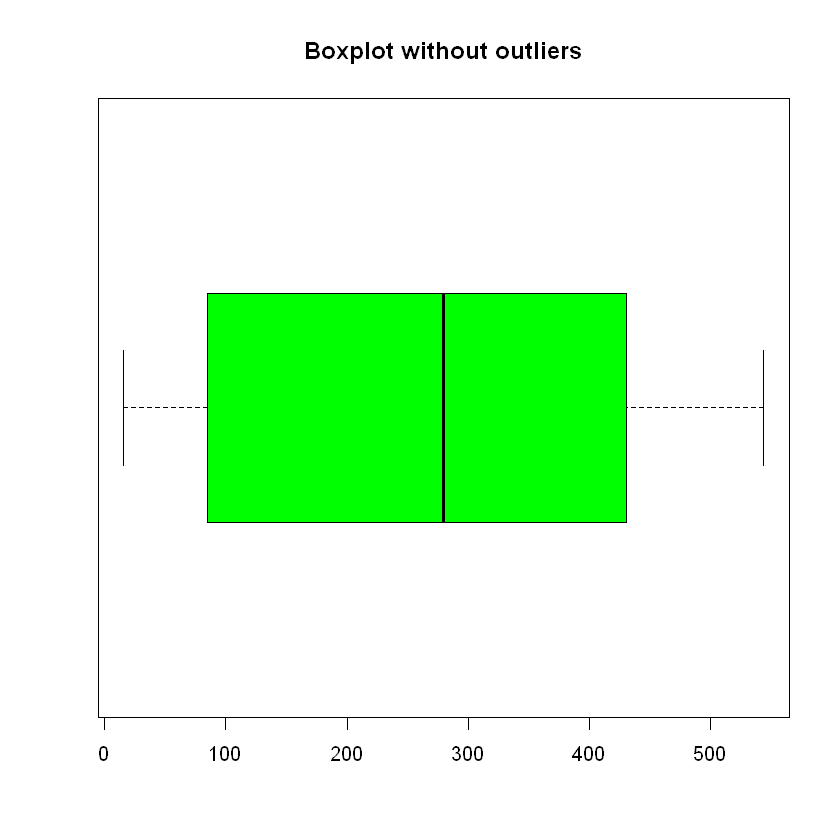


 Pre-treatment Outliers:
 14.44 32.26 10 15.47 11.24 26.92 9.56 22.73 13.06 10.43 13.9 23.96 11.39 11.22 15.97 16.6 44.52 21.57 22.71 18.84 18.59 9.44 9.95 16.86 14.06 13.58 36.36 11.44 10.54 12 9.83 10.77 18.13 20.12 19.89 50.04 16.12 12 12.07 11.87 32.55 24.06 18.68 22.78 17.04 10.28 11.4 15.74 9.56 9.37 27.41 23.84 13.83 14.88 12.15 12.81 9.99 37.64 17.8 9.77 10.81 12.27 11.43 9.92 13.25 10.09 10.02 22.65 19.64 9.84 19.23 11.04 14.39 14.52 9.83 14.11 23.61 19.64 10.47 11.31 18.81 13.64 9.6 102.31 35.07 15.49 11.2 30.82 10.9 10.75 11.3 12.97 25.73 43.24 14.02 14.29 11.11 9.51 16.7 10.89 13.4 15.91 10.3 10.49 10.79 11.03 12.41 11.75 30.03 28.03 25.7 14.98 10.77 18.68 9.68 15.78 14.46 13.06 9.66 11.09 17.45 14.09 15.06 10.58 20.32 9.59 9.87 13.44 9.98 20.16 36.15 10.98 18.02 11.87 21.34 17.6 11.12 11.47 10.22 13.4 11.58 22.92 11.85 15.11 11.51 59.91 53.84 15.83 15.25 10.28 10.91 10.37 28.81 10.87 15.65 20.42 10.82 18.43 10.95 16.28 23.02 12.61 12.42 10.31 141.46 22.89 13.78 15.16 14.4

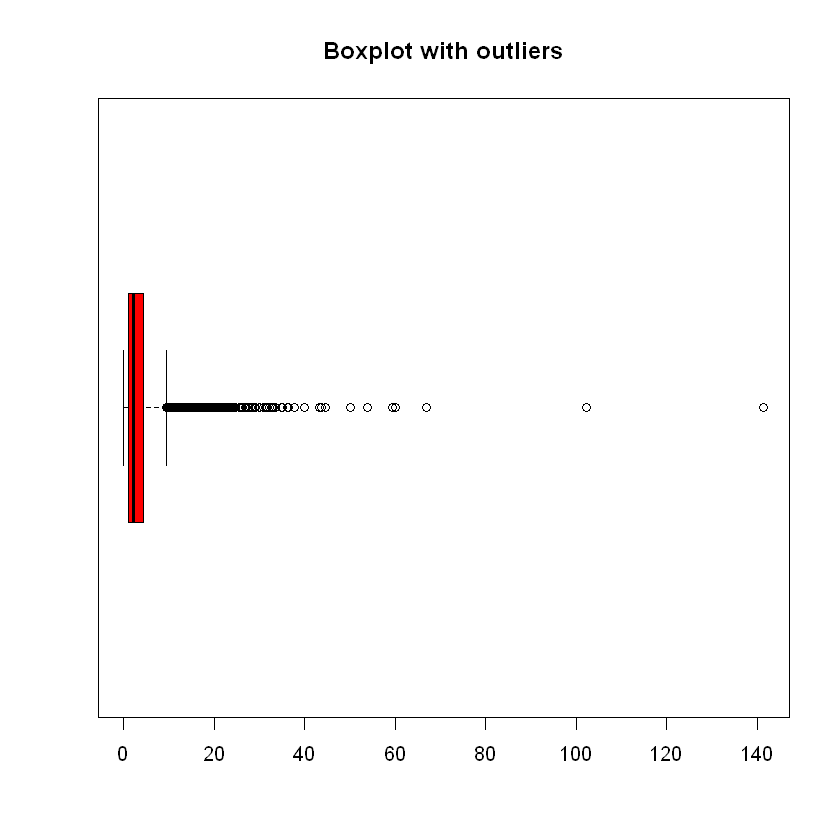


 Post-treatment Outliers:
 11.812 11.812 10 11.812 11.24 11.812 9.56 11.812 11.812 10.43 11.812 11.812 11.39 11.22 11.812 11.812 11.812 11.812 11.812 11.812 11.812 9.44 9.95 11.812 11.812 11.812 11.812 11.44 10.54 11.812 9.83 10.77 11.812 11.812 11.812 11.812 11.812 11.812 11.812 11.812 11.812 11.812 11.812 11.812 11.812 10.28 11.4 11.812 9.56 9.37 11.812 11.812 11.812 11.812 11.812 11.812 9.99 11.812 11.812 9.77 10.81 11.812 11.43 9.92 11.812 10.09 10.02 11.812 11.812 9.84 11.812 11.04 11.812 11.812 9.83 11.812 11.812 11.812 10.47 11.31 11.812 11.812 9.6 11.812 11.812 11.812 11.2 11.812 10.9 10.75 11.3 11.812 11.812 11.812 11.812 11.812 11.11 9.51 11.812 10.89 11.812 11.812 10.3 10.49 10.79 11.03 11.812 11.75 11.812 11.812 11.812 11.812 10.77 11.812 9.68 11.812 11.812 11.812 9.66 11.09 11.812 11.812 11.812 10.58 11.812 9.59 9.87 11.812 9.98 11.812 11.812 10.98 11.812 11.812 11.812 11.812 11.12 11.47 10.22 11.812 11.58 11.812 11.812 11.812 11.51 11.812 11.812 11.812 11.812 10.28 10.91

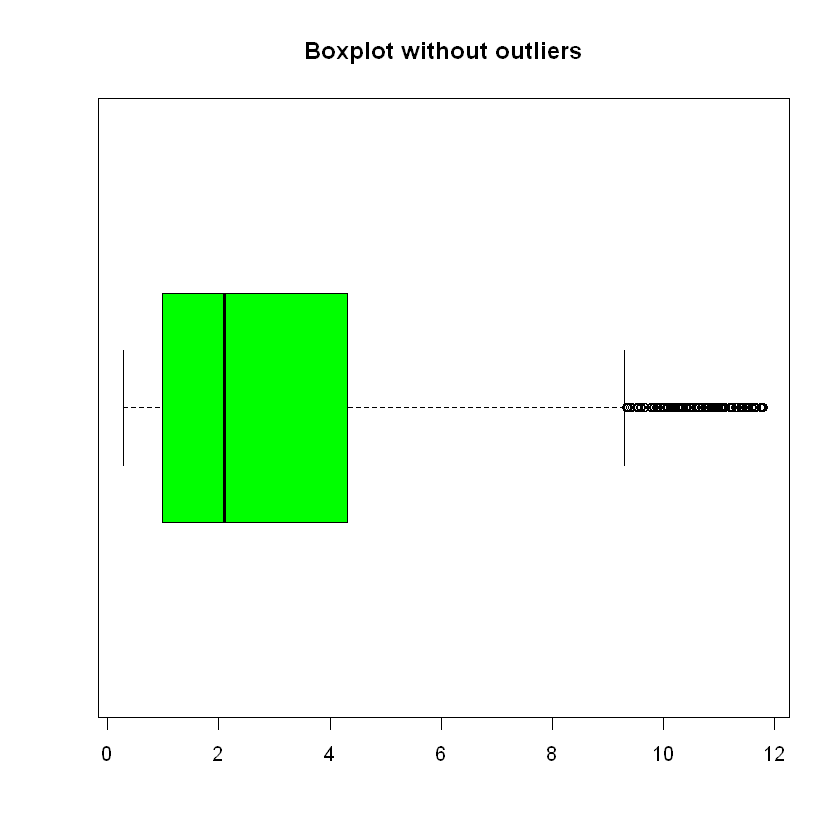


 Pre-treatment Outliers:
 
 Mean without outliers:
 283.7616

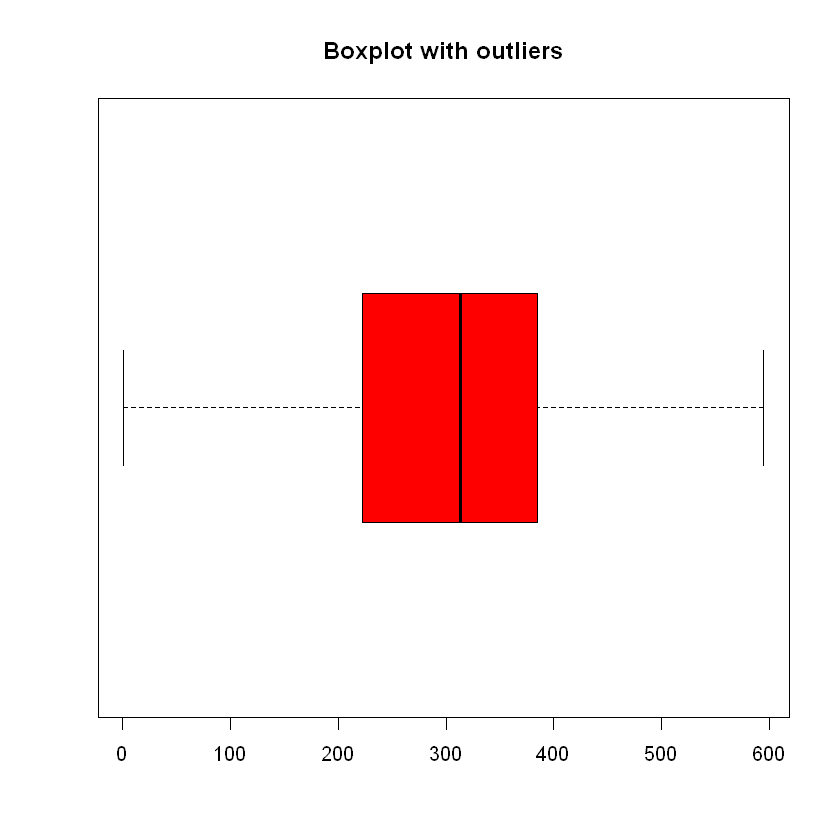


 Post-treatment Outliers:
 
 Mean with outliers:
 6.1128

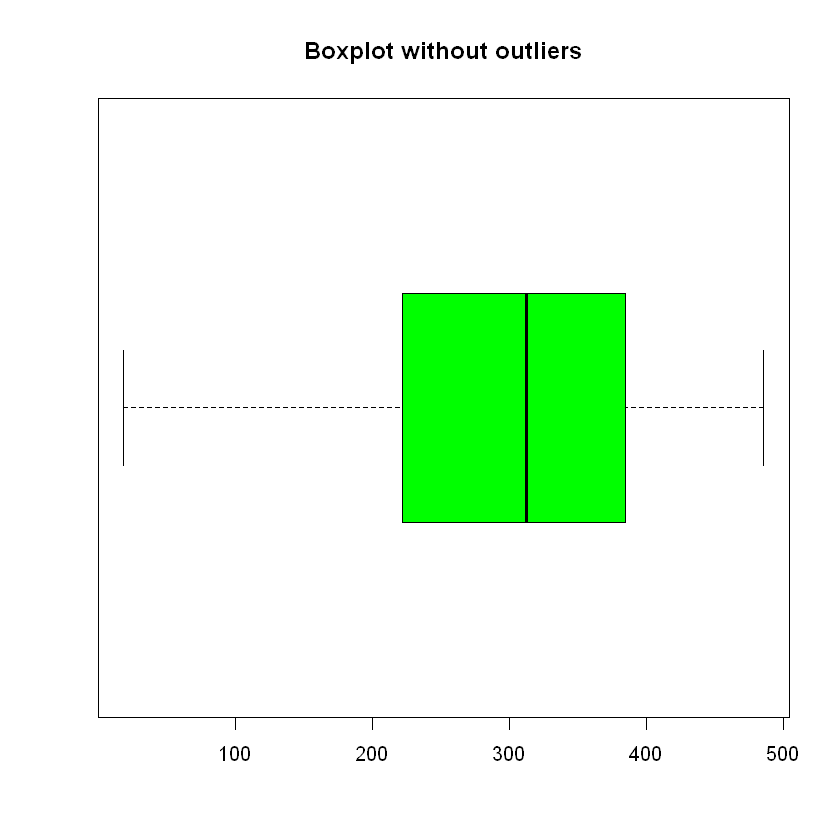


 Pre-treatment Outliers:
 
 Mean without outliers:
 6.0354

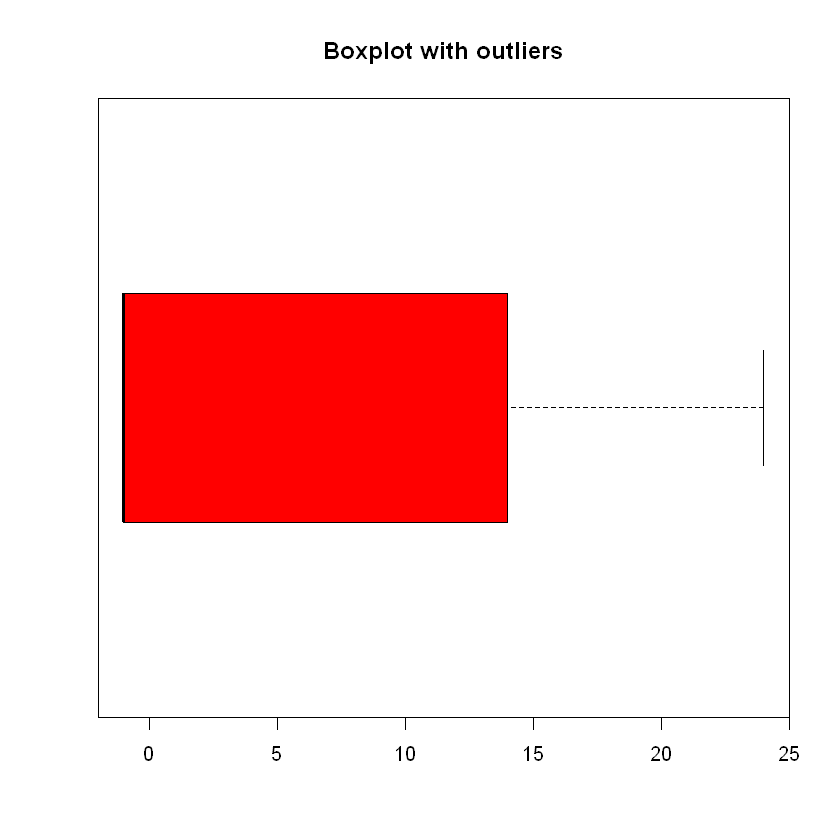


 Post-treatment Outliers:
 
 Mean with outliers:
 2.204

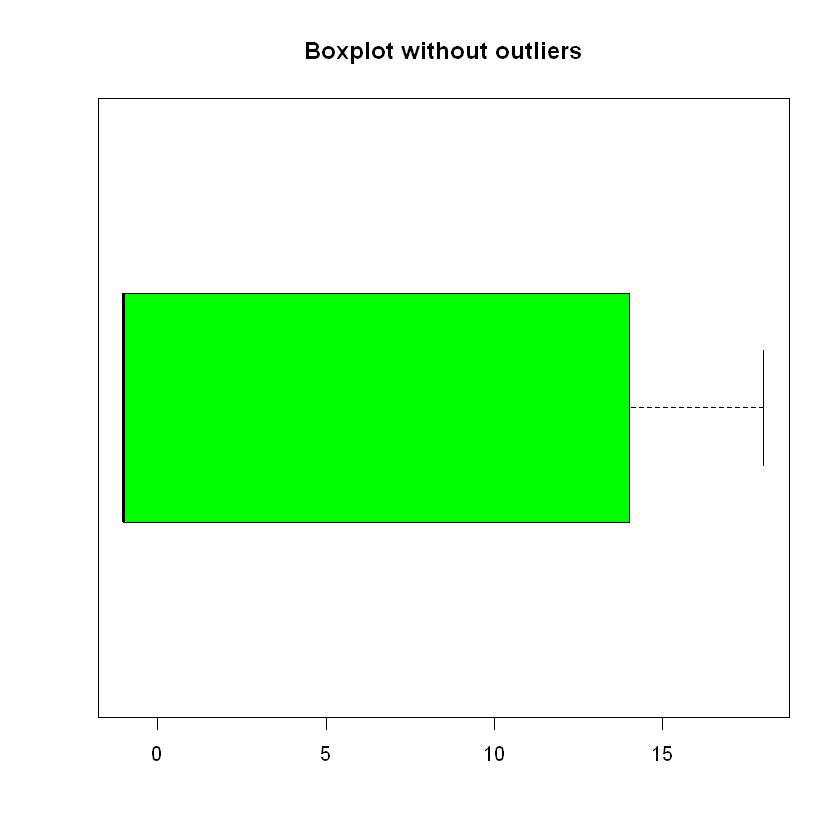


 Pre-treatment Outliers:
 8 7 8 7 7 7 8 8 7 8 7 9 7 7 9 7 7 8 7 7 7 7 7 7 8 7 7 7 7 7 7 7 7 7 7 7 7 7
 Mean without outliers:
 2.1668

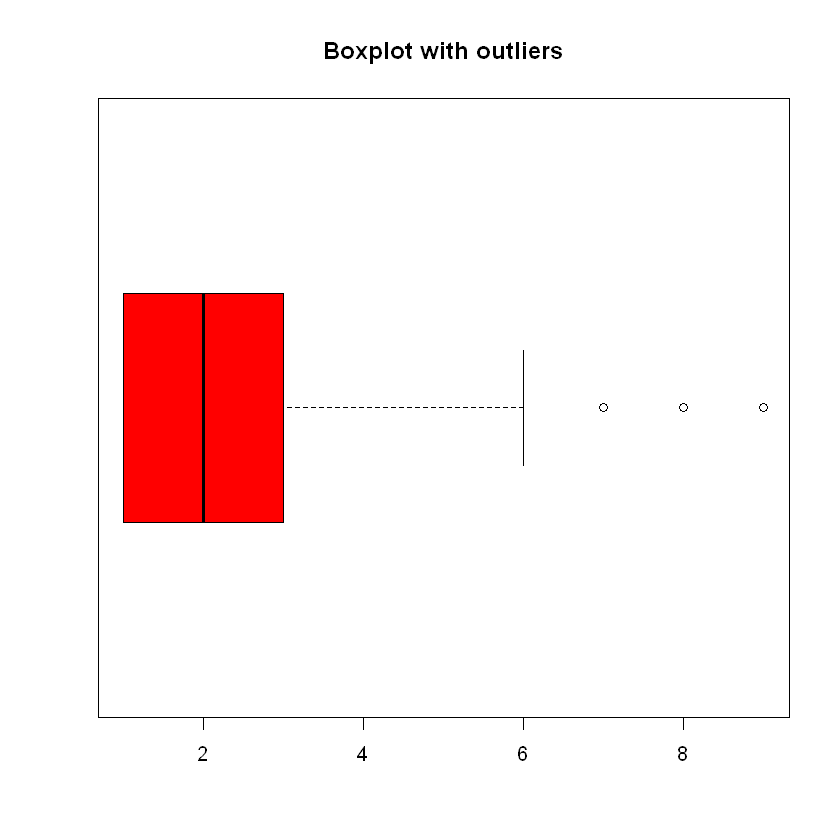


 Post-treatment Outliers:
 
 Mean with outliers:
 3.0674

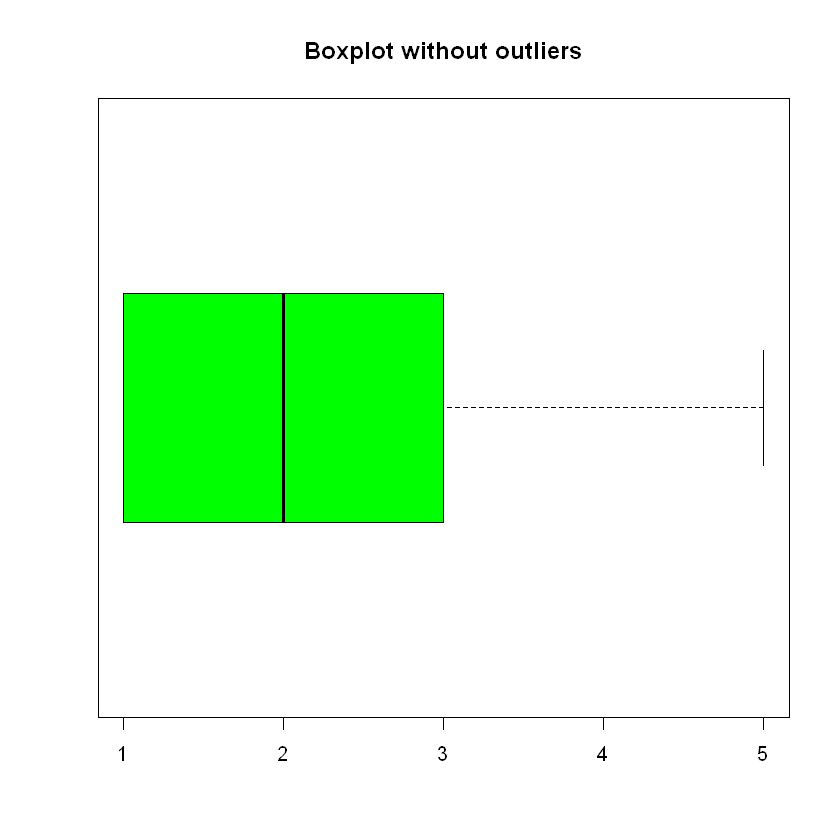


 Pre-treatment Outliers:
 13 13 15 13 19 16 14 13 15 13 16 16 13 14 15 18 15 19 16 13 13 14 14 14 21 14 13 13 13 13 16 15 13 16 13 14 15 13 13 13 19 14 13 13 13 13 13 16 13 16 14 14 15 13 15 13 14 14 15 13 14 15 16
 Mean without outliers:
 2.9776

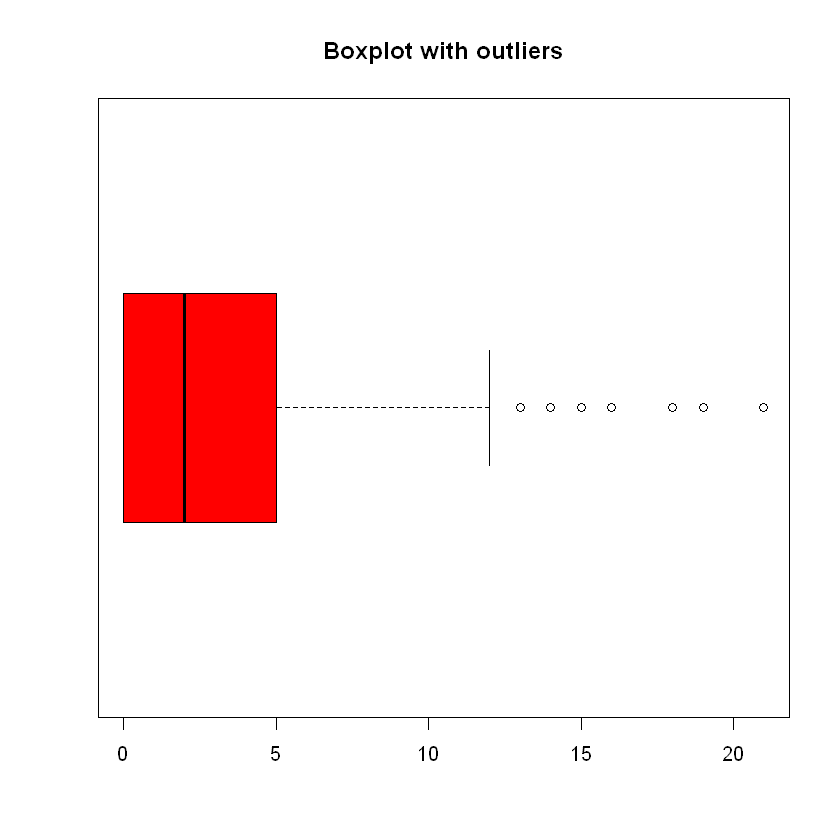


 Post-treatment Outliers:
 
 Mean with outliers:
 0.5004

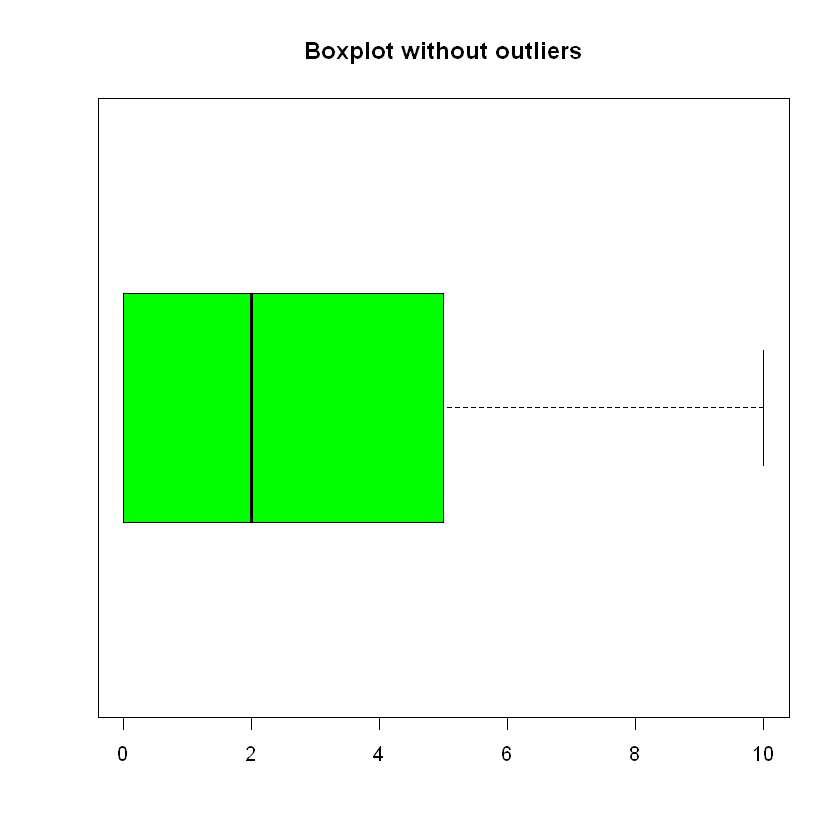


 Pre-treatment Outliers:
 3 3 3 4 3 3 3 6 3 3 3 3 4 3 3 3 3 3 3 3 4 3 4 4 3 5 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 4 4 5 4 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 4 3 3 3 4 3 3 3 3 3 4 3 3 3 3 4 3 3 4 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 5 3 3 3 3 4 3 4 3 3 3 6 3 4 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 4 4 3 4 3 3 3 3 4 3 3 3 4 4 4 3 3 3 3 3 4 3 3 3 3 3 3 4 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 4 3 4
 Mean without outliers:
 0.4502

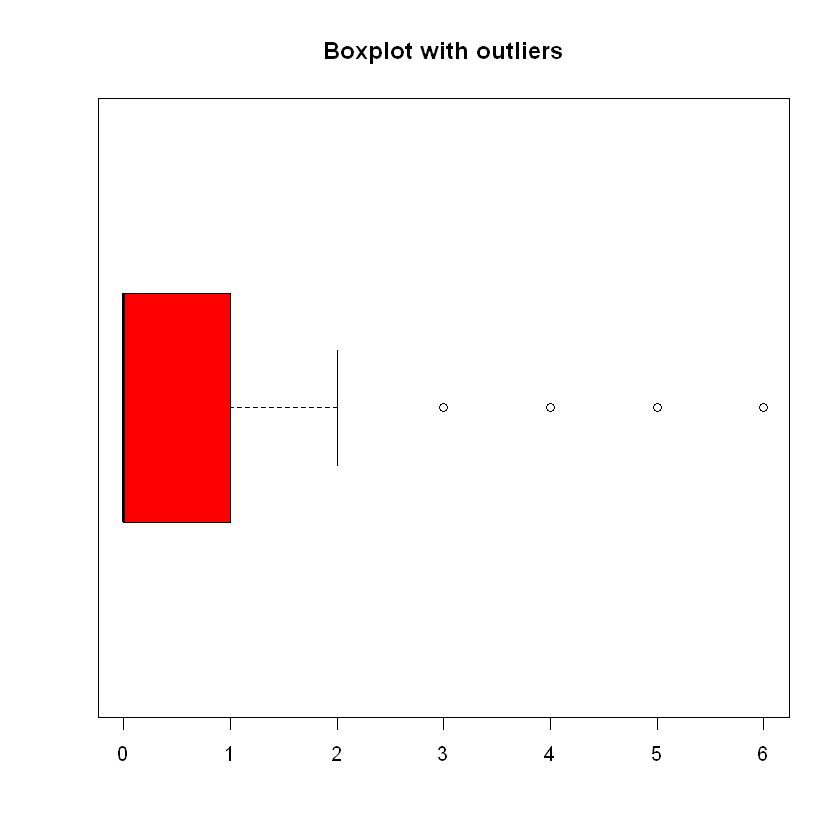


 Post-treatment Outliers:
 
 Mean with outliers:
 0.3924

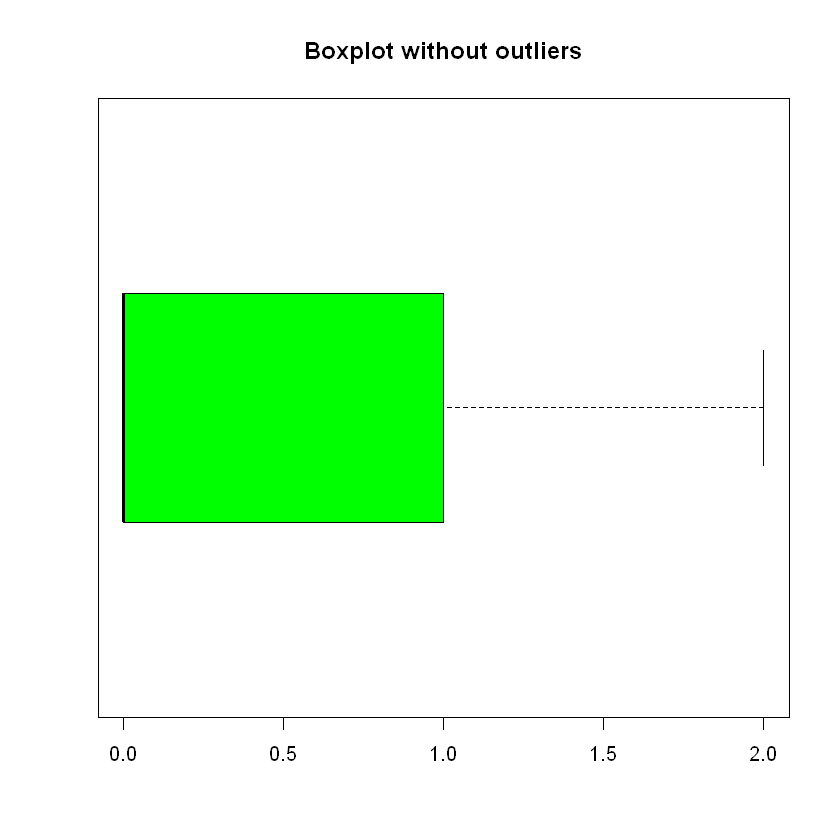


 Pre-treatment Outliers:
 1 1 2 2 1 1 1 1 2 1 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 2 2 3 1 1 2 3 1 1 1 1 4 1 2 2 1 1 2 1 1 1 1 1 2 1 3 2 1 2 2 3 3 1 1 2 1 1 1 1 1 2 1 3 1 1 2 1 1 1 1 3 3 1 1 1 3 1 1 2 2 1 1 2 1 1 1 1 1 2 1 1 2 1 2 1 2 1 1 2 3 1 2 2 1 1 1 1 2 1 1 1 2 1 3 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 1 1 1 4 3 1 1 1 1 3 2 1 1 1 2 1 1 3 2 1 1 1 2 1 1 2 1 2 1 1 1 1 3 3 1 1 2 1 1 1 1 2 1 1 1 1 3 1 1 1 1 2 1 1 2 1 2 1 4 1 1 1 2 2 3 2 2 1 1 1 1 3 1 1 2 2 2 1 1 2 1 1 3 1 2 2 2 5 1 3 4 4 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1 1 3 2 1 1 2 2 2 2 2 1 1 2 1 1 2 1 1 2 1 1 1 2 2 2 2 1 1 2 1 2 1 1 2 2 3 1 1 2 3 1 4 2 1 1 2 1 1 1 1 2 1 1 2 4 1 3 1 1 1 2 1 1 2 2 1 4 1 1 3 1 2 2 1 2 1 1 1 3 1 1 1 1 3 2 1 1 2 1 1 4 1 1 1 1 2 1 2 2 2 2 1 3 1 1 3 1 1 1 1 3 1 2 1 1 1 4 1 3 2 2 1 4 1 2 1 3 1 1 2 1 1 2 2 2 2 1 1 1 3 2 1 1 1 1 1 2 2 2 1 1 2 1 1 1 2 1 2 2 1 2 2 3 1 1 1 1 3 1 1 2 2 2 2 2 1 1 2 1 1 1 2 1 2 1 3 2 2 1 1 3 1 2 1 2 1 1 2 2 2 1 2 1 3 1 2 2 1 1 2 3 1 1 2 1 2 1 1 1 1 3 1 1 2 1 1 1 3 3 1

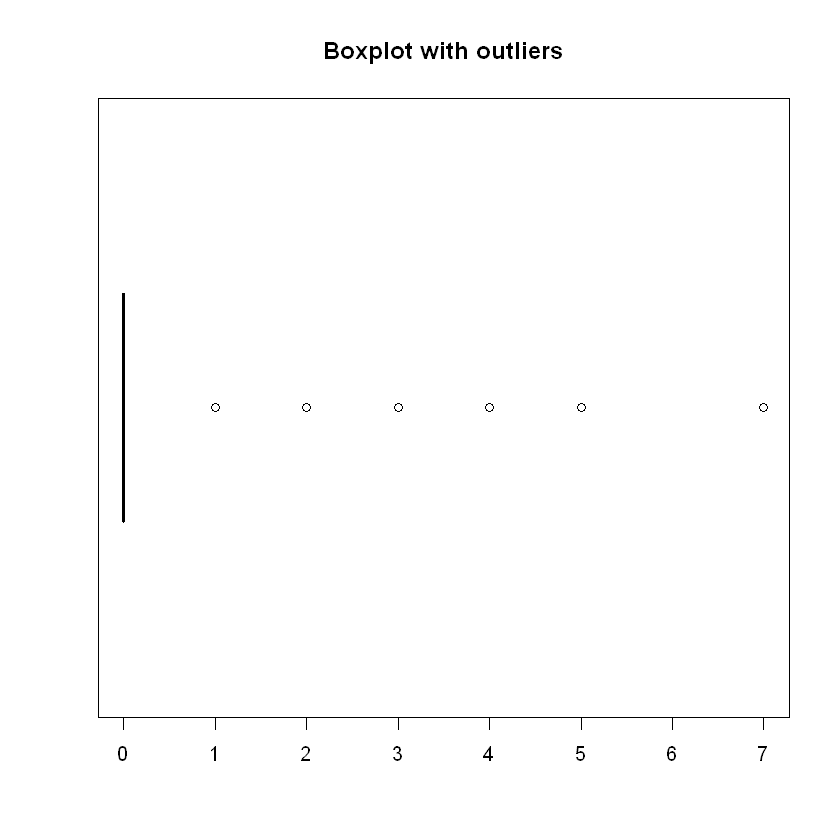


 Post-treatment Outliers:
 1 1 2 2 1 1 1 1 2 1 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 1 1 2 1 2 2 1 1 2 1 1 1 1 1 2 1 2 2 1 2 2 2 2 1 1 2 1 1 1 1 1 2 1 2 1 1 2 1 1 1 1 2 2 1 1 1 2 1 1 2 2 1 1 2 1 1 1 1 1 2 1 1 2 1 2 1 2 1 1 2 2 1 2 2 1 1 1 1 2 1 1 1 2 1 2 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 1 2 2 1 1 1 2 1 1 2 2 1 1 1 2 1 1 2 1 2 1 1 1 1 2 2 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 2 1 2 1 2 1 1 1 2 2 2 2 2 1 1 1 1 2 1 1 2 2 2 1 1 2 1 1 2 1 2 2 2 2 1 2 2 2 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1 1 2 2 1 1 2 2 2 2 2 1 1 2 1 1 2 1 1 2 1 1 1 2 2 2 2 1 1 2 1 2 1 1 2 2 2 1 1 2 2 1 2 2 1 1 2 1 1 1 1 2 1 1 2 2 1 2 1 1 1 2 1 1 2 2 1 2 1 1 2 1 2 2 1 2 1 1 1 2 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 1 2 1 2 2 2 2 1 2 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 2 2 2 1 2 1 2 1 2 1 1 2 1 1 2 2 2 2 1 1 1 2 2 1 1 1 1 1 2 2 2 1 1 2 1 1 1 2 1 2 2 1 2 2 2 1 1 1 1 2 1 1 2 2 2 2 2 1 1 2 1 1 1 2 1 2 1 2 2 2 1 1 2 1 2 1 2 1 1 2 2 2 1 2 1 2 1 2 2 1 1 2 2 1 1 2 1 2 1 1 1 1 2 1 1 2 1 1 1 2 2 

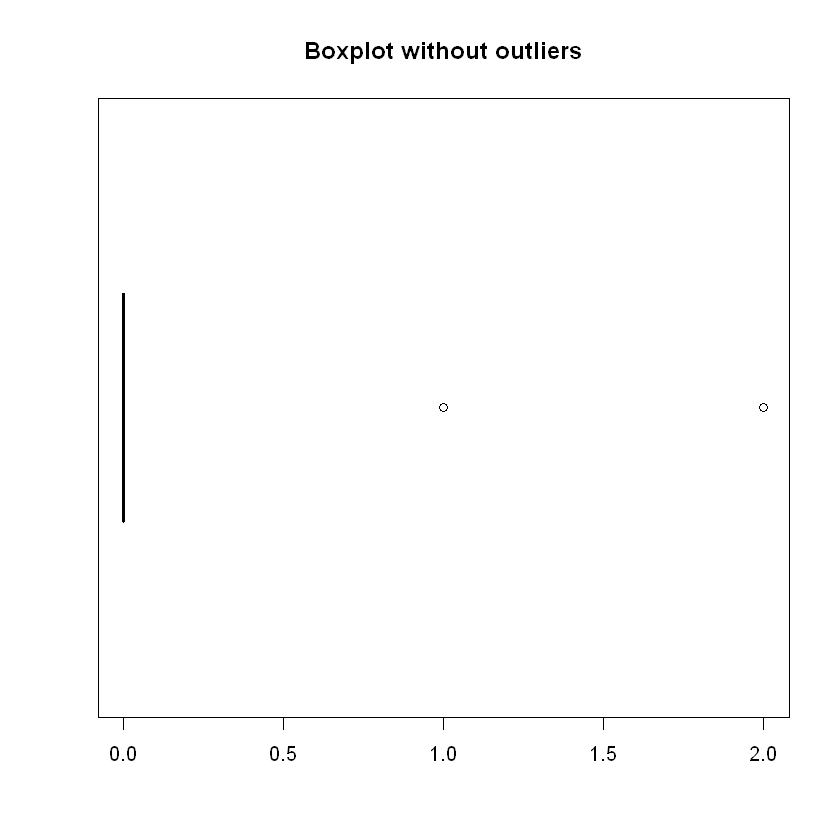


 Pre-treatment Outliers:
 1 3 2 1 3 2 2 1 1 2 1 1 1 2 1 1 1 1 1 1 4 1 1 1 1 2 3 1 1 1 1 4 2 3 4 2 1 2 1 3 1 4 1 1 1 1 2 2 1 1 2 2 2 1 1 1 1 1 1 3 1 3 2 3 4 1 1 2 1 1 1 3 1 1 3 3 2 2 2 3 3 3 2 3 1 2 4 1 1 1 1 3 2 1 2 1 2 3 2 2 4 1 2 1 1 1 2 1 1 1 3 3 2 2 2 1 2 1 1 2 2 1 1 1 2 3 2 3 1 1 2 2 2 3 2 3 2 2 2 4 1 4 2 1 1 2 1 1 2 1 3 3 2 4 2 4 2 1 2 1 1 2 1 1 2 1 5 1 2 1 3 1 1 3 4 2 1 1 4 1 1 1 4 2 4 2 1 2 3 1 1 1 3 1 2 2 1 2 1 1 1 2 2 1 1 2 1 1 2 3 1 1 2 2 4 2 2 2 1 3 1 1 2 3 1 1 1 1 1 1 3 4 1 2 2 1 3 3 1 3 1 1 3 1 1 2 1 2 2 1 4 1 1 3 1 3 2 3 3 1 4 2 3 1 4 2 1 1 3 3 1 2 1 3 3 2 3 1 3 2 1 2 1 1 1 1 2 1 1 1 1 2 2 2 1 1 1 1 2 3 1 2
 Mean without outliers:
 0.0604

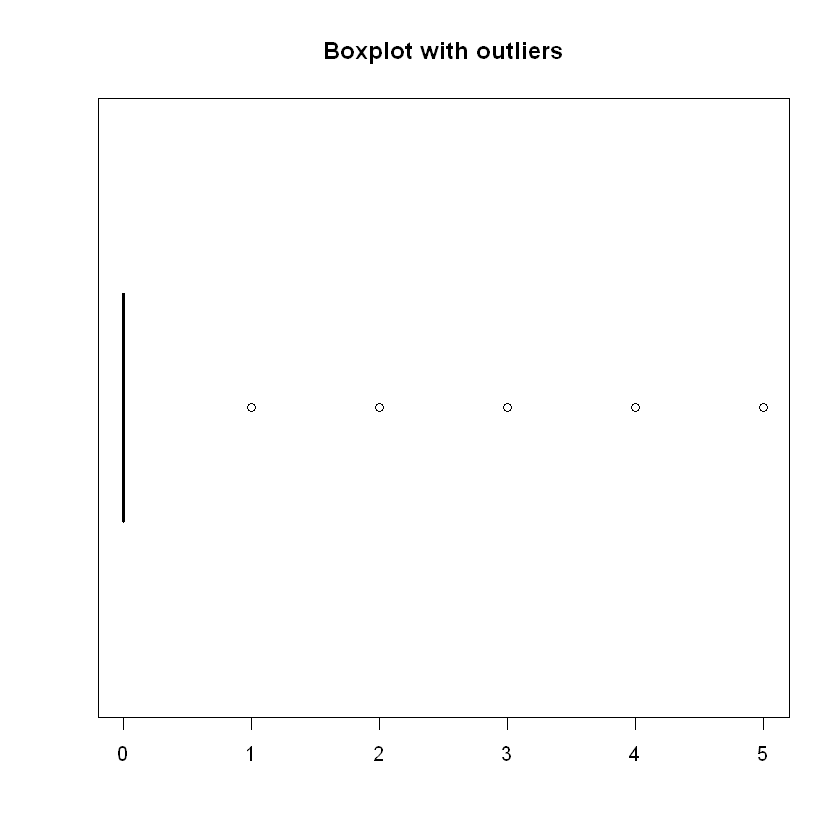


 Post-treatment Outliers:
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 Mean with outliers:
 0.0556

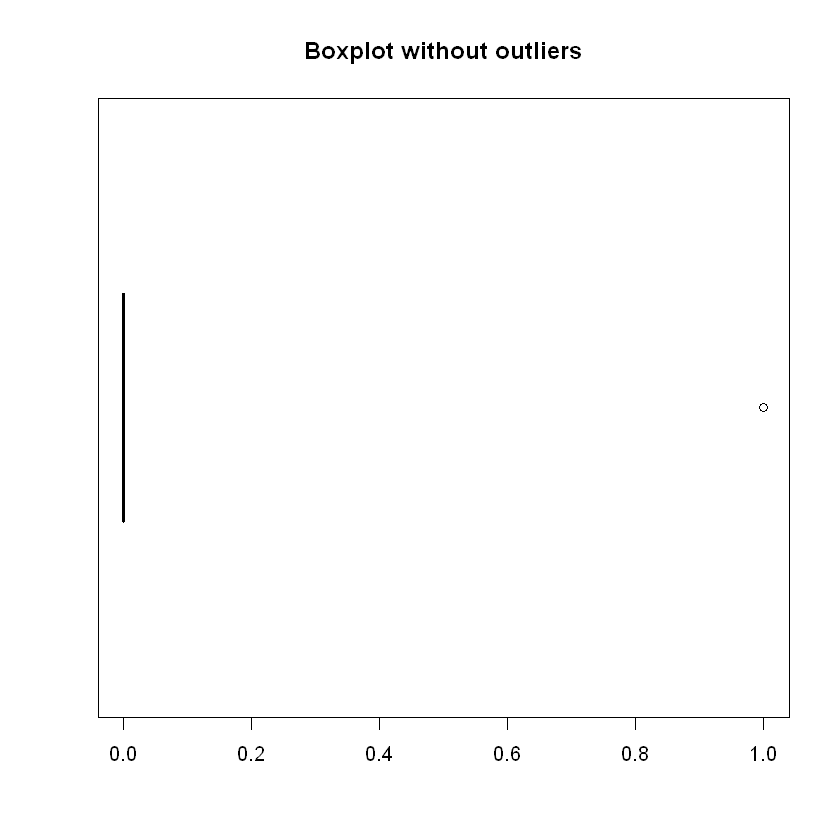


 Pre-treatment Outliers:
 2 2 1 3 1 2 2 2 1 1 2 1 2 1 1 1 2 1 3 1 1 1 1 1 1 1 1 1 1 4 2 3 2 1 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 3 1 3 1 6 1 1 1 2 2 1 1 1 1 1 1 3 1 1 1 2 2 1 1 2 1 2 3 2 1 1 2 1 3 1 1 2 1 1 1 1 3 1 1 2 1 1 3 2 1 2 1 1 1 2 1 3 1 1 1 2 2 1 2 1 3 1 1 1 3 3 1 1 2 1 2 2 1 1 2 1 1 1 1 2 1 3 1 2 1 1 1 1 1 3 1 2 1 1 2 1 1 1 1 1 1 1 3 2 1 1 2 1 2 1 1 1 5 2 3 1 1 1 2 2 3 2 1
 Mean without outliers:
 0

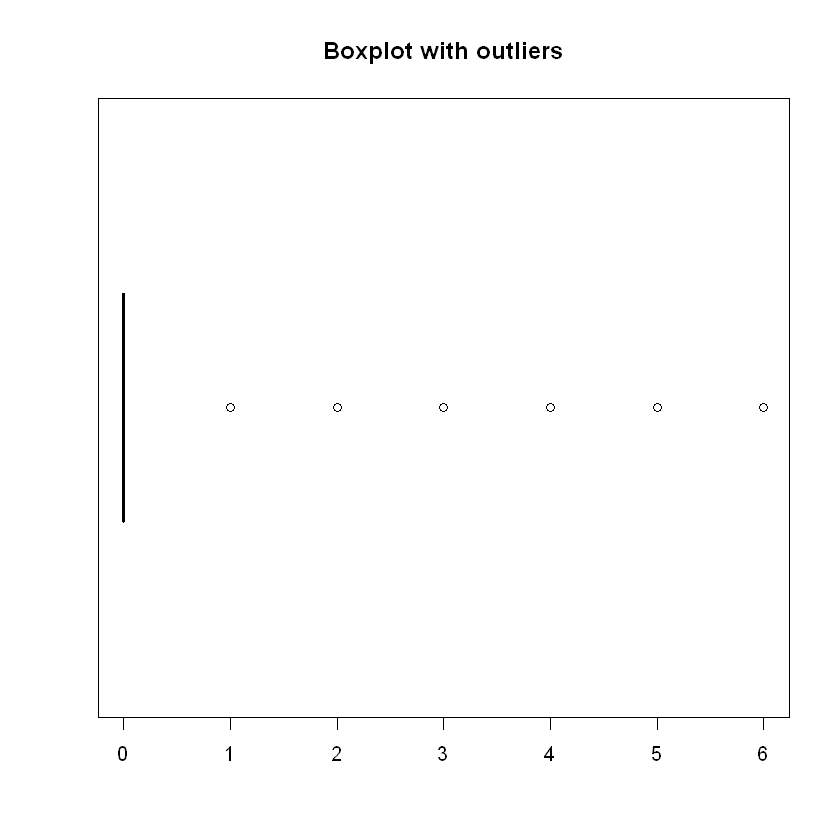


 Post-treatment Outliers:
 
 Mean with outliers:
 0.1146

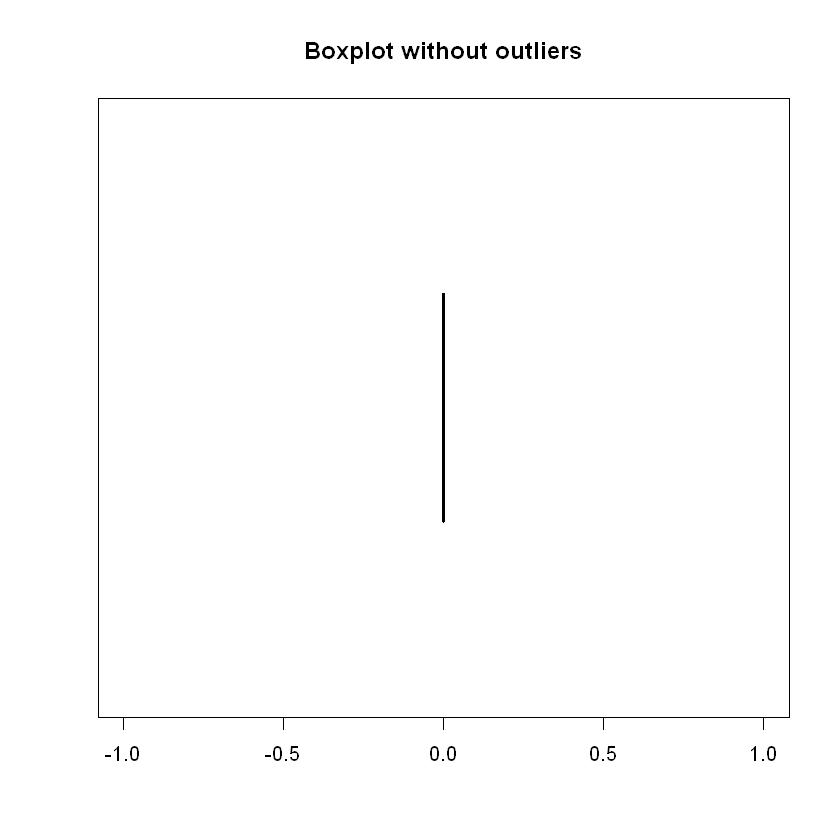


 Pre-treatment Outliers:
 2 5 2 3 3 2 5 1 1 3 4 1 1 2 3 2 1 4 7 1 3 2 1 1 3 2 1 1 2 1 1 1 3 1 3 1 5 2 1 3 2 3 2 1 1 2 1 2 2 1 4 1 4 1 2 2 5 3 4 1 3 1 1 6 2 2 1 1 4 2 1 2 3 4 3 2 2 1 3 3 1 4 3 2 2 1 2 2 1 4 2 2 1 2 2 2 2 4 1 1 4 2 2 1 1 4 5 3 2 1 2 5 3 1 3 2 1 2 3 1 2 1 1 4 2 2 1 3 1 2 2 5 2 2 2 1 1 1 1 2 4 1 3 2 2 3 2 1 1 1 1 2 3 1 3 3 2 5 2 3 3 2 2 3 2 4 1 1 4 6 1 1 1 1 3 3 2 3 4 1 4 2 4 1 3 3 2 1 3 2 2 3 1 4 3 2 1 3 2 3 1 4 2 2 3 3 2 4 2 1 6 2 4 2 2 1 2 3 2 1 1 2 3 3 4 2 5 1 2 2 2 4 2 2 2 5 1 1 1 2 2 2 3 3 3 3 1 1 3 1 4
 Mean without outliers:
 0.0502

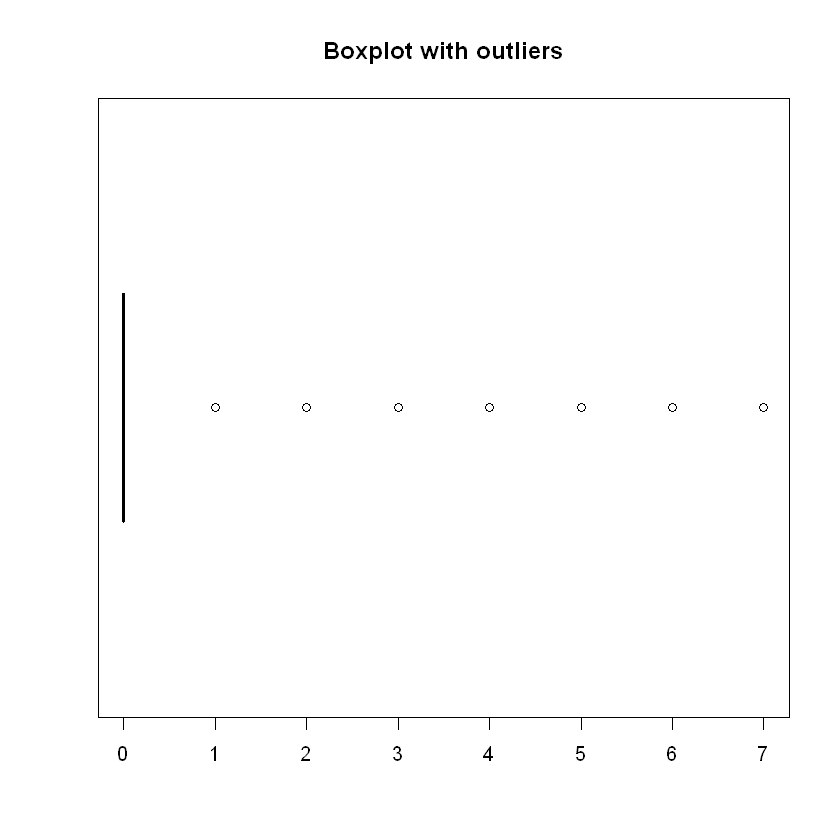


 Post-treatment Outliers:
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 Mean with outliers:
 0.0466

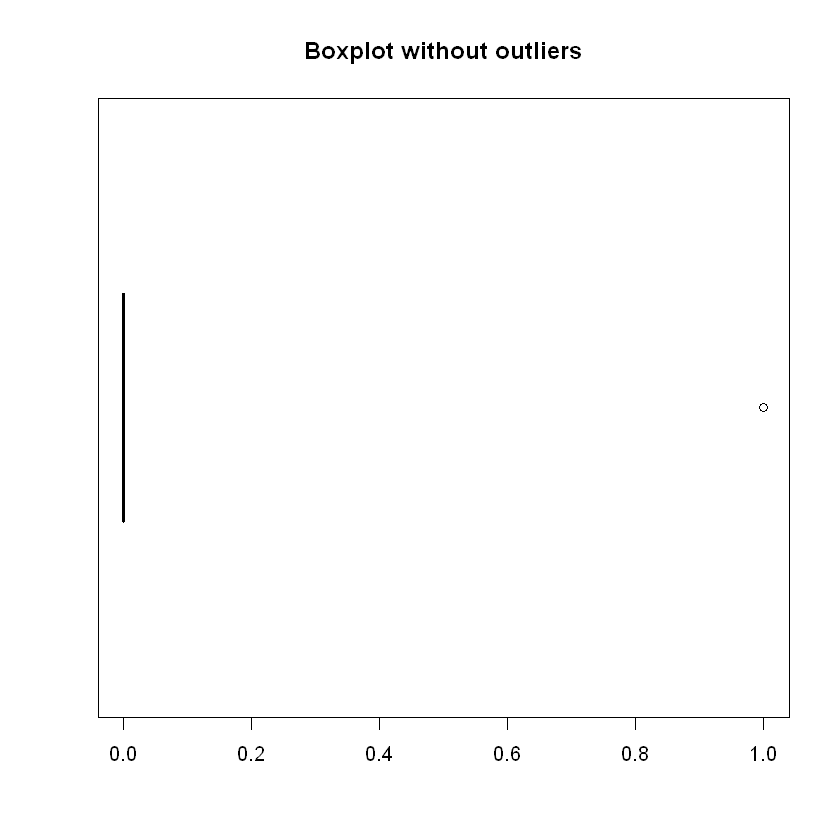


 Pre-treatment Outliers:
 4 3 2 4 2 6 7 2 2 5 3 2 6 1 6 4 5 4 6 6 2 6 5 5 4 8 6 4 3 7 2 2 4 4 6 4 6 3 5 1 2 6 3 4 5 7 1 3 6 3 3 3 2 3 2 5 5 3
 Mean without outliers:
 0

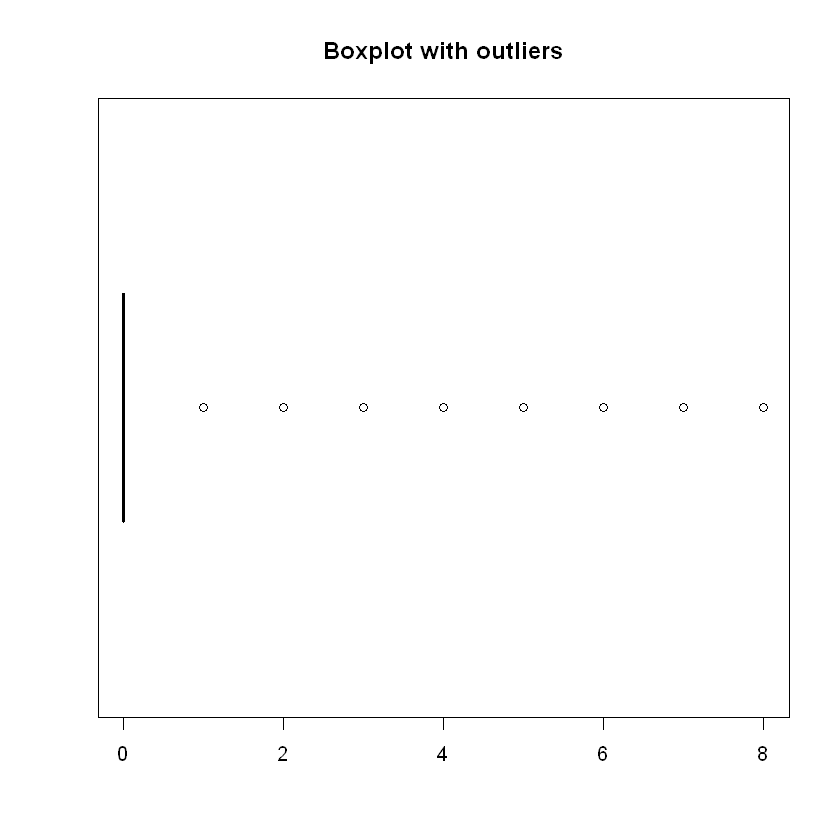


 Post-treatment Outliers:
 
 Mean with outliers:
 1.8474

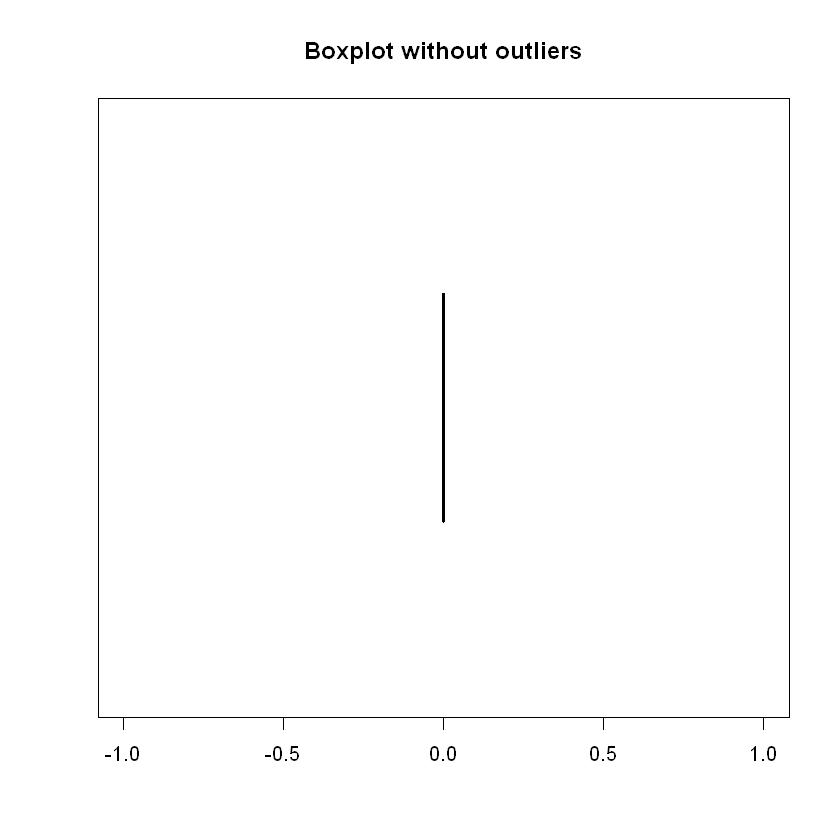


 Pre-treatment Outliers:
 11 11 12 11 11 13 12 11 12 14 12 11 12 13 13 15 12 12 11 11 16 12 11 12 12 11 12 12 11 11 11 11 11 11 12 12 11 11 14 15 11 11 11 11 11 11 11 12 13 11 11 12 11 15 11 11 14 15 12 15 12 11 11 11 11 11 14
 Mean without outliers:
 1.751

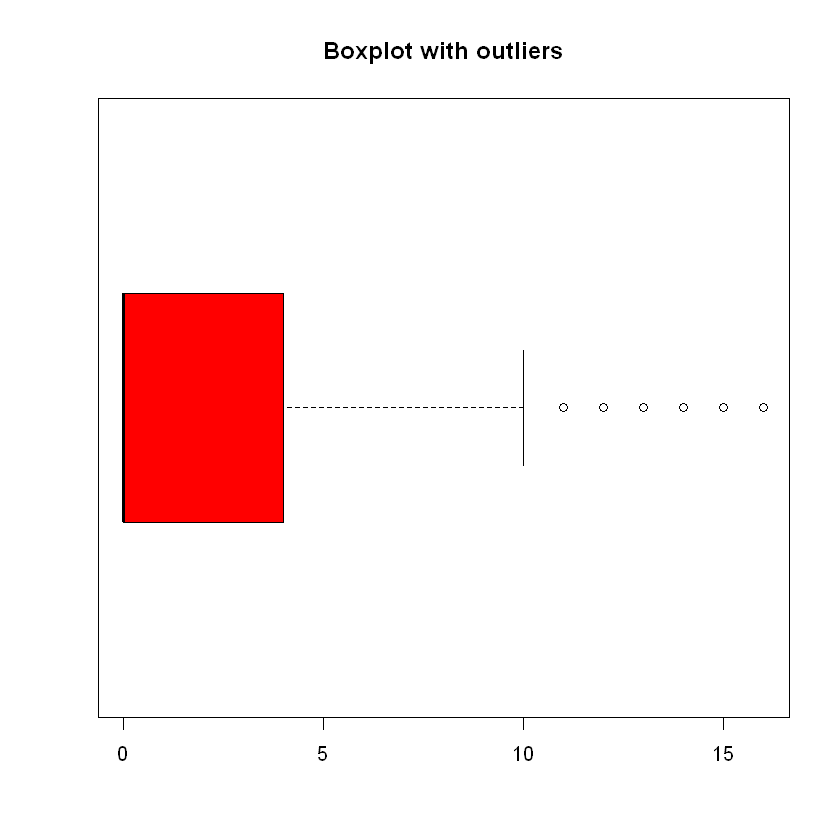


 Post-treatment Outliers:
 
 Mean with outliers:
 23.2326

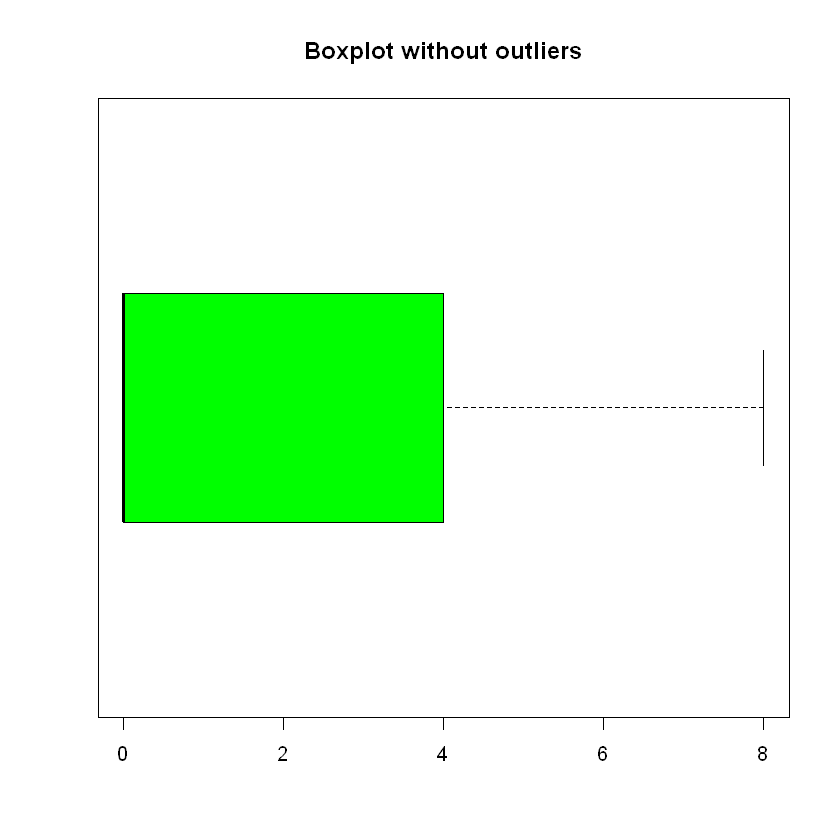


 Pre-treatment Outliers:
 75.8 88.6 78.1 92.4 67.8 67.7 85.8 94.8 96.3 78.4 69.4 68.6 73.2 88.7 68.9 75.7 70.6 88.8 80.8 91.1 86.5 87.9 64.3 86.9 65.9 88.6 80.7 86.4 66.8 91.6 65.5 94.6 95.6 93.4 77.9 96.6 75.9 86 73.5 71.8 82.8 79.2 84 82.3 66.4 94.2 64.6 68.6 87.3 95.3 85.1 89.3 75.4 91.9 92 77.2 83.5 84.2 88.4 83.7 92.1 72.2 86 80.9 89 88.3 88.5 65.2 68.6 67.6 76 72.6 89.9 71.2 69.8 91.7 91.3 70.3 64.6 79.3 94.2 70 77.6 89.4 90.6 86.9 78.5 94.4 79.1 81.1 71.5 89.5 81.2 75.3 80.3 87.7 75.7 79.4 72.5 70.8 65.5 64.9 71 98.5 89.7 66.2 70.9 87.4 72 71.1 64 69.2 79 76.7 86.2 98.2 86.9 69.6 78 79.1 94.5 96.8 83.9 82.7 69.1 87.7 90.7 65.8 94.1 90 97.3 95.6 84.7 93.3 79.4 69.7 67.6 88.5 67.2 94 70.6 65.2 88 89 93.2 78 68.4 76.2 77.7 95.7 71.5 80.7 99.6 88.3 85.1 82.9 98.5 90.7 84.1 71.9 97.3 73.3 73.1 64.1 76.2 72.9 98.5 83 83.3 81.7 87.7 72 68.1 64.6 64.6 74 72.8 69.4 81.2 84.8 99.2 64.5 65.7 67.7 78.3 82.8 87.6 86 83.8 67.7 69 89.3 79.2 80.6 89.7 82.5 93.6 90.8 79.8 67 68.6 94.4 68.2 70 7

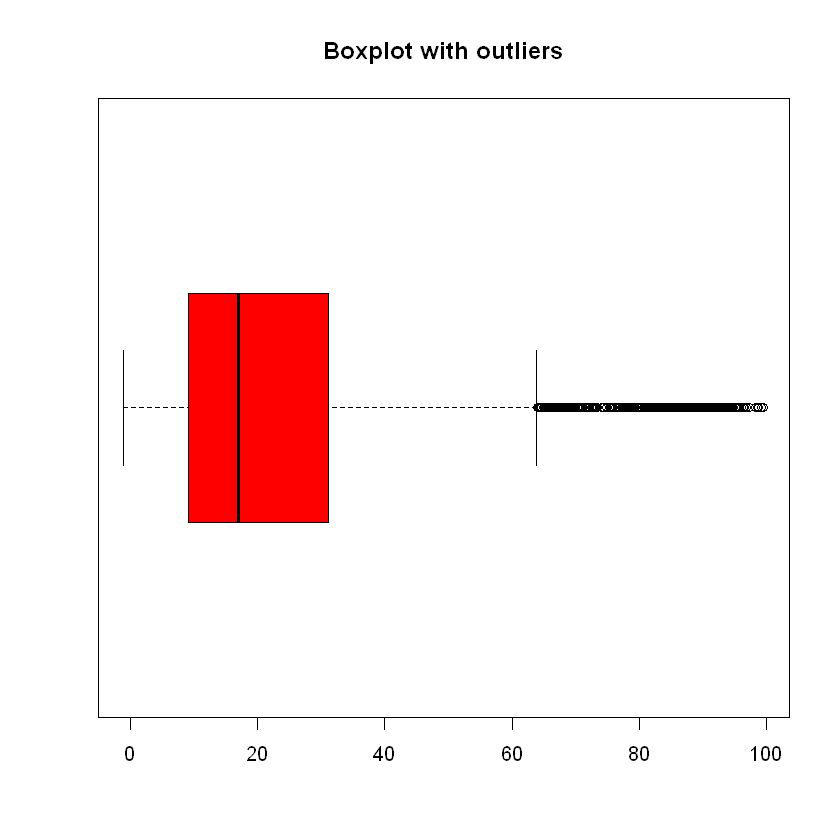


 Post-treatment Outliers:
 72 72 72 72 67.8 67.7 72 72 72 72 69.4 68.6 72 72 68.9 72 70.6 72 72 72 72 72 64.3 72 65.9 72 72 72 66.8 72 65.5 72 72 72 72 72 72 72 72 71.8 72 72 72 72 66.4 72 64.6 68.6 72 72 72 72 72 72 72 72 72 72 72 72 72 72 72 72 72 72 72 65.2 68.6 67.6 72 72 72 71.2 69.8 72 72 70.3 64.6 72 72 70 72 72 72 72 72 72 72 72 71.5 72 72 72 72 72 72 72 72 70.8 65.5 64.9 71 72 72 66.2 70.9 72 72 71.1 64 69.2 72 72 72 72 72 69.6 72 72 72 72 72 72 69.1 72 72 65.8 72 72 72 72 72 72 72 69.7 67.6 72 67.2 72 70.6 65.2 72 72 72 72 68.4 72 72 72 71.5 72 72 72 72 72 72 72 72 71.9 72 72 72 64.1 72 72 72 72 72 72 72 72 68.1 64.6 64.6 72 72 69.4 72 72 72 64.5 65.7 67.7 72 72 72 72 72 67.7 69 72 72 72 72 72 72 72 72 67 68.6 72 68.2 70 72 72 72 72 72 72 72 72 72 72 72 64.1 69.7 72 72 71.7 72 72 72 72 64.6 72 72 72 72 72 72 72 69.6 72 72 71 72 67.5 69.6 70 72 72 72 72 72 72 69.7 72 72 72 71.5 72 72 72 66 72 70.9 72 72 72 72 70.4 66 72 72 72 72 72 71.7 72 72 72 66.7 72 72 72 72 72 72 72 72 6

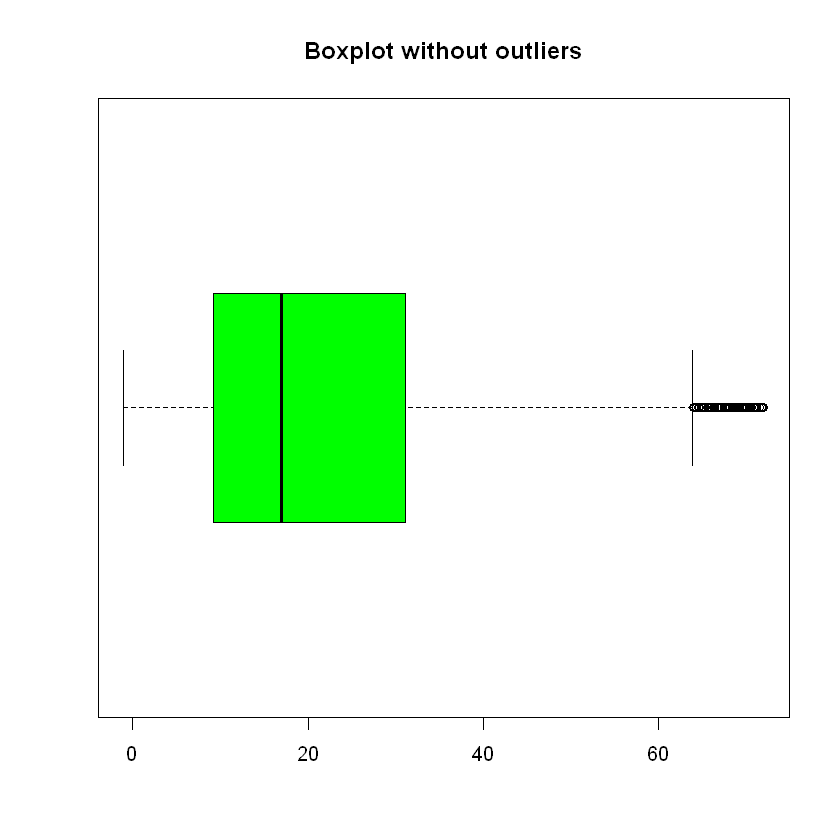


 Pre-treatment Outliers:
 34 36 35 42 42 34 38 35 35 39 38 36 40 34 36 37 35 34 35 34 42 38 38 41 35 34 34 42 37 37 42 38 35 34 34 42 38 35 37 34 36 35
 Mean without outliers:
 17.3326

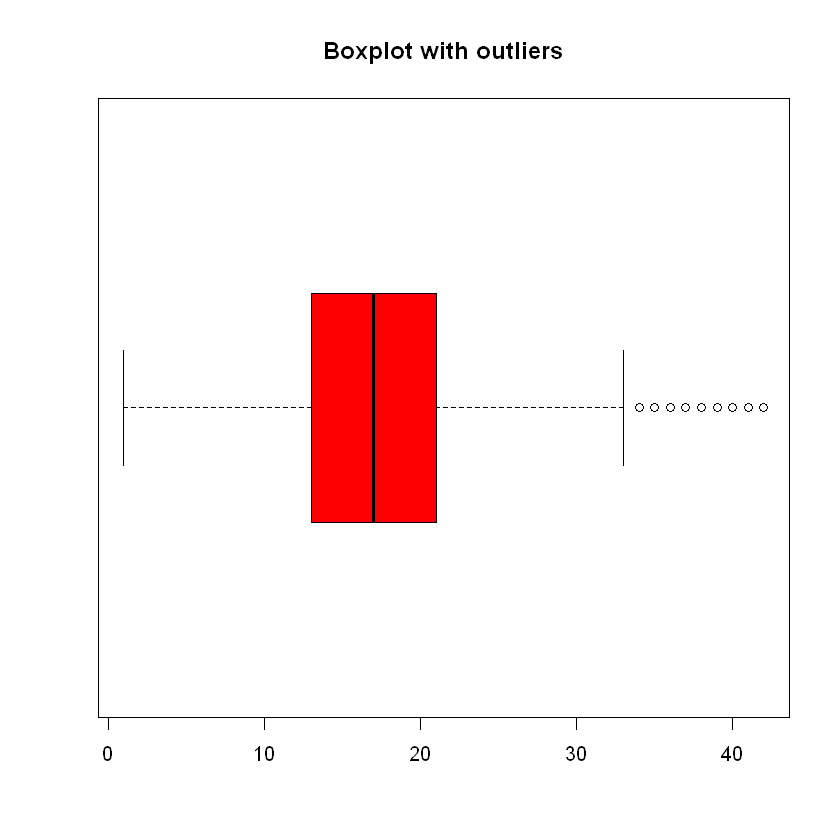


 Post-treatment Outliers:
 
 Mean with outliers:
 38.2048

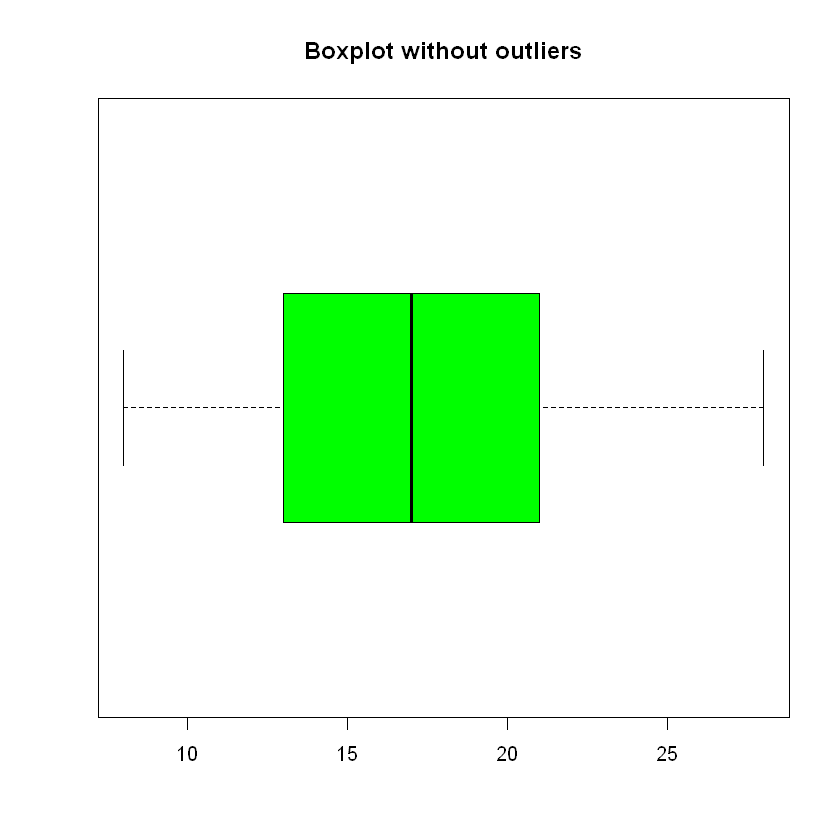


 Pre-treatment Outliers:
 
 Mean without outliers:
 38.2978

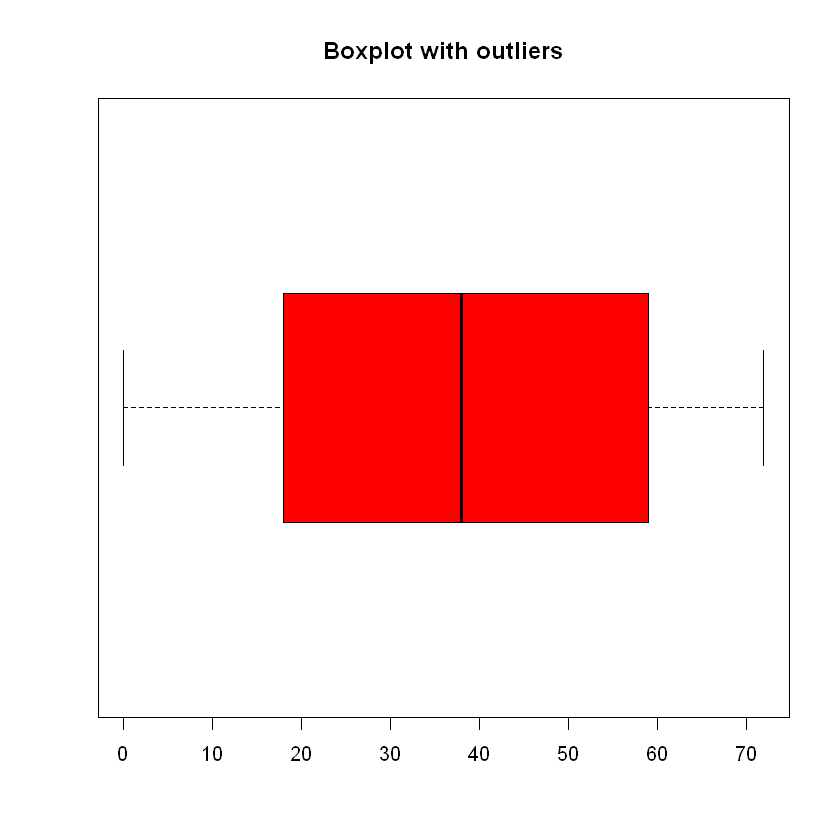


 Post-treatment Outliers:
 
 Mean with outliers:
 13.4715

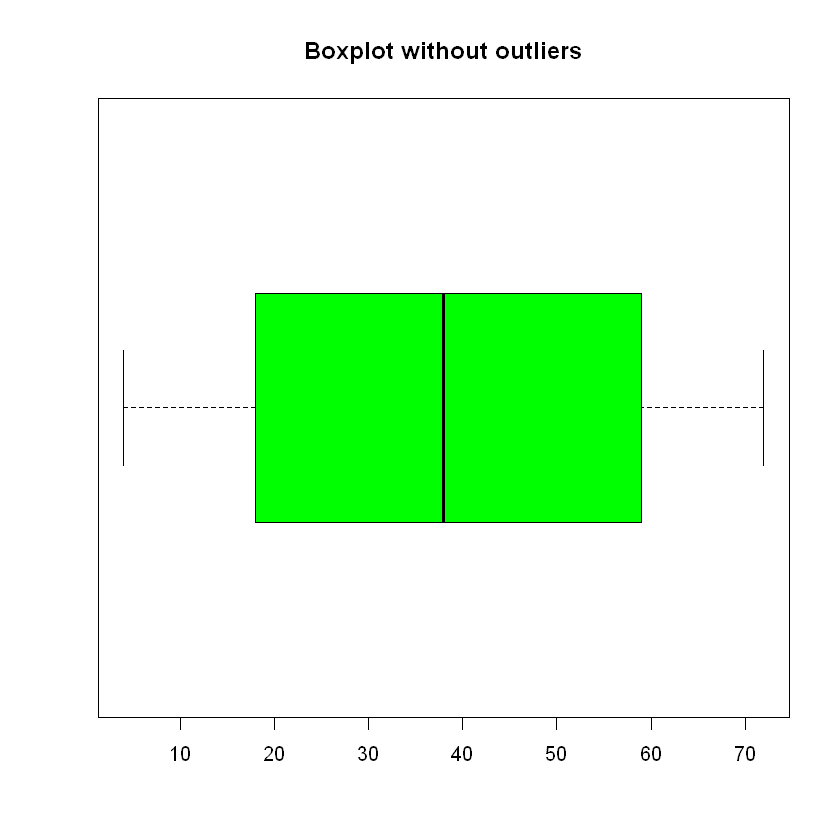


 Pre-treatment Outliers:
 38.7 34.8 89.45 36.35 41.75 35.8 100.7 46.7 73.55 68.1 58.85 44.2 34.85 50.5 38.1 72.45 33.75 60.2 38.9 64.5 58.65 39.35 34.05 56.15 43.8 78.6 39.9 63.15 68.35 87.9 43.1 40.1 51.05 35.4 42.8 74.45 51.65 49.05 42.2 56.85 34 38.45 36.2 35.65 55.1 36.75 33.5 33.45 56.25 33.4 39.65 49.2 47.55 93.9 44.05 34 51 36.65 33.85 65.3 56.9 35.95 44.15 40.1 57.55 39.15 39.5 35.5 35.45 78.8 46.9 61.45 97.3 44 47.95 43.3 34.05 36.95 50.6 37.75 45.4 140.2 56.35 34.5 65.2 47.6 54.65 36.35 36.75 39.95 35.2 41.25 38.4 52.9 74.95 78.7 36.15 34 35.45 81.05 34 65.05 37.4 61.8 57.7 40.7 33.2 33.3 37.1 42.55 38.6 33.5 47.6 39.1 38.15 37.6 66.35 48.6 72.2 36.3 49.9 61.7 38.4 34 84.6 78.7 95.95 43.95 35 37 52.9 69.25 35.35 37.5 72.75 50.15 179.85 33.3 64.55 33.3 62.9 66.9 34.9 49.8 33 38.4 84 36 36.9 40.9 42.15 48.5 63.7 50.75 41.45 37.2 46.2 53.5 36.5 55.4 113.75 47.6 45.95 34.05 78.25 54.6 45.3 49.05 46.5 75.6 69.4 49.5 51.8 51.05 41.4 40.5 48.3 47.95 38 46.5 34.55 38.7 43.6 50.75 37

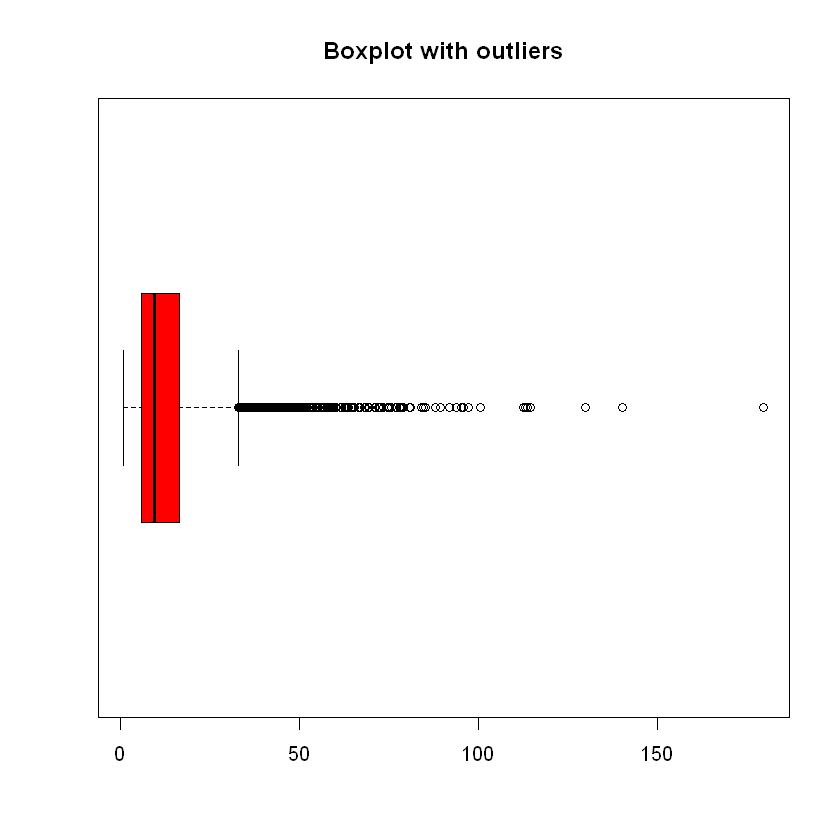


 Post-treatment Outliers:
 36.7575 34.8 36.7575 36.35 36.7575 35.8 36.7575 36.7575 36.7575 36.7575 36.7575 36.7575 34.85 36.7575 36.7575 36.7575 33.75 36.7575 36.7575 36.7575 36.7575 36.7575 34.05 36.7575 36.7575 36.7575 36.7575 36.7575 36.7575 36.7575 36.7575 36.7575 36.7575 35.4 36.7575 36.7575 36.7575 36.7575 36.7575 36.7575 34 36.7575 36.2 35.65 36.7575 36.75 33.5 33.45 36.7575 33.4 36.7575 36.7575 36.7575 36.7575 36.7575 34 36.7575 36.65 33.85 36.7575 36.7575 35.95 36.7575 36.7575 36.7575 36.7575 36.7575 35.5 35.45 36.7575 36.7575 36.7575 36.7575 36.7575 36.7575 36.7575 34.05 36.7575 36.7575 36.7575 36.7575 36.7575 36.7575 34.5 36.7575 36.7575 36.7575 36.35 36.75 36.7575 35.2 36.7575 36.7575 36.7575 36.7575 36.7575 36.15 34 35.45 36.7575 34 36.7575 36.7575 36.7575 36.7575 36.7575 33.2 33.3 36.7575 36.7575 36.7575 33.5 36.7575 36.7575 36.7575 36.7575 36.7575 36.7575 36.7575 36.3 36.7575 36.7575 36.7575 34 36.7575 36.7575 36.7575 36.7575 35 36.7575 36.7575 36.7575 35.35 36.7575 36.

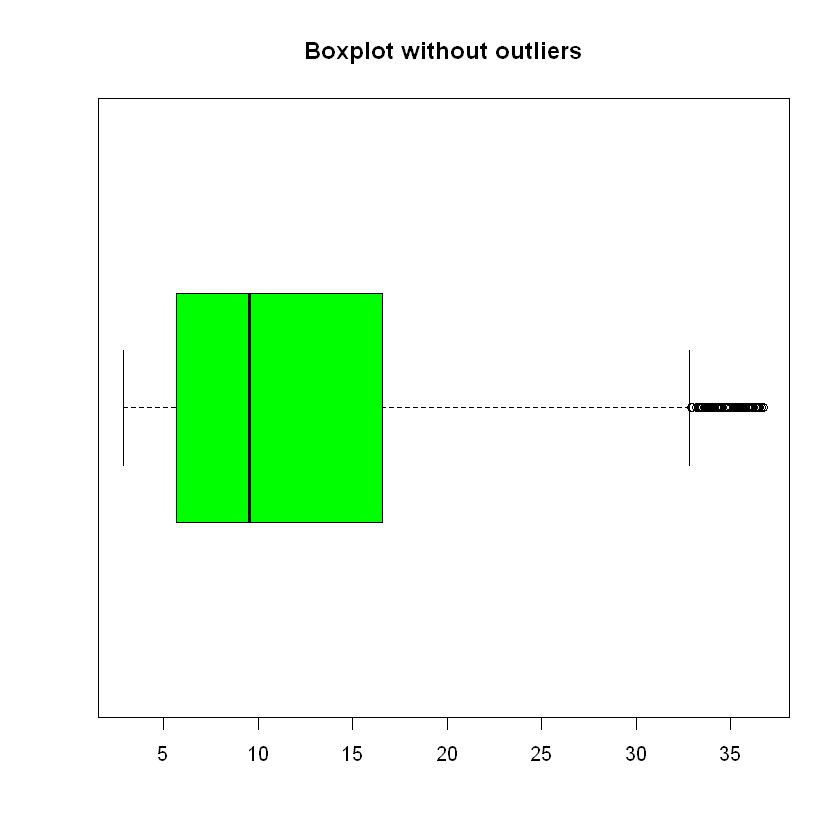


 Pre-treatment Outliers:
 4.49 4.61 4.48 -0.11 4.54 -0.11 -0.05 4.58 0.1 4.94 4.44 4.56 5.19 4.43 4.73 4.56 4.44 0.05 4.73 0 4.52 4.87 0.1 4.74 4.72
 Mean without outliers:
 2.285

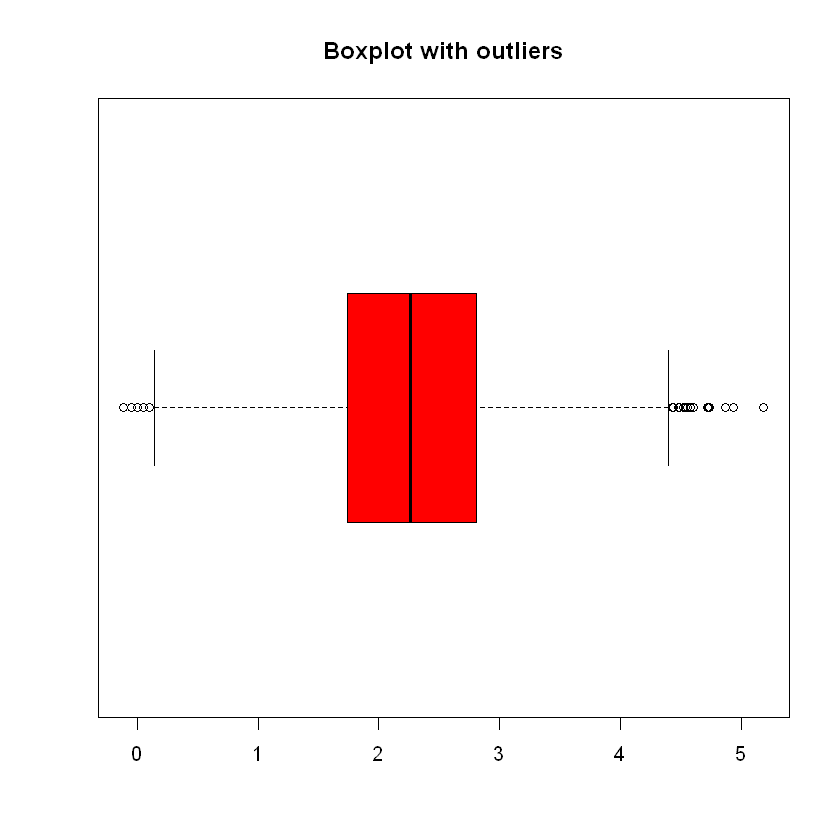


 Post-treatment Outliers:
 
 Mean with outliers:
 2210.134

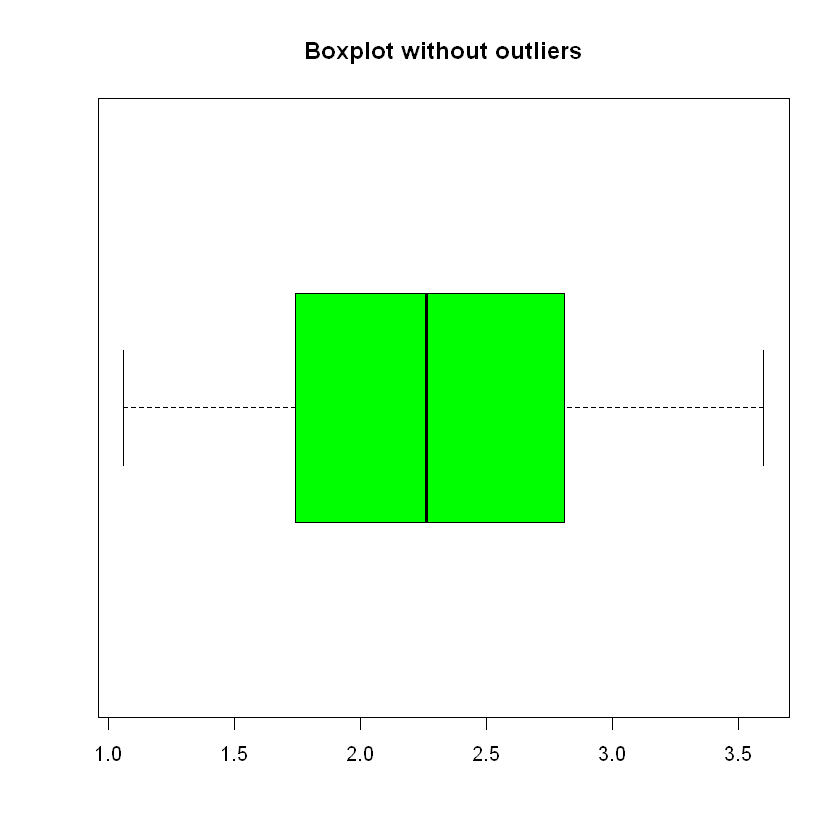


 Pre-treatment Outliers:
 
 Mean without outliers:
 2209.72

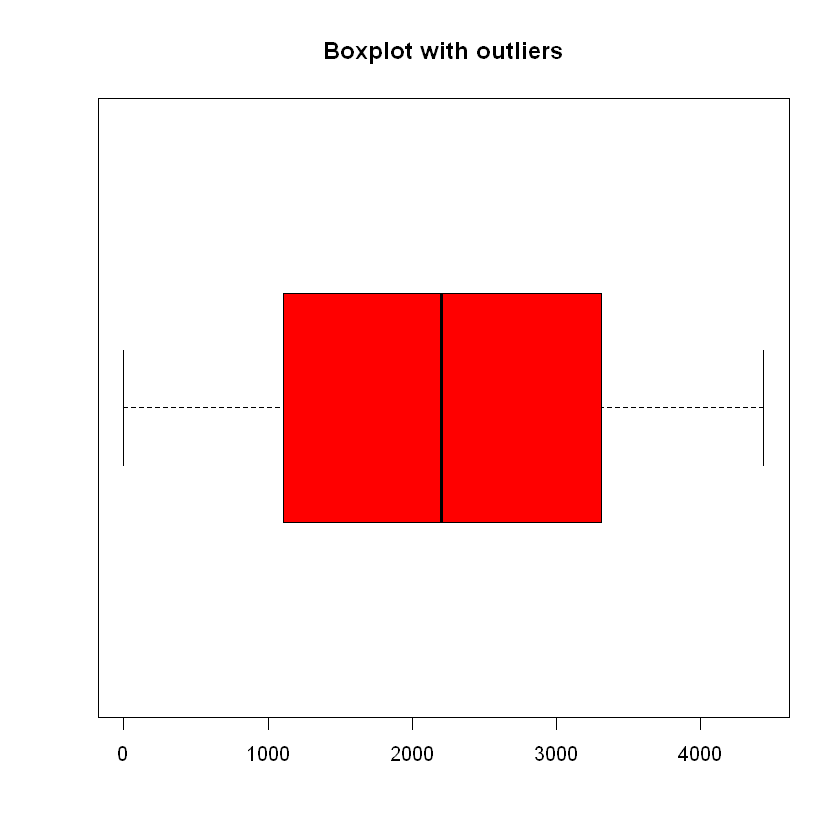


 Post-treatment Outliers:
 
 Mean with outliers:
 436.081

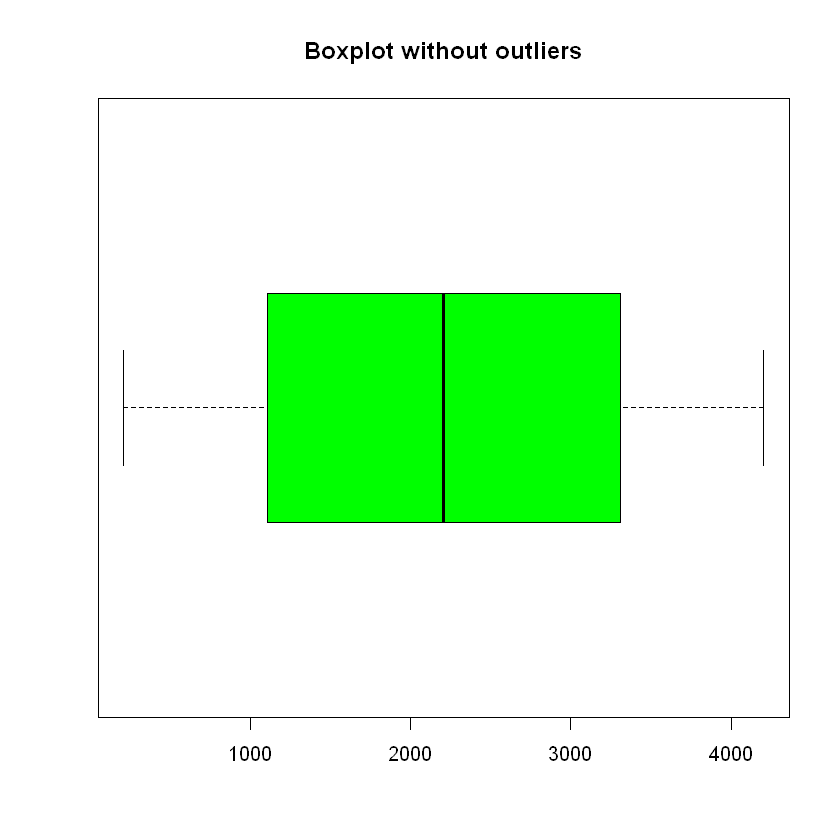


 Pre-treatment Outliers:
 9 2 6 3 2 1 9 5 8 8 3 6 3 9 7 4 9
 Mean without outliers:
 437.5964

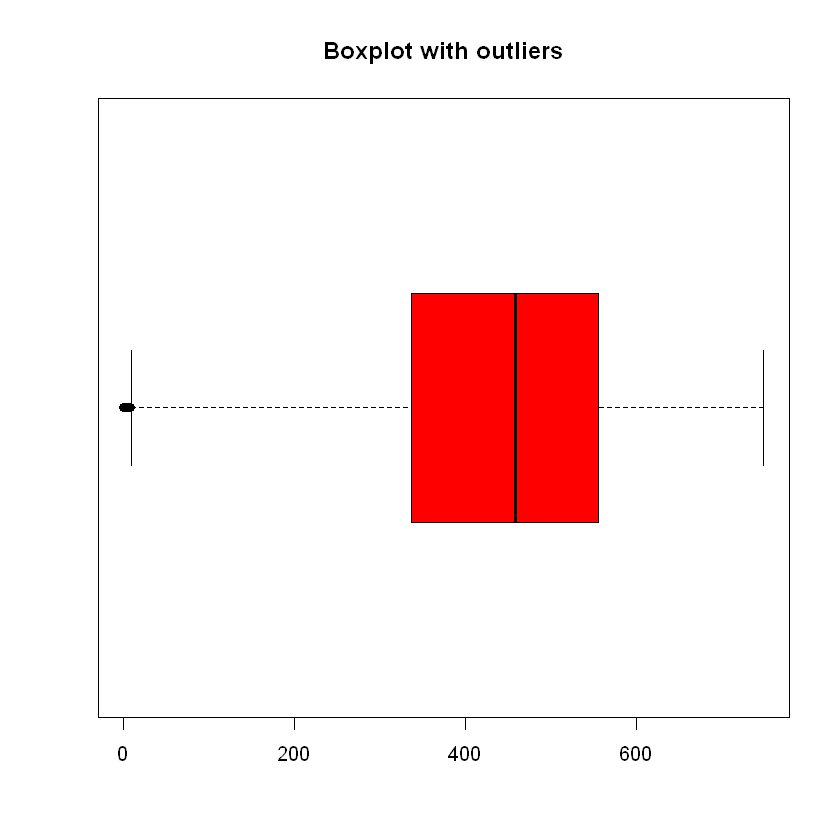


 Post-treatment Outliers:
 
 Mean with outliers:
 13.2645

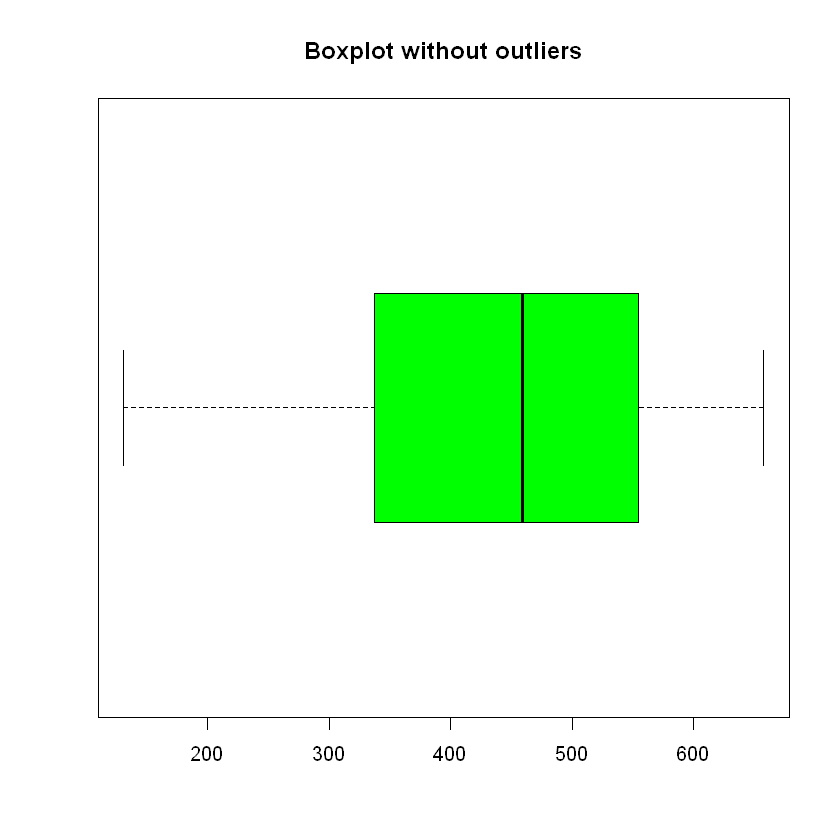


 Pre-treatment Outliers:
 75.5 65.75 73.5 69.5 67 62 66.25 173 99.25 78.5 71 67.25 62.25 63.75 67 85 63.75 86 62.25 66 63.25 101.75 66 73 74 76.25 66.5 64.5 75 71 64.75 73.5 66.25 64 78.25 80.25 94.75
 Mean without outliers:
 12.7485

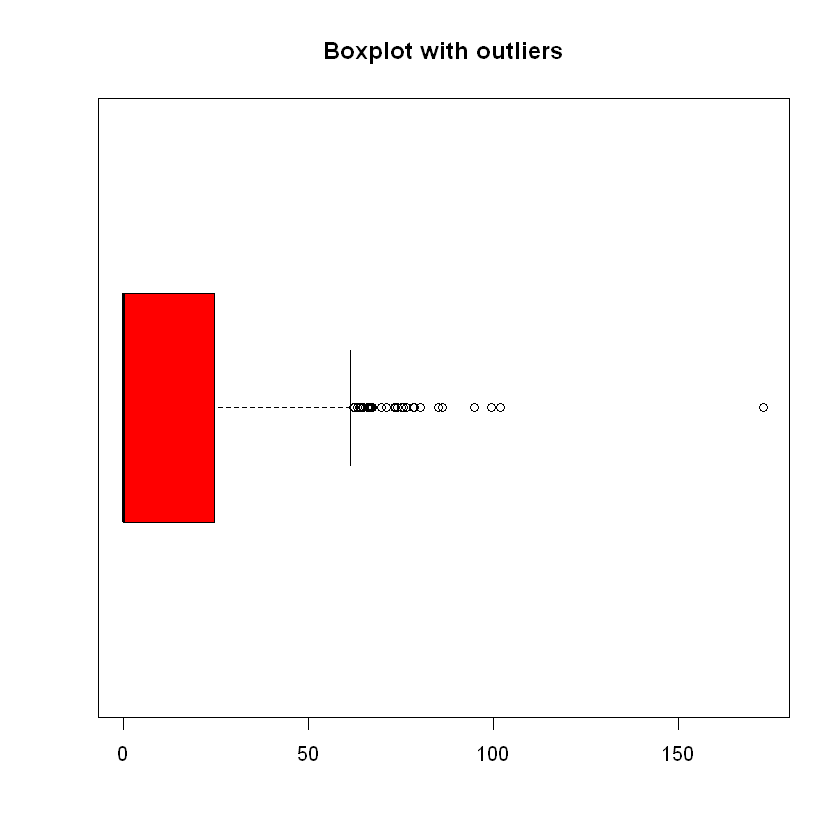


 Post-treatment Outliers:
 
 Mean with outliers:
 577.8325

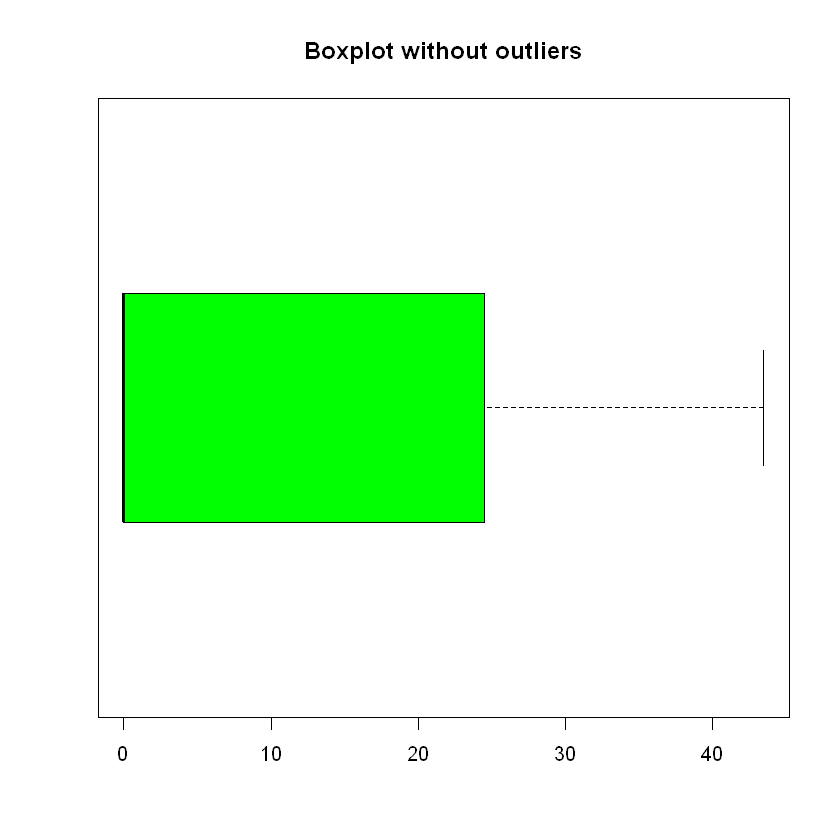


 Pre-treatment Outliers:
 3165.45 5310.55 3624.85 2663.3 2678 4707 3967.3 3072.8 5498.15 4276.45 3106.25 3973.75 3190.5 3096.75 4896.4 2295.9 3824.15 2266.05 4976.2 4398.75 3290.05 2548.85 2686.8 3761.8 3239.45 3356.8 3860.4 2378.3 2375.25 2722.45 2276.4 2616.75 4155 3387.95 3563.15 2765 3271.25 4173.75 3440.85 3706.4 3538.4 2894.05 3183.1 6923.45 2572.6 2236.65 3764.8 2236.6 2216.45 2347.25 3273.85 4103.05 2223.85 2363.1 2700.7 5495.45 2375.6 2562.15 2640.2 2529.55 2542.85 2487.1 2526.4 2247 2324.75 2603.3 2802.9 2498.25 3284.9 2404.55 2865.85 2367.25 4265.45 3653.3 2552.05 2831.35 4050.9 3989.65 2738.25 2874.05 2304 2269.3 3665.6 3667.4 3360.6 3775 2612.2 2464.05 2396.1 2307.25 2323.4 2586.3 2303.55 3235.85 2952.5 2600.9 2362.05 2530.8 3334.2 2676.6 3667.75 4762.7 2238.7 2341.9 2817.3 3242.35 3272.3 3282.9 2632.45 4358.7 3765.2 2890.55 4547 2977.6 2254.85 3023.2 3038.45 3111.35 2595.65 2402.55 3045.8 3338.5 2470.15 3170.9 2343.45 2623.65 2797.55 2389.05 3307.25 3400.8 2551.25 3132.8

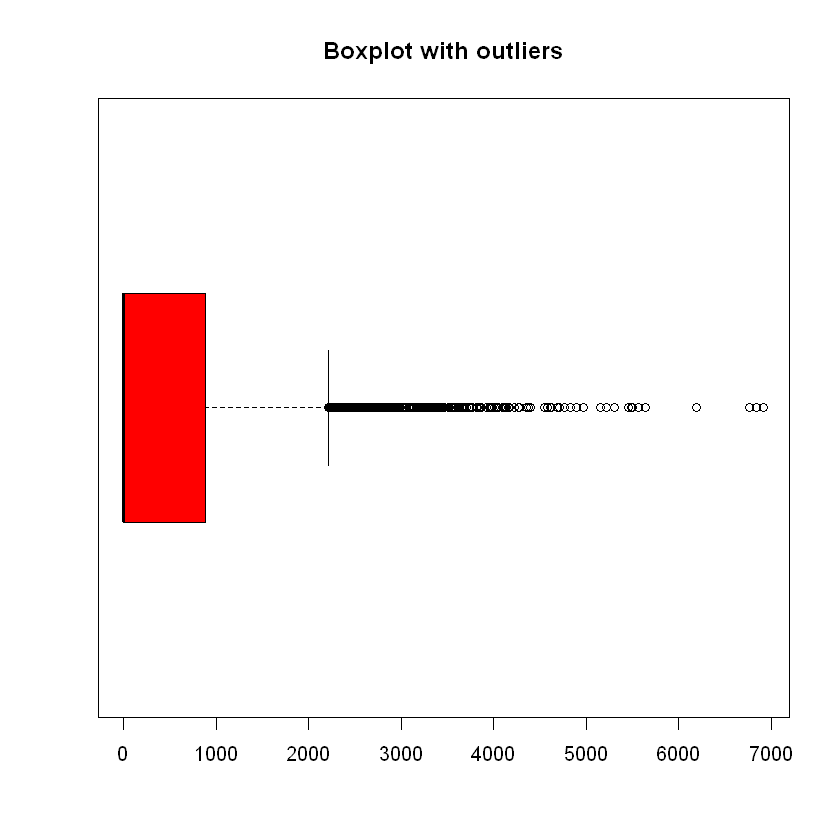


 Post-treatment Outliers:
 2620.212 2620.212 2620.212 2620.212 2620.212 2620.212 2620.212 2620.212 2620.212 2620.212 2620.212 2620.212 2620.212 2620.212 2620.212 2295.9 2620.212 2266.05 2620.212 2620.212 2620.212 2548.85 2620.212 2620.212 2620.212 2620.212 2620.212 2378.3 2375.25 2620.212 2276.4 2616.75 2620.212 2620.212 2620.212 2620.212 2620.212 2620.212 2620.212 2620.212 2620.212 2620.212 2620.212 2620.212 2572.6 2236.65 2620.212 2236.6 2216.45 2347.25 2620.212 2620.212 2223.85 2363.1 2620.212 2620.212 2375.6 2562.15 2620.212 2529.55 2542.85 2487.1 2526.4 2247 2324.75 2603.3 2620.212 2498.25 2620.212 2404.55 2620.212 2367.25 2620.212 2620.212 2552.05 2620.212 2620.212 2620.212 2620.212 2620.212 2304 2269.3 2620.212 2620.212 2620.212 2620.212 2612.2 2464.05 2396.1 2307.25 2323.4 2586.3 2303.55 2620.212 2620.212 2600.9 2362.05 2530.8 2620.212 2620.212 2620.212 2620.212 2238.7 2341.9 2620.212 2620.212 2620.212 2620.212 2620.212 2620.212 2620.212 2620.212 2620.212 2620.212 2254.85 2620

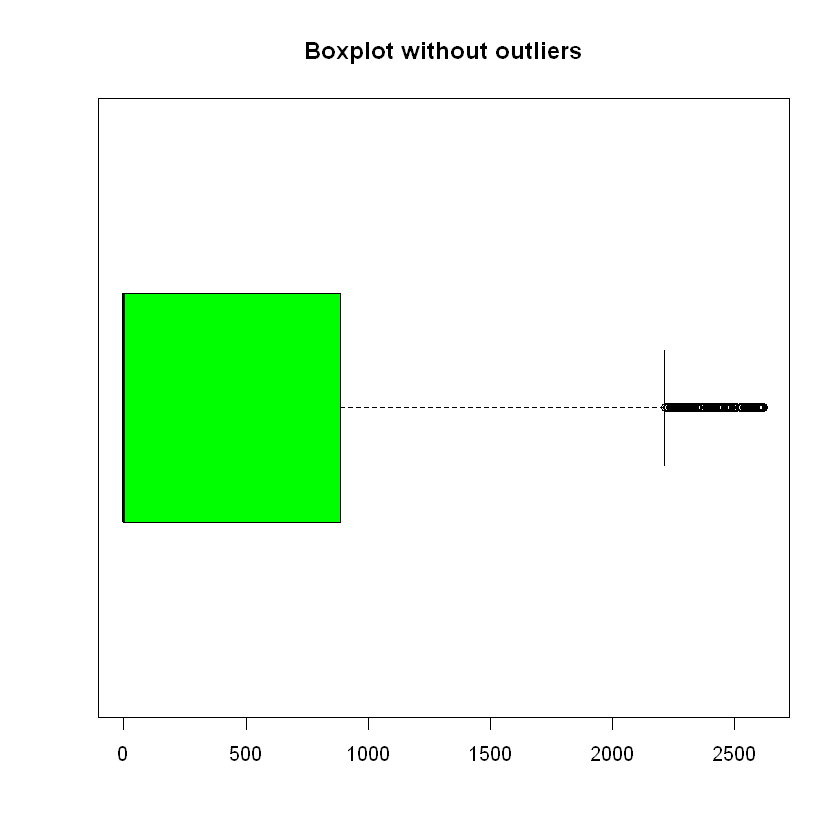


 Pre-treatment Outliers:
 78.8 79.45 94.1 106.3 91.2 79.5 89.35 83.9 86.35
 Mean without outliers:
 12.5489

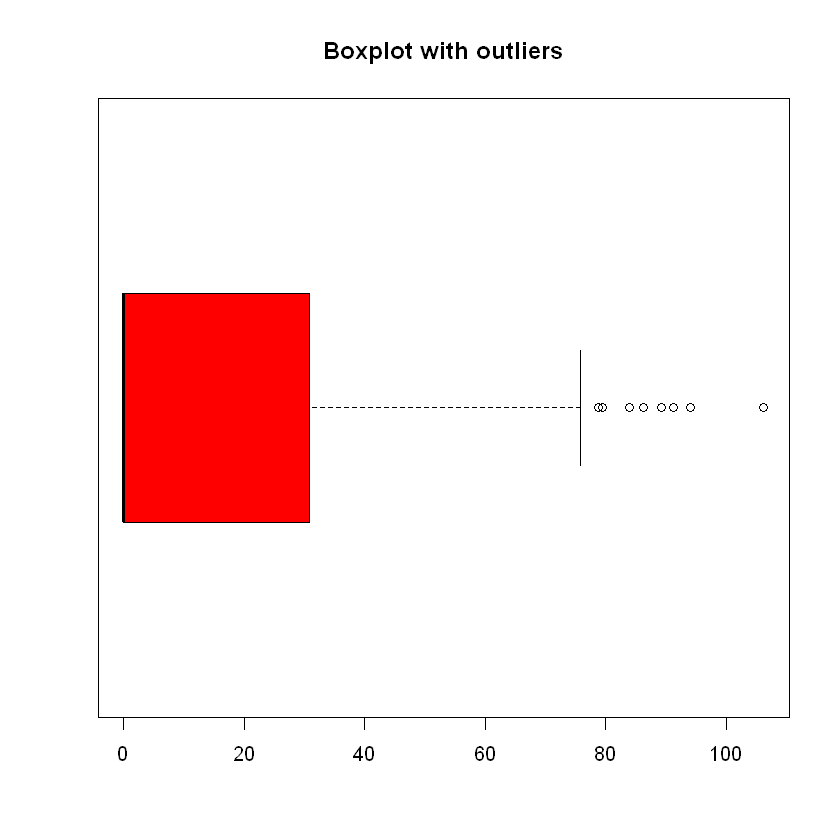


 Post-treatment Outliers:
 
 Mean with outliers:
 470.1764

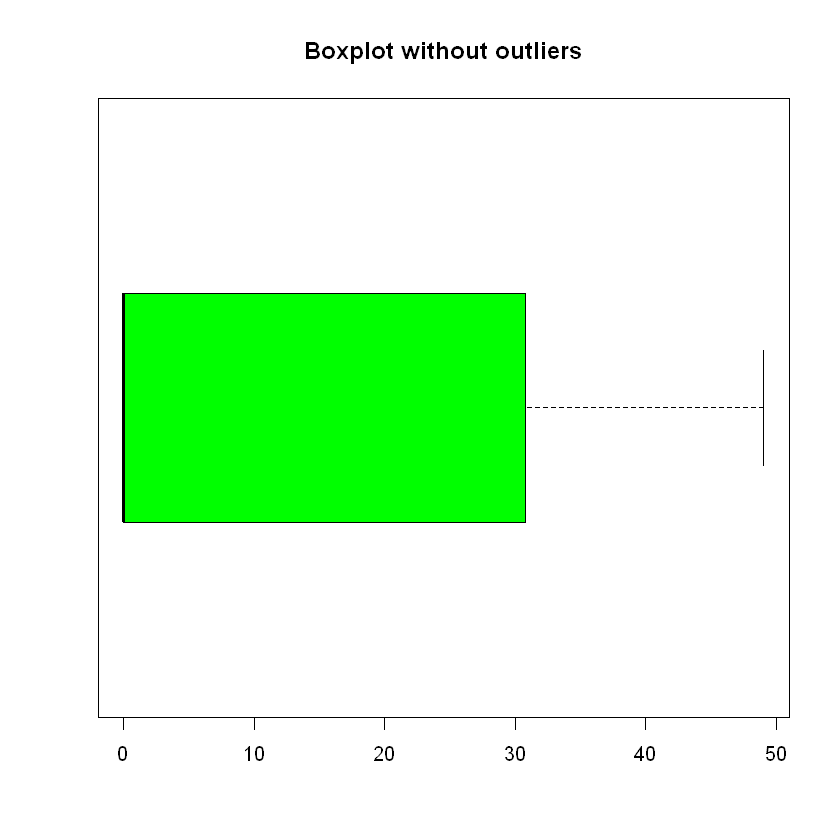


 Pre-treatment Outliers:
 1975 1568.35 2580.75 1990.25 1790.8 1663.95 2874.15 4064.25 1693.6 2973 1740.25 1319.5 1886.7 3054.8 3887.2 2046.8 3676.2 3395 3259.85 2430.95 2674.25 3509.6 4722.4 2148.6 1973.1 1814.65 2278.5 2054 1910 1276.9 1930.1 1984.15 2126.5 2249.4 2771.25 1720.2 2694.25 4574.45 1362.65 1306.75 2887.55 2437.45 2657.8 2499.9 1845.55 3140.2 1341.65 2517.35 2594.6 1929.05 2336.35 1341.25 2464.15 3225.25 2516.9 1403.7 2846.05 1486.05 2049.9 2765.15 2222.4 1732.45 1990.95 2478.6 2601.75 2577.95 1450.2 3006.3 2917.6 2943.15 3481.05 1328.25 3080.8 2038.1 1974.8 2727 1641.55 2705.95 2001.2 3293.35 3049.85 1739.9 3062.5 1304.4 2159.95 1958.3 2384.8 1410.6 4004.15 2070.25 3101.6 3350.9 1526.5 3208 3276.1 2398.5 3586.25 3597.95 2901.7 3659.05 1628.85 3679.45 2184.05 2190.05 1370 1418.2 1861.6 1377.75 3343.9 2560.8 1531.25 3517.15 2092.5 2724.3 1586.7 1944.4 1383 1422.4 2260.25 2551.65 2197.2 1312.65 3222.55 2386.35 1460.25 1496.7 1589.3 1842 2047.65 1852.95 2358.25 1686.7 2398.6

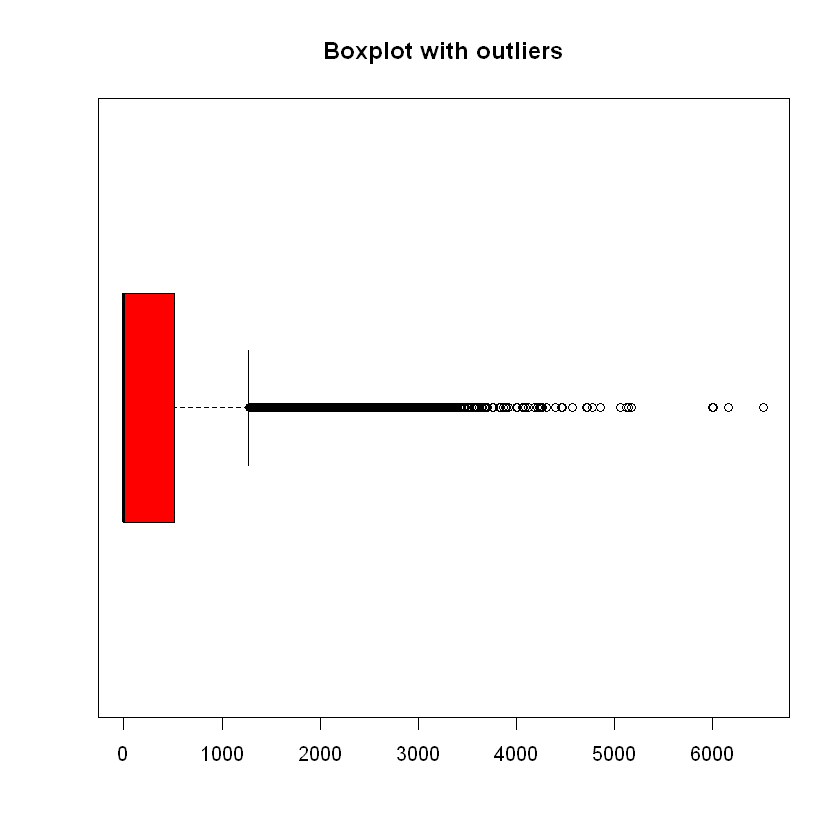


 Post-treatment Outliers:
 1975 1568.35 2580.75 1990.25 1790.8 1663.95 2600.99 2600.99 1693.6 2600.99 1740.25 1319.5 1886.7 2600.99 2600.99 2046.8 2600.99 2600.99 2600.99 2430.95 2600.99 2600.99 2600.99 2148.6 1973.1 1814.65 2278.5 2054 1910 1276.9 1930.1 1984.15 2126.5 2249.4 2600.99 1720.2 2600.99 2600.99 1362.65 1306.75 2600.99 2437.45 2600.99 2499.9 1845.55 2600.99 1341.65 2517.35 2594.6 1929.05 2336.35 1341.25 2464.15 2600.99 2516.9 1403.7 2600.99 1486.05 2049.9 2600.99 2222.4 1732.45 1990.95 2478.6 2600.99 2577.95 1450.2 2600.99 2600.99 2600.99 2600.99 1328.25 2600.99 2038.1 1974.8 2600.99 1641.55 2600.99 2001.2 2600.99 2600.99 1739.9 2600.99 1304.4 2159.95 1958.3 2384.8 1410.6 2600.99 2070.25 2600.99 2600.99 1526.5 2600.99 2600.99 2398.5 2600.99 2600.99 2600.99 2600.99 1628.85 2600.99 2184.05 2190.05 1370 1418.2 1861.6 1377.75 2600.99 2560.8 1531.25 2600.99 2092.5 2600.99 1586.7 1944.4 1383 1422.4 2260.25 2551.65 2197.2 1312.65 2600.99 2386.35 1460.25 1496.7 1589.3 1842 2047.65

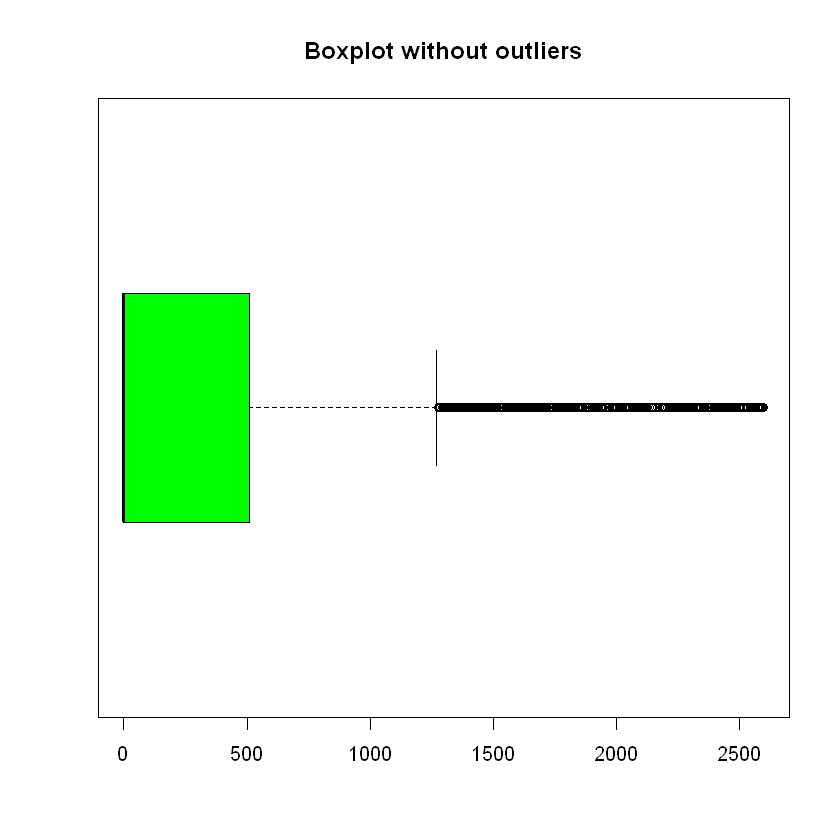


 Pre-treatment Outliers:
 68.5 57.5 69.25 97.25 81.25 67.5 63 69.75 62.75 92.5 63.5 78.5 57.25 74.75 58.25 63.25 90.25 70 64 86.5 89.25 57.5 65.5 65.5 79 64.5 73.25 64.25 59.25 71.5 104.5 63.75 138.25 61.75 79.25 90.75 100 64.25 70.75 69.75 60.25 93.5 94.5 64.5 62.75 64.75 57.25 57.5 71 88.5 65.5 61 58 92 59.5 79.5 57.5 61.5 83.75 70.5 100.25 57 61.25 188.5 75.75 80.5 58.75 64 102 84.75 59.5 79.25 85.25 58.5 64.25 65.25 64.75 66.5 61.5 61.25
 Mean without outliers:
 14.7228

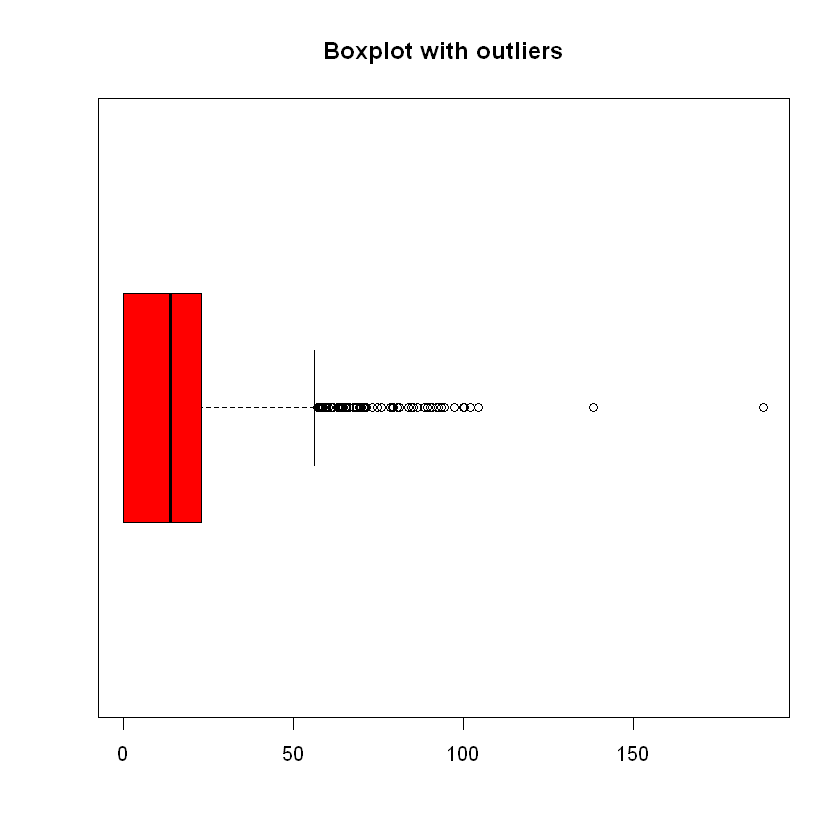


 Post-treatment Outliers:
 
 Mean with outliers:
 267.1698

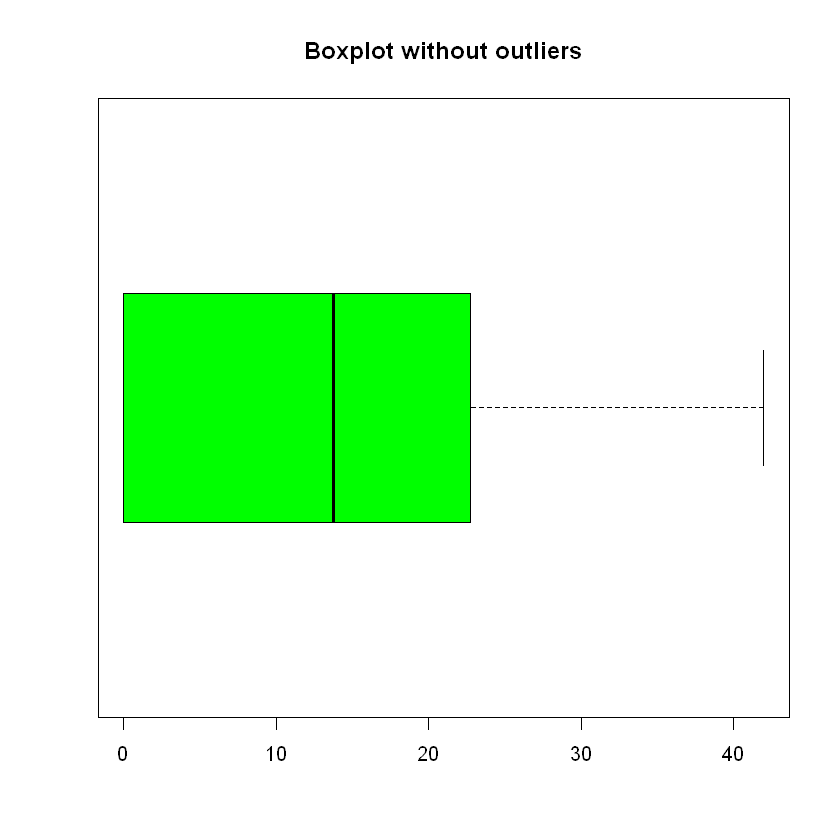


 Pre-treatment Outliers:
 
 Mean without outliers:
 266.3726

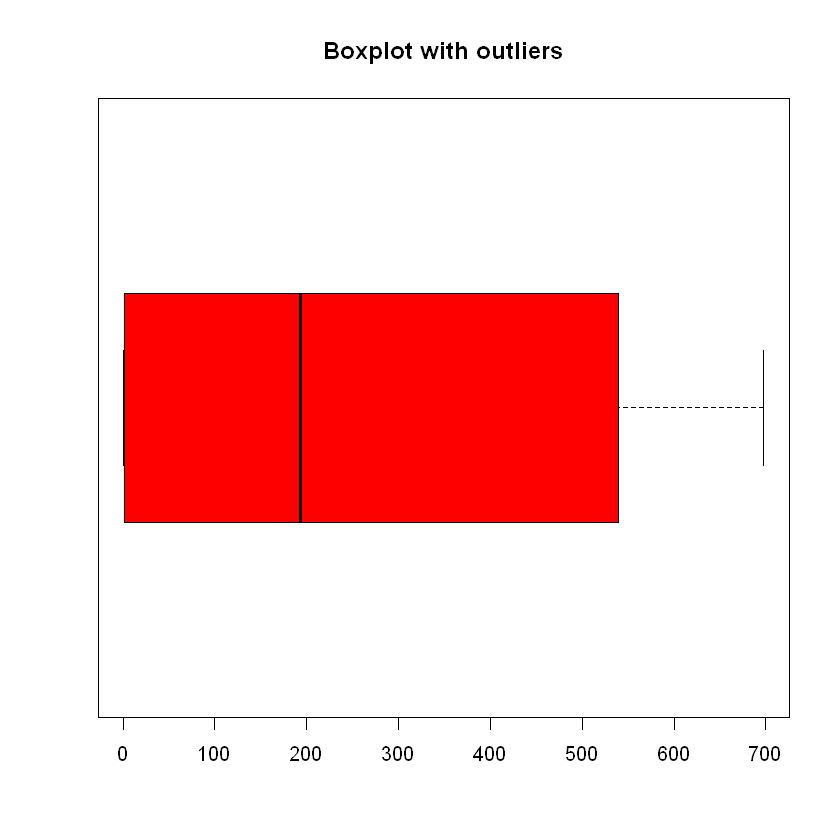


 Post-treatment Outliers:
 
 Mean with outliers:
 10.7012

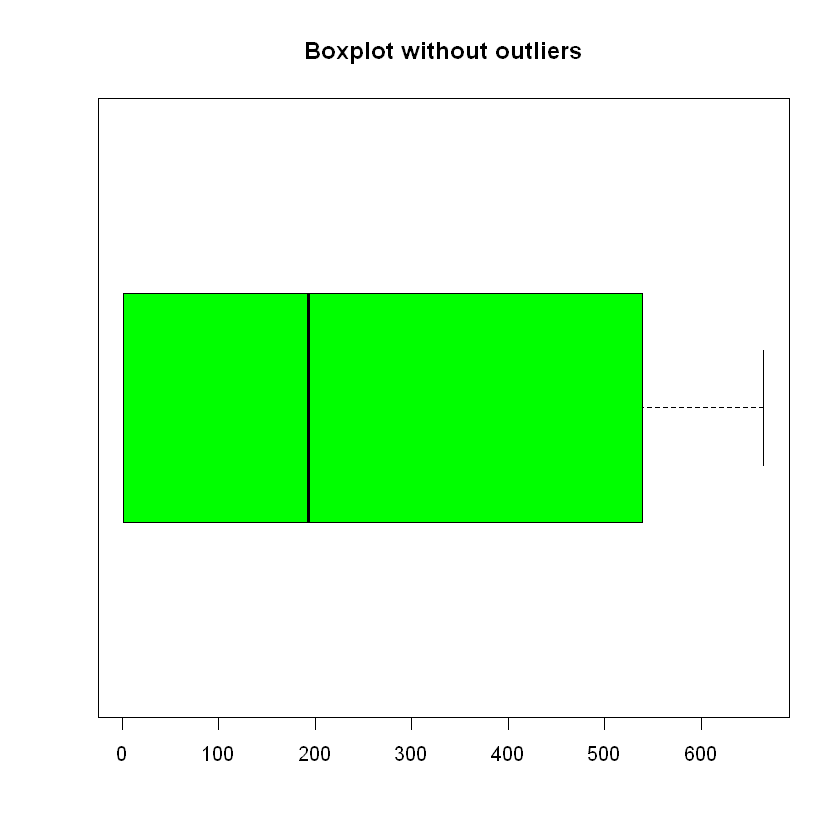


 Pre-treatment Outliers:
 53.2 55.8 61.25 62.3 57.05 60.5 84.85 74.8 68 62.35 63.3 61.95 84.5 57.7 79.65 67.7 53.25 90.1 90.35 62.35 72.45 54.9 60.5 57.4 58 101 87.85 55.65 53.9 60.35 86.3 67.7 62 100.25 79.05 57 119.1 77.4 92.1 64.8 64.15 56.15 65.45 62.35 80.8 85.4 55.45 56.25 91.15 56.65 67.05 68.6 77.45 64.95 96.3 186.25 69.45 58.2 55.45 55.55 85.05 52.8 65.9 67.8 77.25 79.3 60.25 66.5 74.85 165.15 64.95 110.35 57.6 62 60.85 62.5 57.35 70.25 57.3 61.2 74.9 60.2 57.3 81.85 105.6 53.5 53.8 52.55 53.1 54.1 54.95 130.75 64.35 76.15 53.95 68 59.45 69.2 54.85 54.7 90.6 65.15 60.9 60.4 86.45 58.8 63.35 53.05 100.3 96.25 63.4 54.1 59.05 52.6 78.25 53.55 71.2 97.65 53.75 66.5 54.65 52.85 66.85 53.5 64 70.85 54.2 63.8 69 57.25 62.6 85.95 56.5 68.25 55.2 60.7 54.2 62.8 78 96.7 53.85 76.15 58.5 56.45 82.6 57.1 62.85 60.7 93.8 73.95 73.95 70.2 52.65 104.25 53 59 98.55 59.85 52.65 64.85 64.95 63.45 61.65 70.75 56.85 52.9 88.95 57.15 65.1 73.1 53.05 54.05 91.25 68.2 53.55 57.2 53.85 56 63 52.5 1

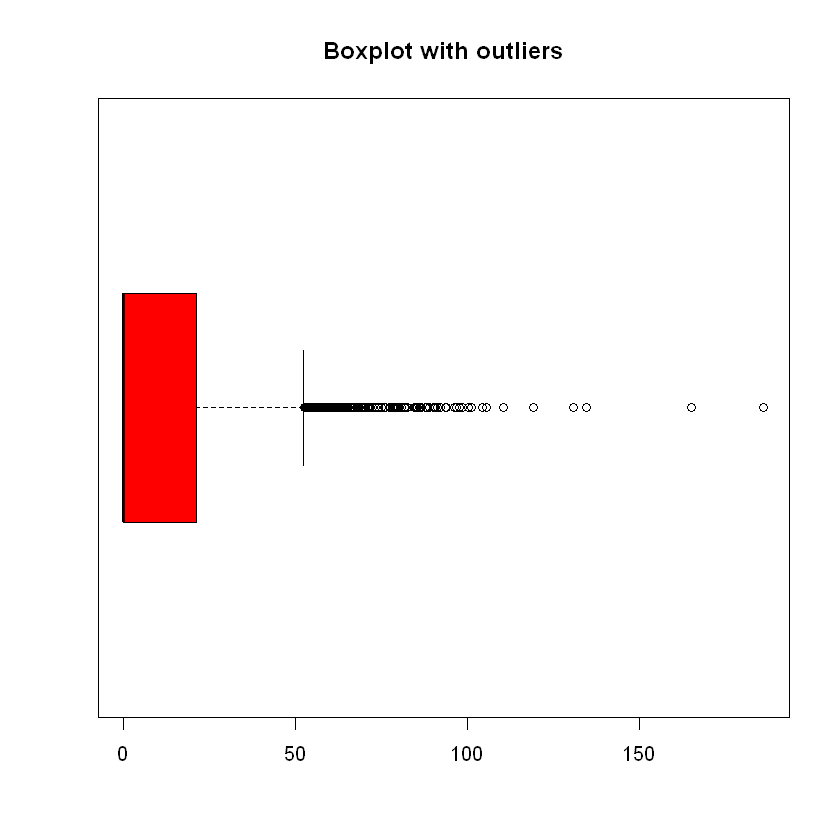


 Post-treatment Outliers:
 
 Mean with outliers:
 421.9846

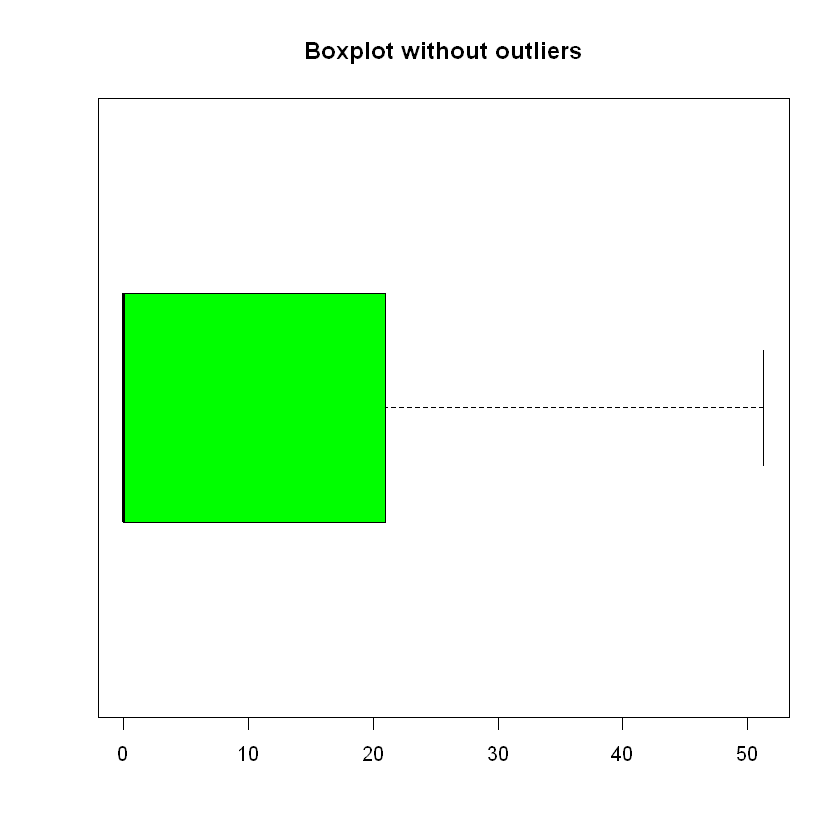


 Pre-treatment Outliers:
 1683.55 410.8 3159.25 1840.45 1199.2 3245.6 3819.5 2209.2 2475.25 1879.25 764.35 387.9 2716.6 1710.15 351.7 4054.25 2437.2 1224.05 5602.9 271.75 2032.4 4242.6 1630.1 2724 4506.6 579.95 2127.95 1199.2 908.75 926.55 2467.8 2201.3 2048.1 2182.1 2472.75 783.65 2152.3 2060.65 2705.85 3814.65 1077.4 756.55 3135.9 2862.7 453 2194.85 3594.45 478.8 5569.3 1062.75 1603.25 1702.65 1758.25 2294.85 2920.65 2103.4 2133.95 848.95 1110.3 1406.6 3458.65 1953.3 380.15 2807.25 1061.65 2336.3 2533.45 515.8 672.55 357.55 1312.6 255.15 283.5 1691.4 226.6 2355.75 742.7 439.3 468.1 564.2 2247.65 817.85 1971.85 302.2 3488.1 2635.85 2519.15 2215.4 4682.75 226.45 362.45 5516.95 1288 922.85 684.6 3100.35 3486.45 2941.15 3235.15 1379.25 316.75 1641 3062.15 2674.5 1147 711.4 1559.25 2863 1853.15 2049.85 1446.85 632.35 2647.25 1479.3 1289.55 518.95 713.3 4530.1 1457 628.15 525.65 2946.25 2954.75 1195.05 3093.05 2879.1 7217.1 2180.55 2014.75 898.6 558.8 632.2 3649.95 780.2 3222.35 4748.9 27

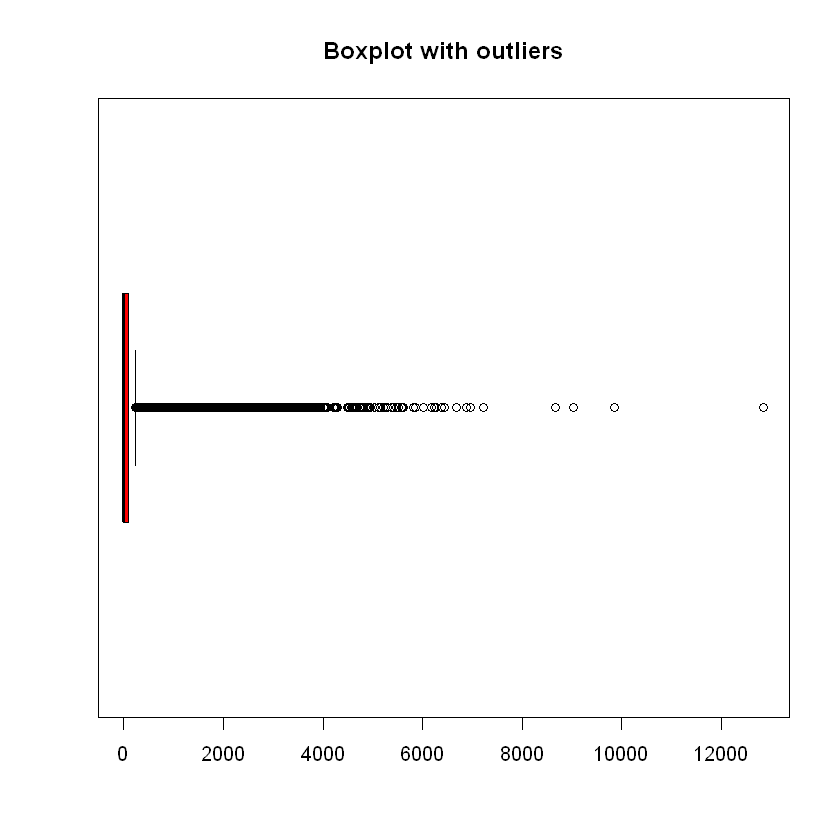


 Post-treatment Outliers:
 1683.55 410.8 2687.923 1840.45 1199.2 2687.923 2687.923 2209.2 2475.25 1879.25 764.35 387.9 2687.923 1710.15 351.7 2687.923 2437.2 1224.05 2687.923 271.75 2032.4 2687.923 1630.1 2687.923 2687.923 579.95 2127.95 1199.2 908.75 926.55 2467.8 2201.3 2048.1 2182.1 2472.75 783.65 2152.3 2060.65 2687.923 2687.923 1077.4 756.55 2687.923 2687.923 453 2194.85 2687.923 478.8 2687.923 1062.75 1603.25 1702.65 1758.25 2294.85 2687.923 2103.4 2133.95 848.95 1110.3 1406.6 2687.923 1953.3 380.15 2687.923 1061.65 2336.3 2533.45 515.8 672.55 357.55 1312.6 255.15 283.5 1691.4 226.6 2355.75 742.7 439.3 468.1 564.2 2247.65 817.85 1971.85 302.2 2687.923 2635.85 2519.15 2215.4 2687.923 226.45 362.45 2687.923 1288 922.85 684.6 2687.923 2687.923 2687.923 2687.923 1379.25 316.75 1641 2687.923 2674.5 1147 711.4 1559.25 2687.923 1853.15 2049.85 1446.85 632.35 2647.25 1479.3 1289.55 518.95 713.3 2687.923 1457 628.15 525.65 2687.923 2687.923 1195.05 2687.923 2687.923 2687.923 2180.55 2014

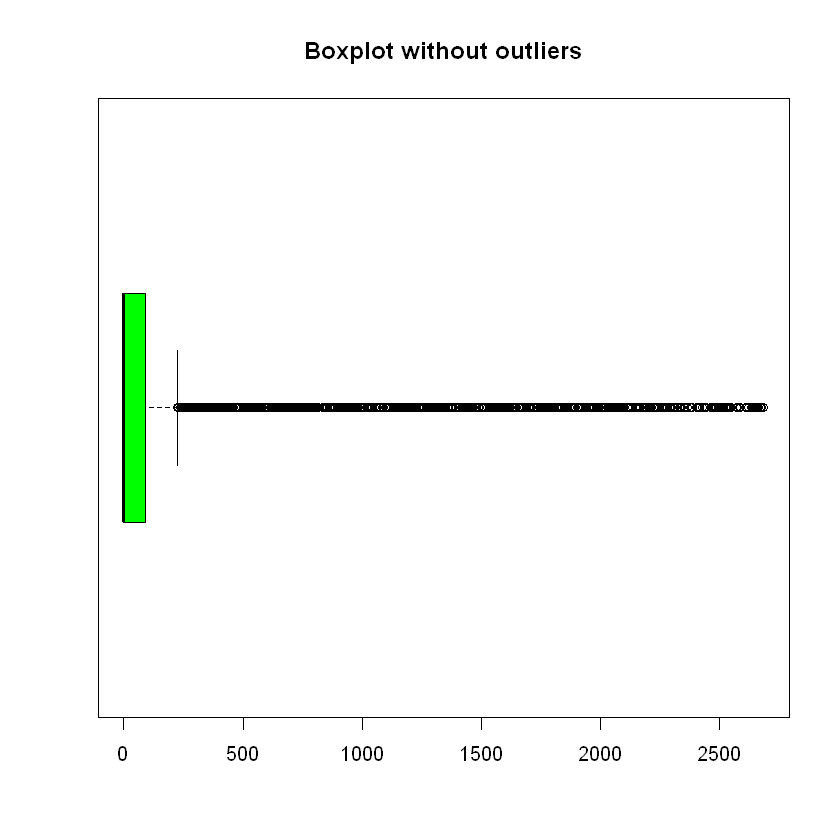


 Pre-treatment Outliers:
 33 33 0 0 0 7 35 0 0 0 33 0 0 0 0 0 34 0 0 34 0 0 36 33 0 0 34 0 0 0 0 0 34 0 0 0 0 0 0 0 0 0 0 0 36 0 0 0 0 0 34 34 0 35 0 0 34 33 0 0 35 0 0 0 0 0 0 0 33 0 36 33 34 0 7 0 0 7 0 34 33 0 35 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 35 35 0 0 0 0 0 0 0 0 0
 Mean without outliers:
 19.8022

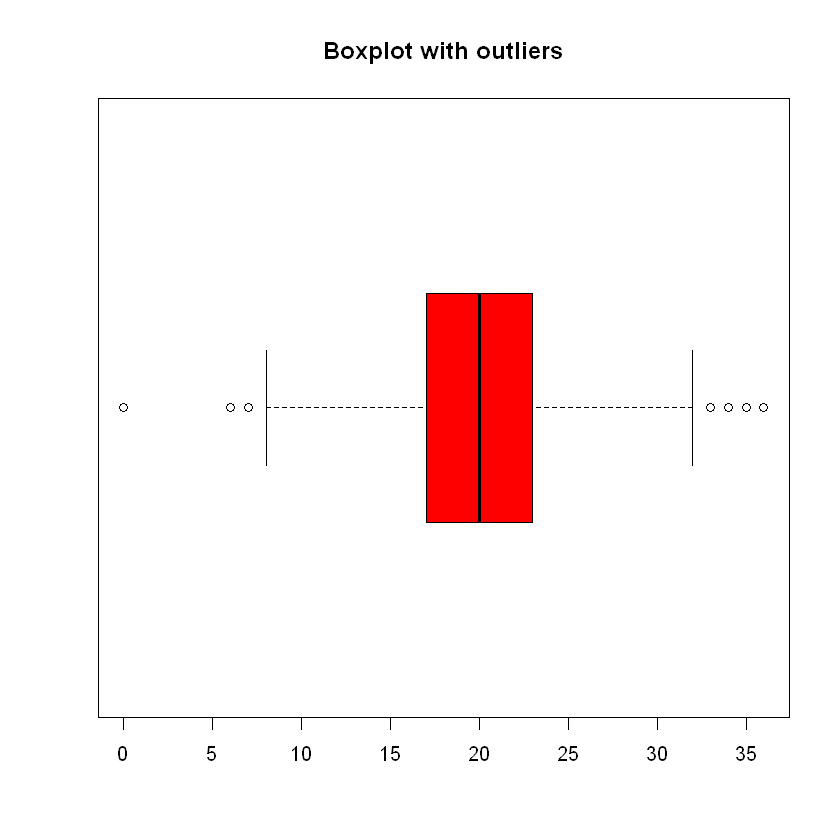


 Post-treatment Outliers:
 
 Mean with outliers:
 6.0012

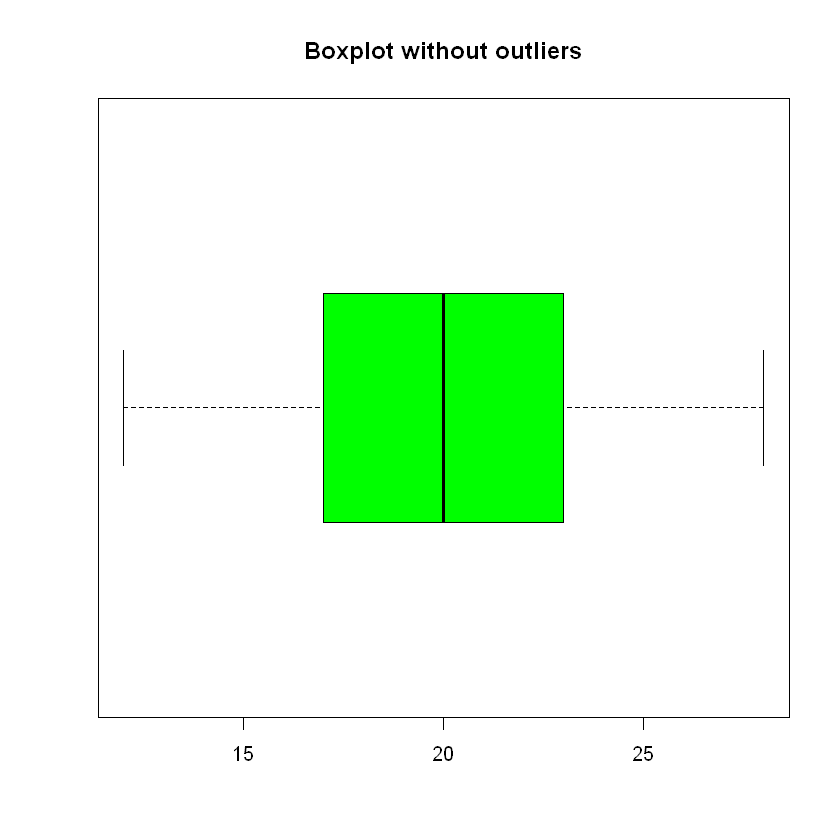


 Pre-treatment Outliers:
 4.350794 2.093098 4.377642 2.157559 3.949319 3.318902 7.793595 4.003143 7.835053 4.318687 3.882388 4.184338 4.350407 7.653865 4.387884 7.83501 4.288677 4.17531 7.677688 4.053696 2.674838 4.347953 3.986017 3.967079 3.602232 3.108168 4.023028 8.187511 4.318687 7.669873 4.166665 4.382402 7.871033 7.805226 3.918999 8.298915 4.122608 3.743841 4.246493 2.713369 4.010782 3.889982 2.125848 4.032469 4.169916 7.786057 3.391147 4.059753 4.111693 3.158701 4.018003 4.087823 8.075664 3.285038 7.703473 4.309725 8.427815 4.412435 3.261169 7.756743 3.493473 4.283862 7.662388 4.318155 4.301494 3.402863 3.915417 3.601141 3.675541 7.645436 8.493116 4.362461 3.964046 2.761907 4.063885 7.83899 3.032064 3.922765 3.837299 4.103469 4.016203 4.248352 7.696885 7.661518 4.1425 4.282206 3.049273 3.437529 7.664633 3.061988 4.356709 3.58657 4.328626 2.674149 4.208714 3.59786 3.796163 4.156537 3.837515 7.718974 4.355041 3.93261 4.384898 4.156223 3.937496 4.393708 2.969388 3.851211 4.065945 

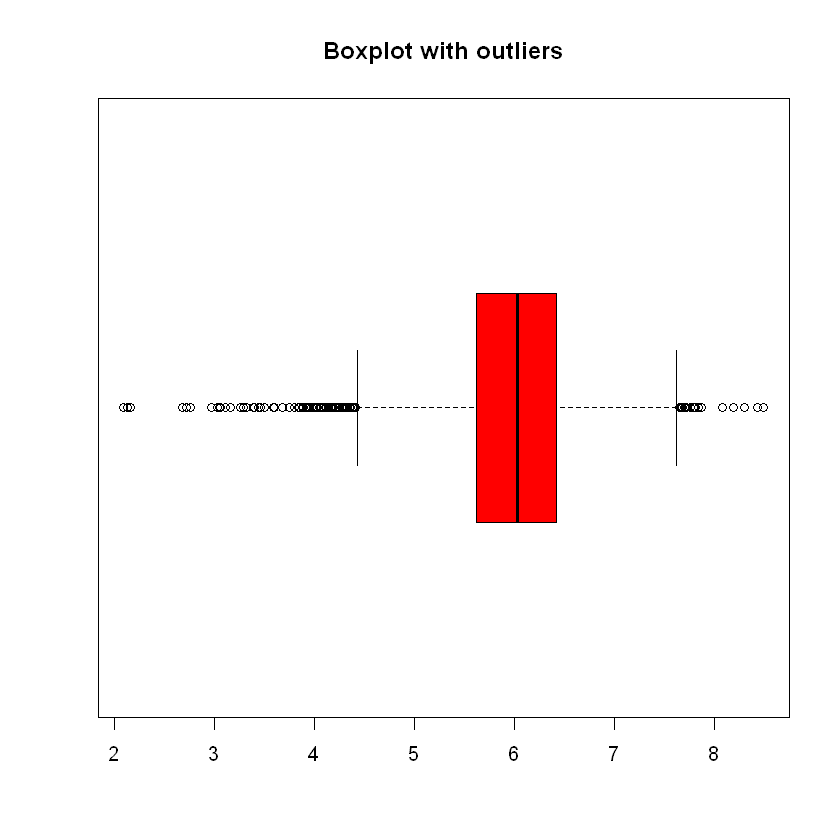


 Post-treatment Outliers:
 

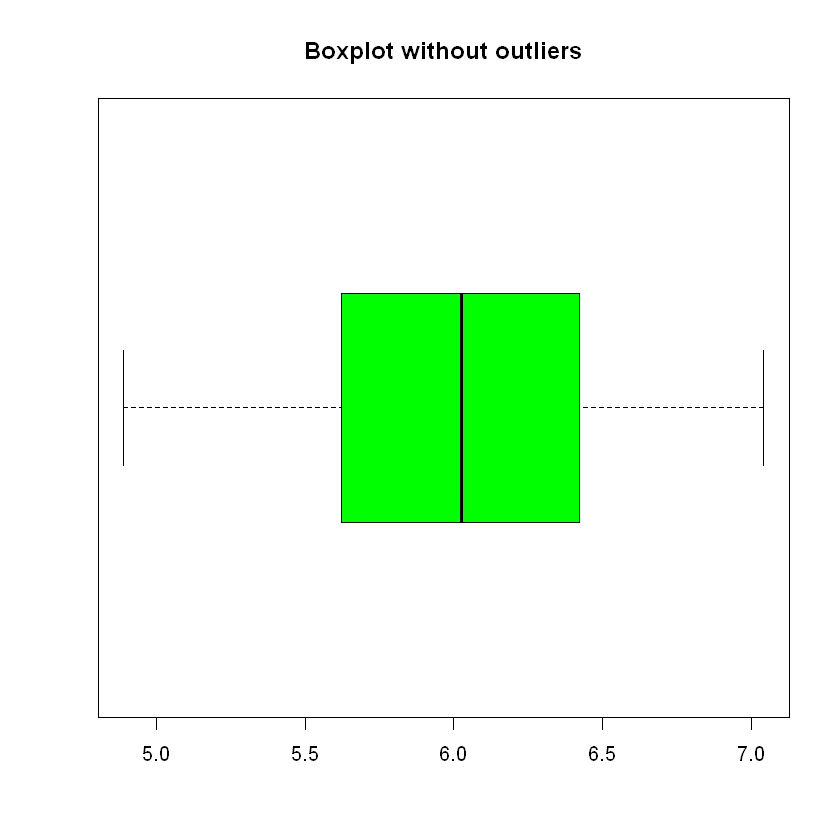

In [27]:
## Find and Apply outlier treatment to all Numeric variables
cc_num <- data.frame(lapply(cc_num,HandleOutlier))


In [28]:
head(cc_num,5)

age,ed,employ,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,...,tollmon,tollten,equipmon,equipten,cardmon,cardten,wiremon,wireten,hourstv,ln_Total_spend
20,15,0,31,3.43,11.1,1.20,377,2.24,320,...,29.0,161.05,29.5000,126.1,14.25,595,0.00,0.00,13,5.007029
22,17,0,15,2.71,18.6,1.22,379,1.57,284,...,0.0,0.00,49.0525,1975.0,16.00,600,45.65,1683.55,18,4.891146
67,14,16,35,3.56,9.9,0.93,16,2.54,332,...,0.0,0.00,0.0000,0.0,23.00,103,0.00,0.00,21,5.886021
23,16,0,20,3.00,5.7,0.10,331,1.12,250,...,0.0,0.00,0.0000,0.0,21.00,621,0.00,0.00,26,5.884464
26,16,1,23,3.14,1.9,0.21,154,0.29,169,...,16.5,387.70,0.0000,0.0,17.25,478,19.05,410.80,27,6.230147


### Combine the Numeric and Categorical datasets into one

In [29]:
# List of categorical and numeric variables
num_var <- names(cc_num)
cat_var <- names(cc_cat)

cc<-cbind.data.frame(cc_num,cc_cat)
str(cc)

'data.frame':	5000 obs. of  119 variables:
 $ age              : num  20 22 67 23 26 64 52 44 66 47 ...
 $ ed               : num  15 17 14 16 16 17 14 16 12 11 ...
 $ employ           : num  0 0 16 0 1 22 10 11 15 19 ...
 $ income           : num  31 15 35 20 23 107 77 97 16 84 ...
 $ lninc            : num  3.43 2.71 3.56 3 3.14 4.67 4.34 4.57 2.77 4.43 ...
 $ debtinc          : num  11.1 18.6 9.9 5.7 1.9 5.6 1.9 14.4 2.6 4.1 ...
 $ creddebt         : num  1.2 1.22 0.93 0.1 0.21 1.06 0.5 5.95 0.1 1.77 ...
 $ lncreddebt       : num  377 379 16 331 154 365 69 537 228 416 ...
 $ othdebt          : num  2.24 1.57 2.54 1.12 0.29 4.93 0.96 8.02 0.31 1.67 ...
 $ lnothdebt        : num  320 284 332 250 169 399 19 447 116 291 ...
 $ spoused          : num  -1 -1 13 18 13 -1 -1 15 -1 -1 ...
 $ reside           : num  3 2 3 5 4 1 1 2 1 2 ...
 $ pets             : num  0 6 3 0 0 10 2 10 1 1 ...
 $ pets_cats        : num  0 0 2 0 0 1 0 0 1 1 ...
 $ pets_dogs        : num  0 0 1 0 0 1 2 2 0 0 ...


In [30]:
NCOL(cc_num)
NCOL(cc_cat)
names(cc)

[1] 37

[1] 82

[1] "age"               "ed"                "employ"           
  [4] "income"            "lninc"             "debtinc"          
  [7] "creddebt"          "lncreddebt"        "othdebt"          
 [10] "lnothdebt"         "spoused"           "reside"           
 [13] "pets"              "pets_cats"         "pets_dogs"        
 [16] "pets_birds"        "pets_reptiles"     "pets_small"       
 [19] "pets_saltfish"     "pets_freshfish"    "carvalue"         
 [22] "commutetime"       "tenure"            "longmon"          
 [25] "lnlongmon"         "longten"           "lnlongten"        
 [28] "tollmon"           "tollten"           "equipmon"         
 [31] "equipten"          "cardmon"           "cardten"          
 [34] "wiremon"           "wireten"           "hourstv"          
 [37] "ln_Total_spend"    "region"            "townsize"         
 [40] "gender"            "agecat"            "edcat"            
 [43] "jobcat"            "union"             "empcat"           
 [46] "retire"            "inccat"            "default"          
 [49] "jobsat"            "marital"           "spousedcat"       
 [52] "homeown"           "hometype"          "address"          
 [55] "addresscat"        "cars"              "carown"           
 [58] "cartype"           "carcatvalue"       "carbought"        
 [61] "carbuy"            "commute"           "commutecat"       
 [64] "commutecar"        "commutemotorcycle" "commutecarpool"   
 [67] "commutebus"        "commuterail"       "commutepublic"    
 [70] "commutebike"       "commutewalk"       "commutenonmotor"  
 [73] "telecommute"       "reason"            "polview"          
 [76] "polparty"          "polcontrib"        "vote"             
 [79] "card"              "cardtype"          "cardbenefit"      
 [82] "cardfee"           "cardtenure"        "cardtenurecat"    
 [85] "card2"             "card2type"         "card2benefit"     
 [88] "card2fee"          "card2tenure"       "card2tenurecat"   
 [91] "active"            "bfast"             "churn"            
 [94] "tollfree"          "equip"             "callcard"         
 [97] "wireless"          "multline"          "voice"            
[100] "pager"             "internet"          "callid"           
[103] "callwait"          "forward"           "confer"           
[106] "ebill"             "owntv"             "ownvcr"           
[109] "owndvd"            "owncd"             "ownpda"           
[112] "ownpc"             "ownipod"           "owngame"          
[115] "ownfax"            "news"              "response_01"      
[118] "response_02"       "response_03"

### Categorical Variable Reduction using One-Way ANOVA
    The one-way analysis of variance (ANOVA), also known as one-factor ANOVA, is an extension of independent two-samples t-test for comparing means in a situation where there are more than two groups. One-Way ANOVA (Analysis Of Variance), is a statistical test which tests the relationship between a numeric variable and a categorical variable.In one-way ANOVA, the data is organized into several groups base on one single grouping variable (also called factor variable). This tutorial describes the basic principle of the one-way ANOVA test and provides practical anova test examples in R software.


#### Hypothesis

    Null hypothesis: the means of the different groups are the same

    Alternative hypothesis: At least one sample mean is not equal to the others.


In [31]:
names(cc_cat)

[1] "region"            "townsize"          "gender"           
 [4] "agecat"            "edcat"             "jobcat"           
 [7] "union"             "empcat"            "retire"           
[10] "inccat"            "default"           "jobsat"           
[13] "marital"           "spousedcat"        "homeown"          
[16] "hometype"          "address"           "addresscat"       
[19] "cars"              "carown"            "cartype"          
[22] "carcatvalue"       "carbought"         "carbuy"           
[25] "commute"           "commutecat"        "commutecar"       
[28] "commutemotorcycle" "commutecarpool"    "commutebus"       
[31] "commuterail"       "commutepublic"     "commutebike"      
[34] "commutewalk"       "commutenonmotor"   "telecommute"      
[37] "reason"            "polview"           "polparty"         
[40] "polcontrib"        "vote"              "card"             
[43] "cardtype"          "cardbenefit"       "cardfee"          
[46] "cardtenure"        "cardtenurecat"     "card2"            
[49] "card2type"         "card2benefit"      "card2fee"         
[52] "card2tenure"       "card2tenurecat"    "active"           
[55] "bfast"             "churn"             "tollfree"         
[58] "equip"             "callcard"          "wireless"         
[61] "multline"          "voice"             "pager"            
[64] "internet"          "callid"            "callwait"         
[67] "forward"           "confer"            "ebill"            
[70] "owntv"             "ownvcr"            "owndvd"           
[73] "owncd"             "ownpda"            "ownpc"            
[76] "ownipod"           "owngame"           "ownfax"           
[79] "news"              "response_01"       "response_02"      
[82] "response_03"

In [32]:
# Performing the One-Way ANOVA and selecting categorical variables with p value < 0.05 (5%)
# Here variables provide are only the Categorical ones from cc

full.model <- aov(ln_Total_spend ~ region+townsize+gender+agecat+edcat+jobcat+union+empcat+retire+inccat+default+jobsat+marital+spousedcat+homeown+hometype+address+addresscat+cars+carown+cartype+carcatvalue+carbought+carbuy+commute+commutecat+commutecar+commutemotorcycle+commutecarpool+commutebus+commuterail+commutepublic+commutebike+commutewalk+commutenonmotor+telecommute+reason+polview+polparty+polcontrib+vote+card+cardtype+cardbenefit+cardfee+cardtenure+cardtenurecat+card2+card2type+card2benefit+card2fee+card2tenure+card2tenurecat+active+bfast+churn+tollfree+equip+callcard+wireless+multline+voice+pager+internet+callid+callwait+forward+confer+ebill+owntv+ownvcr+owndvd+owncd+ownpda+ownpc+ownipod+owngame+ownfax+news+response_01+response_02+response_03, data = cc) 
summary(full.model)

                    Df Sum Sq Mean Sq F value   Pr(>F)    
region               4    3.0    0.75   3.337  0.00976 ** 
townsize             5    1.0    0.20   0.891  0.48599    
gender               1    9.6    9.64  43.169 5.56e-11 ***
agecat               4   48.6   12.16  54.447  < 2e-16 ***
edcat                4   10.9    2.73  12.226 6.87e-10 ***
jobcat               5   12.8    2.56  11.476 4.93e-11 ***
union                1    0.7    0.72   3.234  0.07218 .  
empcat               4   17.2    4.29  19.223 1.06e-15 ***
retire               1   65.1   65.14 291.763  < 2e-16 ***
inccat               4   98.9   24.72 110.721  < 2e-16 ***
default              1    0.3    0.29   1.304  0.25348    
jobsat               4    1.6    0.39   1.737  0.13894    
marital              1    0.3    0.35   1.561  0.21156    
spousedcat           4    0.7    0.16   0.733  0.56937    
homeown              1    0.1    0.08   0.341  0.55908    
hometype             3    0.6    0.20   0.888  0.44628  

In [33]:
# From the full categorical list we select only those columns that are statistically significant or with p value < 0.05 (5%)

full.model <- aov(ln_Total_spend ~ region+gender+agecat+edcat+jobcat+empcat+retire+inccat+carown+reason+card+card2+internet+ownvcr+owndvd, data = cc) 
summary(full.model)

              Df Sum Sq Mean Sq F value   Pr(>F)    
region         4    3.0    0.75   3.345  0.00962 ** 
gender         1    9.8    9.75  43.794 4.03e-11 ***
agecat         4   48.7   12.19  54.710  < 2e-16 ***
edcat          4   10.9    2.73  12.235 6.72e-10 ***
jobcat         5   12.8    2.57  11.529 4.33e-11 ***
empcat         4   17.2    4.30  19.309 8.90e-16 ***
retire         1   64.9   64.86 291.207  < 2e-16 ***
inccat         4   99.4   24.84 111.536  < 2e-16 ***
carown         2    1.6    0.82   3.677  0.02536 *  
reason         4   44.3   11.07  49.690  < 2e-16 ***
card           4  159.8   39.95 179.360  < 2e-16 ***
card2          4   83.4   20.86  93.657  < 2e-16 ***
internet       4    1.6    0.40   1.816  0.12276    
ownvcr         1    1.7    1.73   7.753  0.00538 ** 
owndvd         1    1.1    1.13   5.084  0.02419 *  
Residuals   4952 1103.0    0.22                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

#### Drop all other categorical columns except the ones selected by the model

In [34]:
cc_cat <- subset(cc_cat,select = c(region, gender, edcat, retire, inccat, carown, reason, card, card2, internet, ownvcr, owndvd))

####  Combine all numerical variables and categorical into 1 dataset

In [35]:
# List of categorical and numeric variables
num_var <- names(cc_num)
cat_var <- names(cc_cat)

cc<-cbind.data.frame(cc_num,cc_cat)
str(cc)

'data.frame':	5000 obs. of  49 variables:
 $ age           : num  20 22 67 23 26 64 52 44 66 47 ...
 $ ed            : num  15 17 14 16 16 17 14 16 12 11 ...
 $ employ        : num  0 0 16 0 1 22 10 11 15 19 ...
 $ income        : num  31 15 35 20 23 107 77 97 16 84 ...
 $ lninc         : num  3.43 2.71 3.56 3 3.14 4.67 4.34 4.57 2.77 4.43 ...
 $ debtinc       : num  11.1 18.6 9.9 5.7 1.9 5.6 1.9 14.4 2.6 4.1 ...
 $ creddebt      : num  1.2 1.22 0.93 0.1 0.21 1.06 0.5 5.95 0.1 1.77 ...
 $ lncreddebt    : num  377 379 16 331 154 365 69 537 228 416 ...
 $ othdebt       : num  2.24 1.57 2.54 1.12 0.29 4.93 0.96 8.02 0.31 1.67 ...
 $ lnothdebt     : num  320 284 332 250 169 399 19 447 116 291 ...
 $ spoused       : num  -1 -1 13 18 13 -1 -1 15 -1 -1 ...
 $ reside        : num  3 2 3 5 4 1 1 2 1 2 ...
 $ pets          : num  0 6 3 0 0 10 2 10 1 1 ...
 $ pets_cats     : num  0 0 2 0 0 1 0 0 1 1 ...
 $ pets_dogs     : num  0 0 1 0 0 1 2 2 0 0 ...
 $ pets_birds    : num  0 0 0 0 0 0 0 0 0 0 ..

In [36]:
# From the full categorical list we select only those columns that are statistically significant or with p value < 0.05 (5%)

full.model <- lm(ln_Total_spend ~ ., data = cc) 
summary(full.model)


Call:
lm(formula = ln_Total_spend ~ ., data = cc)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4837 -0.3267  0.0200  0.3386  1.3932 

Coefficients: (2 not defined because of singularities)
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     5.310e+00  2.327e-01  22.818  < 2e-16 ***
age            -1.381e-03  6.704e-04  -2.059 0.039524 *  
ed              1.067e-02  9.200e-03   1.160 0.246259    
employ         -2.008e-04  1.336e-03  -0.150 0.880522    
income         -1.695e-03  1.745e-03  -0.971 0.331570    
lninc           3.846e-01  7.764e-02   4.953 7.53e-07 ***
debtinc        -5.093e-03  2.485e-03  -2.050 0.040437 *  
creddebt        2.369e-02  8.036e-03   2.948 0.003215 ** 
lncreddebt     -1.229e-04  5.681e-05  -2.163 0.030609 *  
othdebt         7.175e-03  4.999e-03   1.435 0.151274    
lnothdebt       1.435e-04  9.110e-05   1.575 0.115315    
spoused         5.733e-05  1.201e-03   0.048 0.961923    
reside          4.387e-04  7.379e-03   0.059 

### Stepwise AIC Regression

In [37]:
step.model <- stepAIC(full.model,direction = "both")
summary(step.model)
step.model$anova

Start:  AIC=-7518.96
ln_Total_spend ~ age + ed + employ + income + lninc + debtinc + 
    creddebt + lncreddebt + othdebt + lnothdebt + spoused + reside + 
    pets + pets_cats + pets_dogs + pets_birds + pets_reptiles + 
    pets_small + pets_saltfish + pets_freshfish + carvalue + 
    commutetime + tenure + longmon + lnlongmon + longten + lnlongten + 
    tollmon + tollten + equipmon + equipten + cardmon + cardten + 
    wiremon + wireten + hourstv + region + gender + edcat + retire + 
    inccat + carown + reason + card + card2 + internet + ownvcr + 
    owndvd


Step:  AIC=-7518.96
ln_Total_spend ~ age + ed + employ + income + lninc + debtinc + 
    creddebt + lncreddebt + othdebt + lnothdebt + spoused + reside + 
    pets + pets_cats + pets_dogs + pets_birds + pets_reptiles + 
    pets_small + pets_freshfish + carvalue + commutetime + tenure + 
    longmon + lnlongmon + longten + lnlongten + tollmon + tollten + 
    equipmon + equipten + cardmon + cardten + wiremon + wireten + 
   


Call:
lm(formula = ln_Total_spend ~ age + ed + lninc + debtinc + creddebt + 
    lncreddebt + lnothdebt + longmon + cardmon + wiremon + wireten + 
    hourstv + region + gender + reason + card + card2 + internet, 
    data = cc)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.46848 -0.32654  0.01569  0.34311  1.42658 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.723e+00  8.548e-02  66.951  < 2e-16 ***
age         -1.903e-03  4.489e-04  -4.238  2.3e-05 ***
ed          -7.384e-03  2.587e-03  -2.855 0.004324 ** 
lninc        2.865e-01  1.889e-02  15.165  < 2e-16 ***
debtinc     -3.254e-03  2.055e-03  -1.583 0.113489    
creddebt     2.228e-02  7.692e-03   2.897 0.003788 ** 
lncreddebt  -1.235e-04  5.623e-05  -2.196 0.028150 *  
lnothdebt    1.851e-04  8.761e-05   2.113 0.034660 *  
longmon      1.393e-03  9.229e-04   1.509 0.131384    
cardmon     -9.339e-04  6.096e-04  -1.532 0.125573    
wiremon     -1.548e-03  9.228e-04  -1.678 0.09

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,4931,1081.172,-7518.962
- pets_saltfish,0,0.000000e+00,4931,1081.172,-7518.962
- pets_reptiles,0,0.000000e+00,4931,1081.172,-7518.962
- inccat,4,9.060268e-01,4935,1082.078,-7522.774
- carown,2,2.100789e-01,4937,1082.288,-7525.803
- tenure,1,6.284283e-06,4938,1082.288,-7527.803
- spoused,1,2.466425e-04,4939,1082.288,-7529.802
- income,1,3.971255e-04,4940,1082.289,-7531.800
- employ,1,4.446993e-04,4941,1082.289,-7533.798
- reside,1,7.375359e-03,4942,1082.296,-7535.764


In [38]:
#The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data
#From the Stepwise regression, we get the model with least AIC.

# Step:  AIC=-7031.72
# ln_Total_spend ~ age + lninc + creddebt + lncreddebt + carvalue + longmon + cardmon + region + gender + edcat + reason + card + card2 + internet

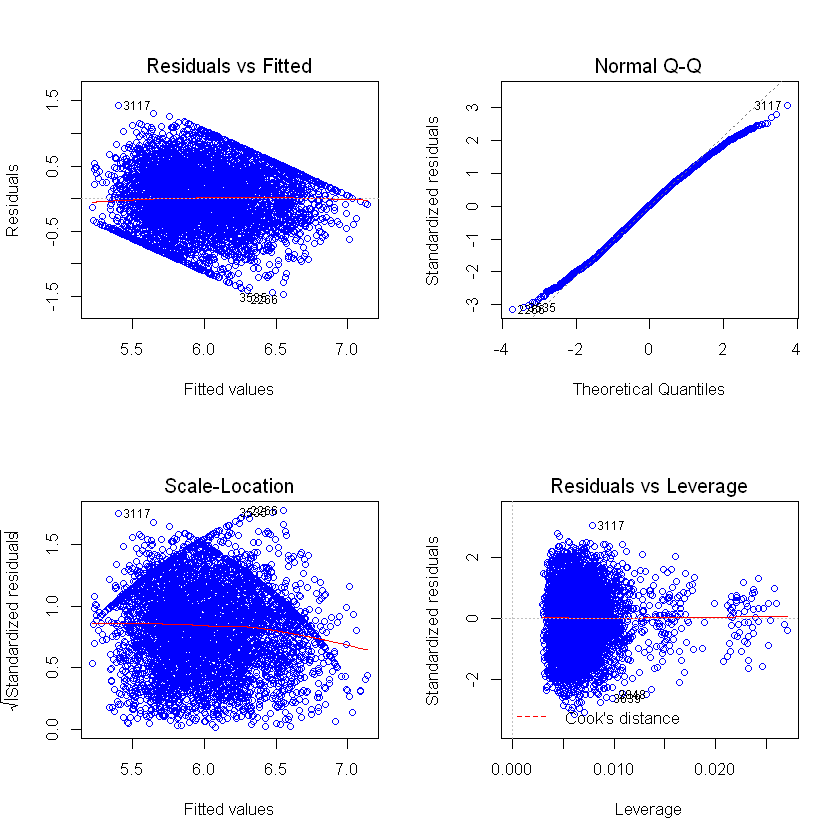

In [39]:
par(mfrow=c(2,2))
plot(step.model,col="blue")

#### These are the significant variables we got after performing ANOVA test and Stepwise Regression.
#### The selected model has the below given features in it.

In [40]:
step.model


Call:
lm(formula = ln_Total_spend ~ age + ed + lninc + debtinc + creddebt + 
    lncreddebt + lnothdebt + longmon + cardmon + wiremon + wireten + 
    hourstv + region + gender + reason + card + card2 + internet, 
    data = cc)

Coefficients:
(Intercept)          age           ed        lninc      debtinc     creddebt  
  5.723e+00   -1.903e-03   -7.384e-03    2.865e-01   -3.254e-03    2.228e-02  
 lncreddebt    lnothdebt      longmon      cardmon      wiremon      wireten  
 -1.235e-04    1.851e-04    1.393e-03   -9.339e-04   -1.548e-03    3.234e-05  
    hourstv      region2      region3      region4      region5      gender1  
  2.514e-03    2.205e-02   -6.138e-03    2.329e-02    4.989e-02   -4.539e-02  
    reason2      reason3      reason4      reason9        card2        card3  
  3.220e-01    1.053e-02   -4.324e-02    9.565e-02   -5.202e-01   -5.370e-01  
      card4        card5       card22       card23       card24       card25  
 -6.155e-01   -4.405e-01   -3.651e-01   -3.5

#### Drop all other columns except the ones selected by the model
#### Also select the predicted column - ln_Total_spend

In [41]:
cc <- subset(cc,select = c(ln_Total_spend, age , lninc , creddebt , lncreddebt , carvalue , longmon , cardmon , region , gender , edcat , reason , card , card2 , internet))

In [42]:
head(cc,5)
str(cc)

ln_Total_spend,age,lninc,creddebt,lncreddebt,carvalue,longmon,cardmon,region,gender,edcat,reason,card,card2,internet
5.007029,20,3.43,1.20,377,14.3,6.50,14.25,1,1,3,9,3,5,0
4.891146,22,2.71,1.22,379,6.8,8.90,16.00,5,0,4,9,2,4,4
5.886021,67,3.56,0.93,16,18.8,28.40,23.00,3,1,2,2,2,4,0
5.884464,23,3.00,0.10,331,8.7,6.00,21.00,4,0,3,9,2,3,2
6.230147,26,3.14,0.21,154,10.6,3.05,17.25,2,0,3,9,4,1,3


'data.frame':	5000 obs. of  15 variables:
 $ ln_Total_spend: num  5.01 4.89 5.89 5.88 6.23 ...
 $ age           : num  20 22 67 23 26 64 52 44 66 47 ...
 $ lninc         : num  3.43 2.71 3.56 3 3.14 4.67 4.34 4.57 2.77 4.43 ...
 $ creddebt      : num  1.2 1.22 0.93 0.1 0.21 1.06 0.5 5.95 0.1 1.77 ...
 $ lncreddebt    : num  377 379 16 331 154 365 69 537 228 416 ...
 $ carvalue      : num  14.3 6.8 18.8 8.7 10.6 -1 25.6 55.5 8.6 41 ...
 $ longmon       : num  6.5 8.9 28.4 6 3.05 ...
 $ cardmon       : num  14.2 16 23 21 17.2 ...
 $ region        : Factor w/ 5 levels "1","2","3","4",..: 1 5 3 4 2 4 2 3 2 2 ...
 $ gender        : Factor w/ 2 levels "0","1": 2 1 2 1 1 1 2 2 2 1 ...
 $ edcat         : Factor w/ 5 levels "1","2","3","4",..: 3 4 2 3 3 4 2 3 2 1 ...
 $ reason        : Factor w/ 5 levels "1","2","3","4",..: 5 5 2 5 5 5 5 2 5 5 ...
 $ card          : Factor w/ 5 levels "1","2","3","4",..: 3 2 2 2 4 2 5 1 3 5 ...
 $ card2         : Factor w/ 5 levels "1","2","3","4",..: 5 4 4 3 1

### Data Visualisation

    Relation between "ln_Total_spend" and the numeric variables

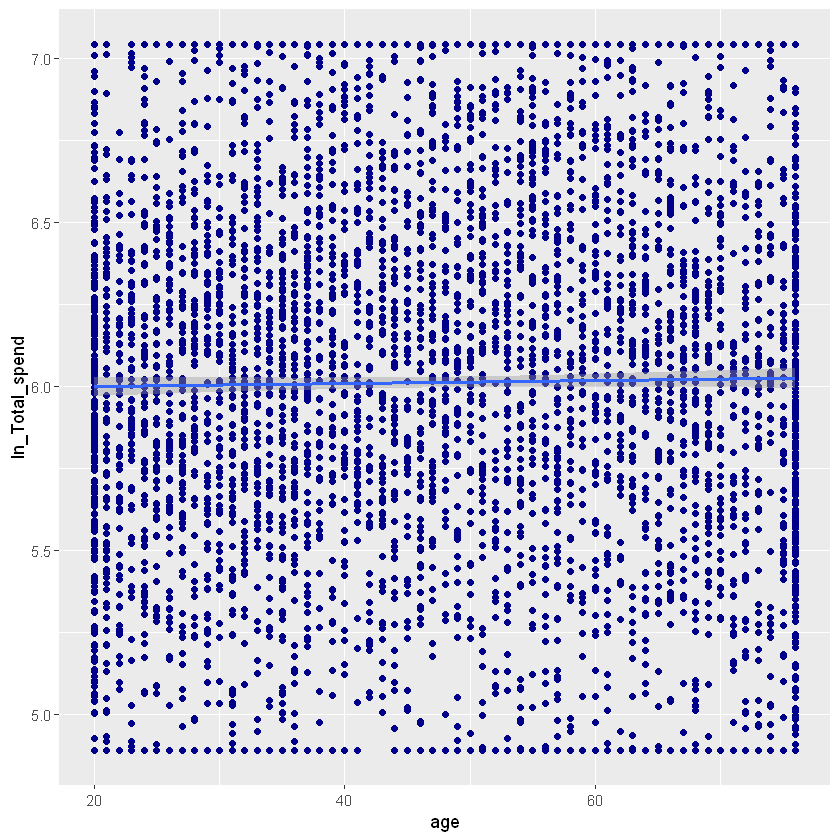

In [43]:
ggplot(cc, aes(x=age, y=ln_Total_spend)) + geom_point(col="darkblue") + geom_smooth(method=lm)

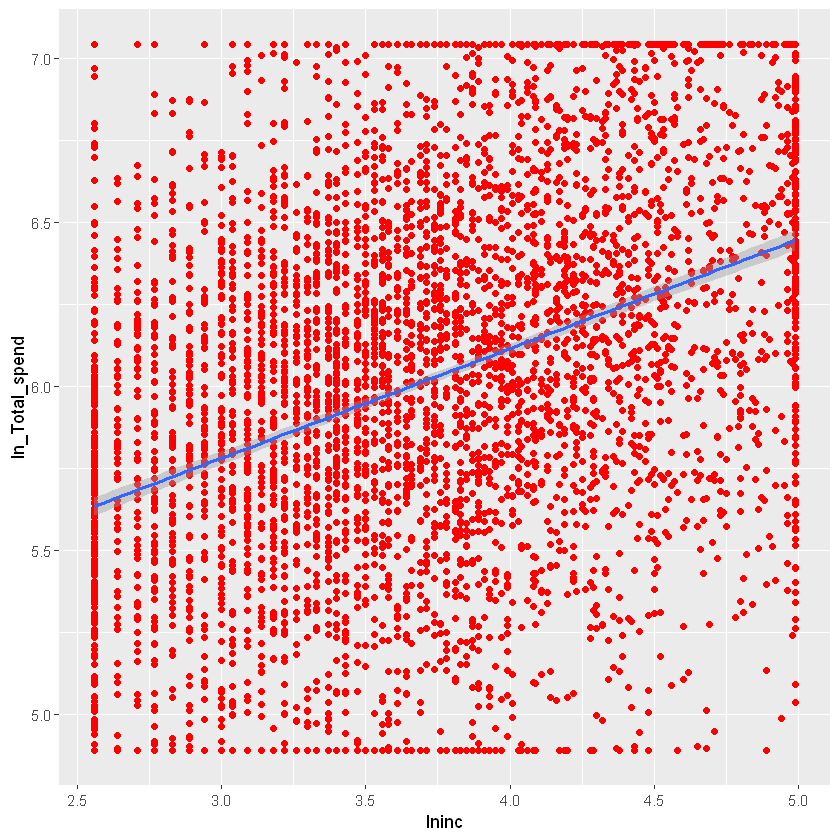

In [44]:
ggplot(cc, aes(x=lninc, y=ln_Total_spend)) + geom_point(col="red") + geom_smooth(method=lm)

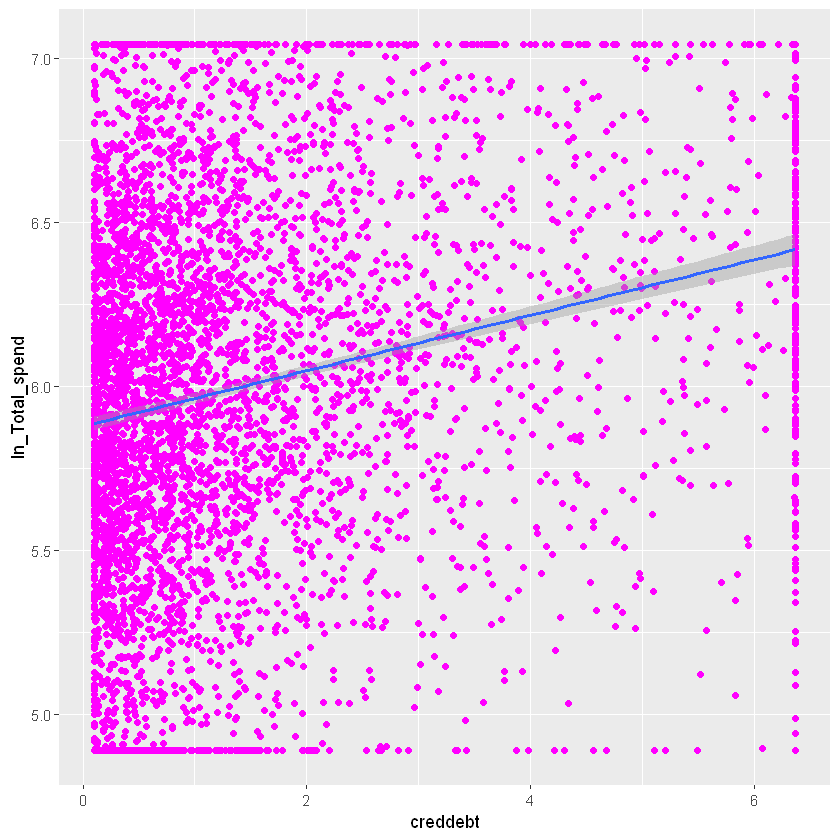

In [45]:
ggplot(cc, aes(x=creddebt, y=ln_Total_spend)) + geom_point(col="magenta") + geom_smooth(method=lm)

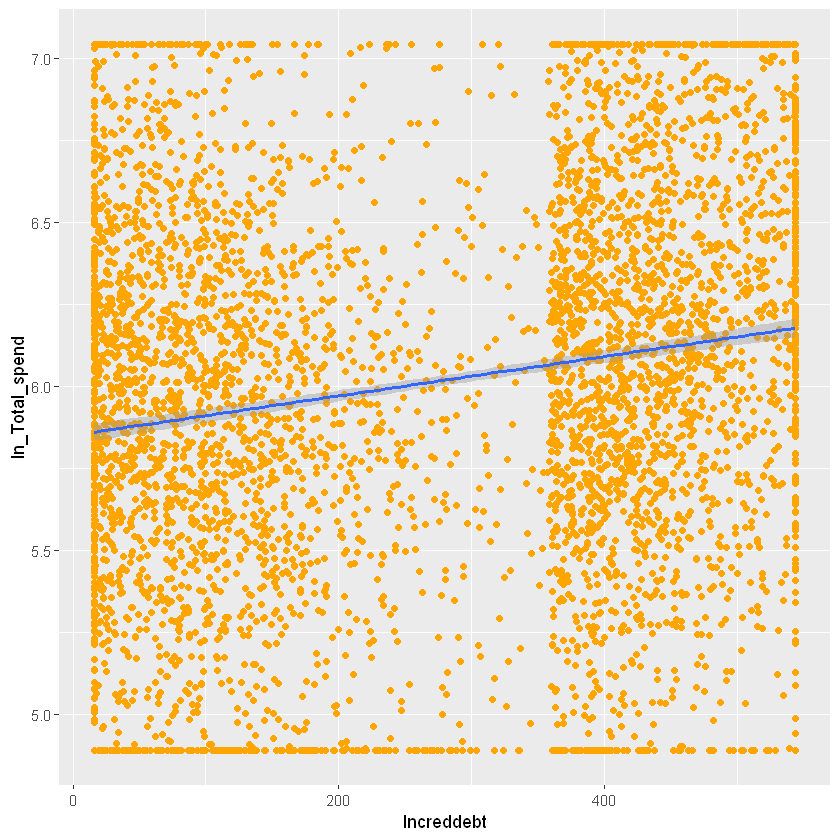

In [46]:
ggplot(cc, aes(x=lncreddebt, y=ln_Total_spend)) + geom_point(col="orange") + geom_smooth(method=lm) 

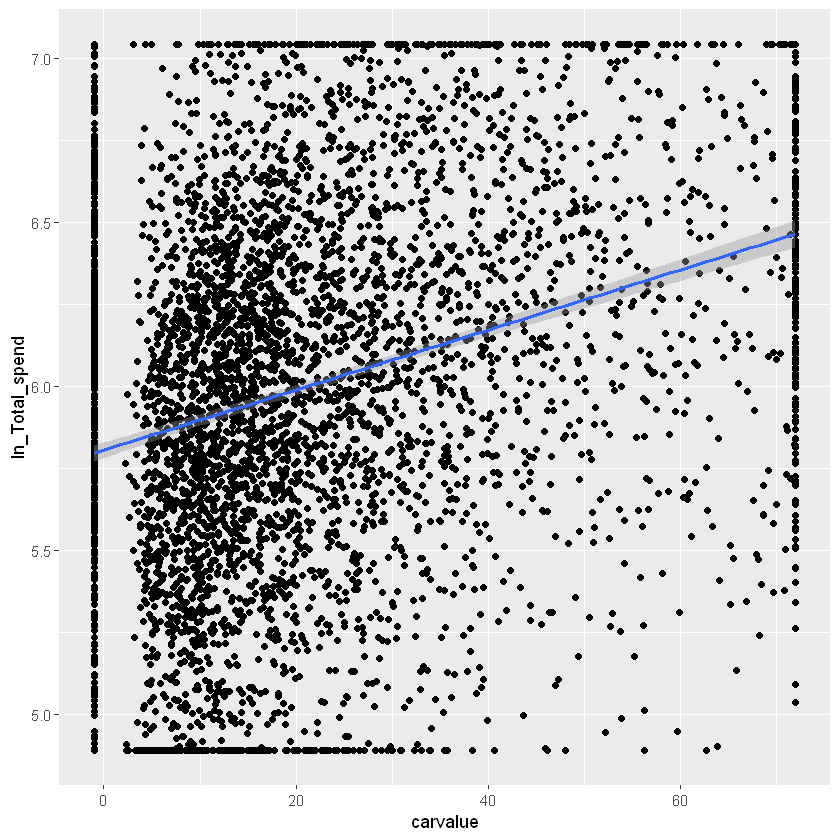

In [47]:
ggplot(cc, aes(x=carvalue, y=ln_Total_spend)) + geom_point(col="black") + geom_smooth(method=lm)

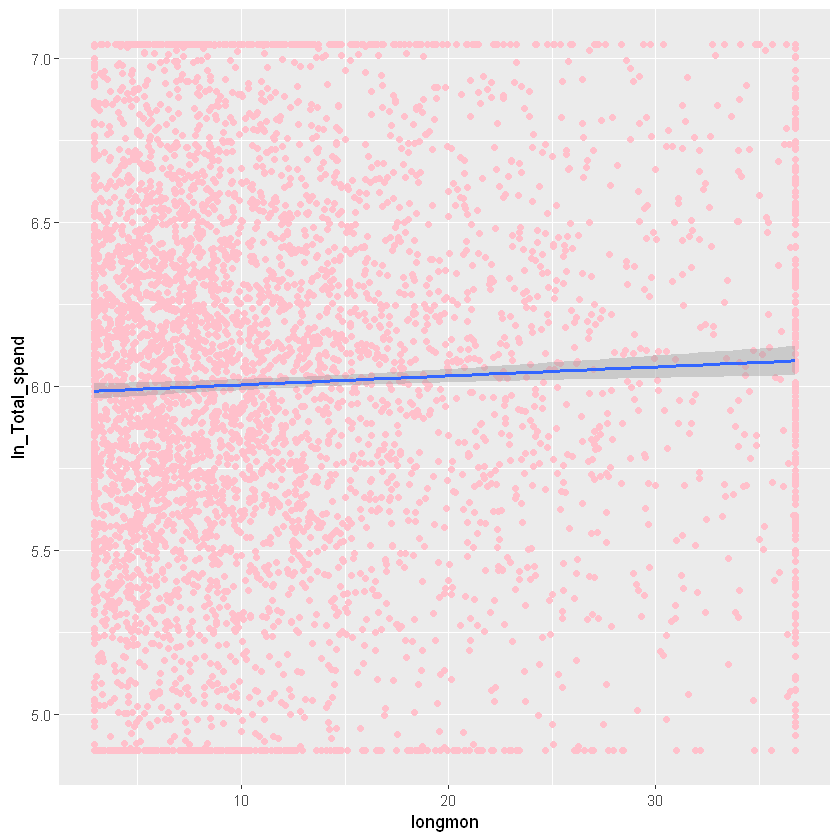

In [48]:
ggplot(cc, aes(x=longmon, y=ln_Total_spend)) + geom_point(col="pink") + geom_smooth(method=lm)

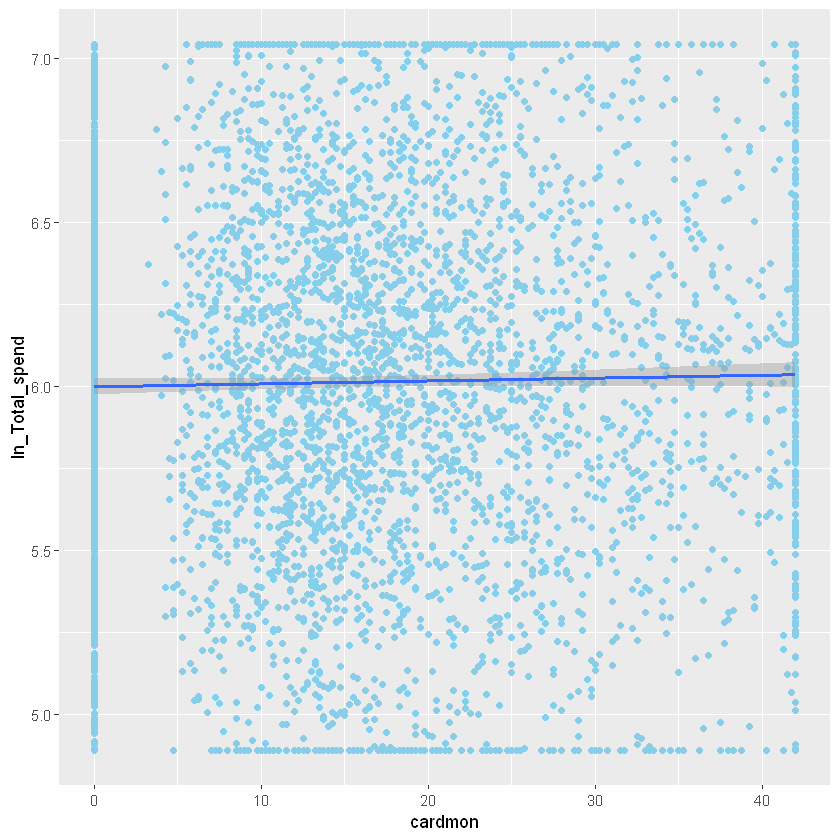

In [49]:
ggplot(cc, aes(x=cardmon, y=ln_Total_spend)) + geom_point(col="skyblue") + geom_smooth(method=lm)

### Export final cleaned dataset(ready for modelling)

In [50]:
write.csv(cc, file="C:\\Data_Science\\Certifications\\AnalytixLabs\\Data Science in R\\Data Science with R - Final Projects\\Linear Regression - Credit Card Spend\\credit_card_final.csv")

In [51]:
NCOL(cc)
head(cc,5)

[1] 15

ln_Total_spend,age,lninc,creddebt,lncreddebt,carvalue,longmon,cardmon,region,gender,edcat,reason,card,card2,internet
5.007029,20,3.43,1.20,377,14.3,6.50,14.25,1,1,3,9,3,5,0
4.891146,22,2.71,1.22,379,6.8,8.90,16.00,5,0,4,9,2,4,4
5.886021,67,3.56,0.93,16,18.8,28.40,23.00,3,1,2,2,2,4,0
5.884464,23,3.00,0.10,331,8.7,6.00,21.00,4,0,3,9,2,3,2
6.230147,26,3.14,0.21,154,10.6,3.05,17.25,2,0,3,9,4,1,3


###  Build a Predictive Model

####  Splitting the dataset into Training and Test datasets


In [52]:
set.seed(222)
ind <- sample(2,nrow(cc),replace = TRUE,prob = c(0.70,0.30))
cc_train <- cc[ind==1,]
cc_test <- cc[ind==2,]

In [53]:
nrow(cc_train)
nrow(cc_test)

ncol(cc_train)
ncol(cc_test)

[1] 3500

[1] 1500

[1] 15

[1] 15

#### Building model on training dataset

In [54]:
full.model.lm2 <- lm(ln_Total_spend ~ .,data = cc_train)
summary(full.model.lm2)


Call:
lm(formula = ln_Total_spend ~ ., data = cc_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.45537 -0.33035  0.01593  0.34665  1.30968 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.563e+00  8.321e-02  66.854  < 2e-16 ***
age         -1.641e-03  5.405e-04  -3.037  0.00241 ** 
lninc        3.251e-01  2.146e-02  15.148  < 2e-16 ***
creddebt     2.360e-02  7.935e-03   2.975  0.00295 ** 
lncreddebt  -1.593e-04  6.777e-05  -2.351  0.01878 *  
carvalue    -1.036e-03  7.055e-04  -1.469  0.14198    
longmon      1.862e-03  1.074e-03   1.733  0.08310 .  
cardmon     -1.266e-03  7.062e-04  -1.792  0.07320 .  
region2      3.801e-02  2.512e-02   1.513  0.13040    
region3      8.342e-03  2.524e-02   0.330  0.74104    
region4      2.150e-02  2.567e-02   0.837  0.40237    
region5      4.660e-02  2.518e-02   1.850  0.06433 .  
gender1     -4.728e-02  1.612e-02  -2.933  0.00338 ** 
edcat2      -1.235e-02  2.389e-02  -0.517  0.60522    

In [55]:
step.model.lm2 <- stepAIC(full.model.lm2,direction="both")
summary(step.model.lm2)
step.model.lm2$anova

Start:  AIC=-5218.85
ln_Total_spend ~ age + lninc + creddebt + lncreddebt + carvalue + 
    longmon + cardmon + region + gender + edcat + reason + card + 
    card2 + internet

             Df Sum of Sq    RSS     AIC
- region      4     1.076 774.29 -5222.0
- internet    4     1.587 774.81 -5219.7
<none>                    773.22 -5218.9
- carvalue    1     0.481 773.70 -5218.7
- longmon     1     0.670 773.89 -5217.8
- cardmon     1     0.716 773.93 -5217.6
- edcat       4     2.307 775.52 -5216.4
- lncreddebt  1     1.233 774.45 -5215.3
- gender      1     1.918 775.14 -5212.2
- creddebt    1     1.974 775.19 -5211.9
- age         1     2.057 775.27 -5211.6
- reason      4    17.075 790.29 -5150.4
- lninc       1    51.176 824.39 -4996.5
- card2       4    57.811 831.03 -4974.5
- card        4   144.625 917.84 -4626.7

Step:  AIC=-5221.98
ln_Total_spend ~ age + lninc + creddebt + lncreddebt + carvalue + 
    longmon + cardmon + gender + edcat + reason + card + card2 + 
    internet



Call:
lm(formula = ln_Total_spend ~ age + lninc + creddebt + lncreddebt + 
    longmon + cardmon + gender + reason + card + card2, data = cc_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.49817 -0.32851  0.01335  0.34817  1.31784 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.642e+00  6.711e-02  84.068  < 2e-16 ***
age         -1.721e-03  5.332e-04  -3.228 0.001256 ** 
lninc        2.984e-01  1.480e-02  20.157  < 2e-16 ***
creddebt     2.136e-02  7.910e-03   2.700 0.006970 ** 
lncreddebt  -1.491e-04  6.771e-05  -2.202 0.027702 *  
longmon      2.084e-03  1.068e-03   1.951 0.051088 .  
cardmon     -1.246e-03  7.062e-04  -1.765 0.077721 .  
gender1     -4.884e-02  1.612e-02  -3.030 0.002466 ** 
reason2      3.347e-01  4.143e-02   8.081 8.80e-16 ***
reason3     -1.473e-03  8.246e-02  -0.018 0.985746    
reason4     -1.895e-02  5.836e-02  -0.325 0.745439    
reason9      1.108e-01  2.853e-02   3.884 0.000105 ***
card2       -5.17

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,3467,773.2179,-5218.850
- region,4,1.0761261,3471,774.2941,-5221.983
- internet,4,1.6209653,3475,775.9150,-5222.663
- edcat,4,1.6772684,3479,777.5923,-5223.106
- carvalue,1,0.4369617,3480,778.0293,-5223.139


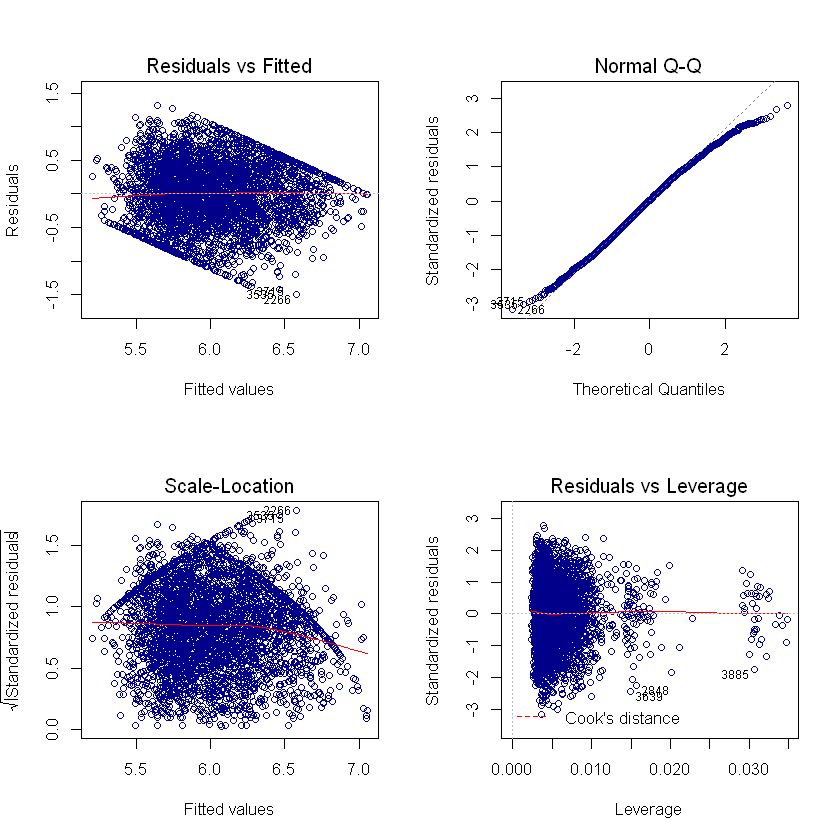

In [56]:
par(mfrow=c(2,2))
plot(step.model.lm2,col="darkblue")

In [57]:
step.model.lm2


Call:
lm(formula = ln_Total_spend ~ age + lninc + creddebt + lncreddebt + 
    longmon + cardmon + gender + reason + card + card2, data = cc_train)

Coefficients:
(Intercept)          age        lninc     creddebt   lncreddebt      longmon  
  5.6419563   -0.0017215    0.2983555    0.0213563   -0.0001491    0.0020841  
    cardmon      gender1      reason2      reason3      reason4      reason9  
 -0.0012462   -0.0488400    0.3347451   -0.0014733   -0.0189489    0.1108005  
      card2        card3        card4        card5       card22       card23  
 -0.5174306   -0.5110620   -0.6184871   -0.4312342   -0.3660614   -0.3563332  
     card24       card25  
 -0.3845267   -0.2653297  


In [58]:
# From the Stepwise AIC, we see that this model has the least value of AIC.

# Step:  AIC=-4865.53
# ln_Total_spend ~ age + lninc + creddebt + lncreddebt + carvalue + longmon + cardmon + gender + edcat + reason + card + card2 + internet


### Cook's Distance: Removing Influential Observations

In [59]:
nrow(cc_train)

[1] 3500

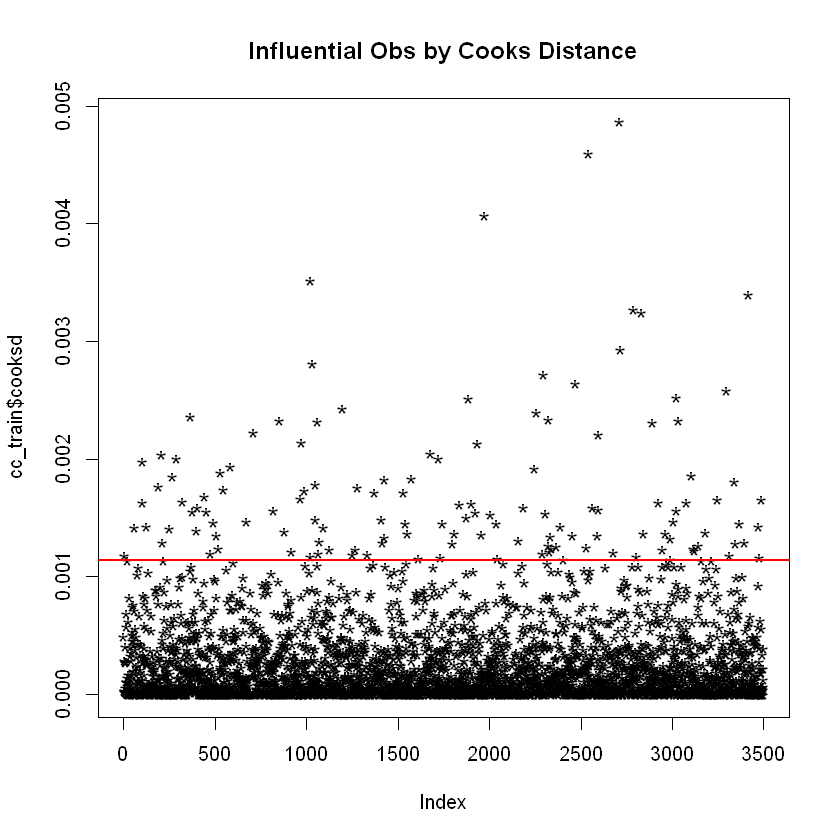

In [60]:
cc_train$cooksd <- cooks.distance(step.model.lm2)

# Plot the Cook's Distance using the traditional 4/n criteria
sample_size <- nrow(cc_train)
plot(cc_train$cooksd, pch="*", cex=1.5, main="Influential Obs by Cooks Distance")  # plot Cook's distance
abline(h = 4/sample_size, col="red", lwd=2)  # add a cutoff line

In [61]:
cc_train1 <- subset(cc_train,cooksd<(4/3768))

In [62]:
NROW(cc_train1)

[1] 3339

In [63]:
final_model1 <- lm(ln_Total_spend ~ age + lninc + creddebt + lncreddebt + carvalue + longmon + cardmon + gender + edcat + reason + card + card2 + internet, data = cc_train1)
summary(final_model1)



Call:
lm(formula = ln_Total_spend ~ age + lninc + creddebt + lncreddebt + 
    carvalue + longmon + cardmon + gender + edcat + reason + 
    card + card2 + internet, data = cc_train1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.12049 -0.31792  0.01006  0.31858  1.13055 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.567e+00  7.744e-02  71.880  < 2e-16 ***
age         -2.129e-03  5.077e-04  -4.192 2.83e-05 ***
lninc        3.467e-01  2.014e-02  17.218  < 2e-16 ***
creddebt     2.284e-02  7.486e-03   3.052 0.002295 ** 
lncreddebt  -1.735e-04  6.376e-05  -2.722 0.006532 ** 
carvalue    -1.137e-03  6.607e-04  -1.721 0.085355 .  
longmon      3.562e-03  1.019e-03   3.496 0.000479 ***
cardmon     -2.019e-03  6.678e-04  -3.023 0.002521 ** 
gender1     -5.472e-02  1.517e-02  -3.606 0.000315 ***
edcat2      -1.742e-02  2.251e-02  -0.774 0.439104    
edcat3      -2.484e-02  2.574e-02  -0.965 0.334770    
edcat4      -5.585e-02  2.695e-02  -

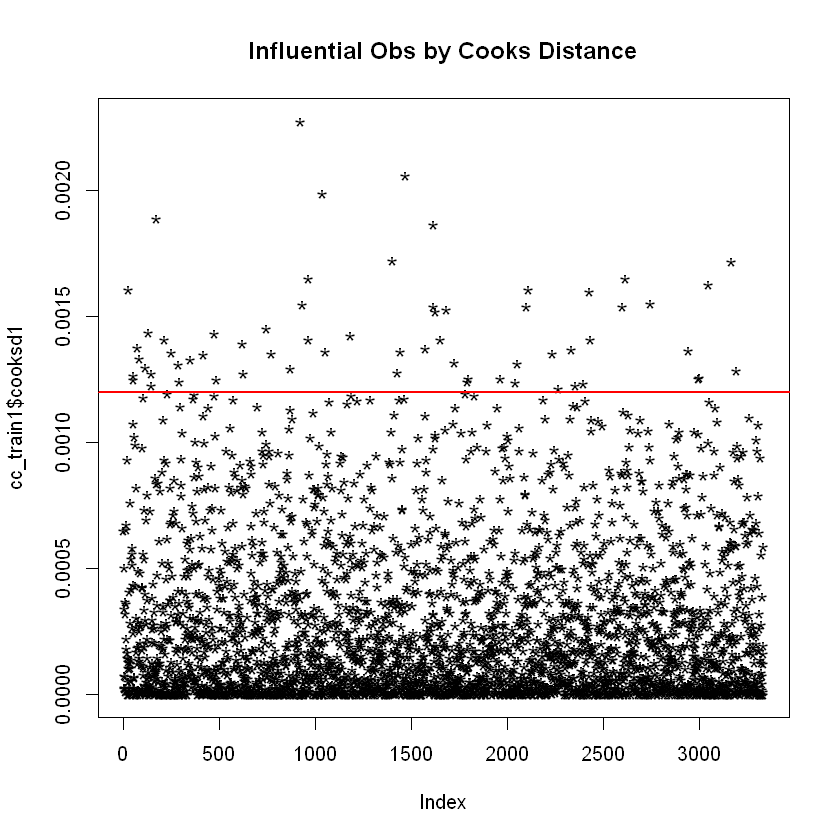

In [64]:
cc_train1$cooksd1 <- cooks.distance(final_model1)

# Plot the Cook's Distance using the traditional 4/n criteria
sample_size <- nrow(cc_train1)
plot(cc_train1$cooksd1, pch="*", cex=1.5, main="Influential Obs by Cooks Distance")  # plot Cook's distance
abline(h = 4/sample_size, col="red", lwd=2)  # add a cutoff line

In [65]:
cc_train2 <- subset(cc_train1,cooksd1<(4/3607))

In [66]:
nrow(cc_train2)

[1] 3244

In [67]:
final_model2 <- lm(ln_Total_spend ~ age + lninc + creddebt + lncreddebt + carvalue + longmon + cardmon + gender + edcat + reason + card + card2 + internet, data = cc_train2)
summary(final_model2)


Call:
lm(formula = ln_Total_spend ~ age + lninc + creddebt + lncreddebt + 
    carvalue + longmon + cardmon + gender + edcat + reason + 
    card + card2 + internet, data = cc_train2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.09072 -0.31122  0.00431  0.30798  1.09291 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.552e+00  7.531e-02  73.721  < 2e-16 ***
age         -2.045e-03  4.885e-04  -4.187 2.90e-05 ***
lninc        3.569e-01  1.960e-02  18.209  < 2e-16 ***
creddebt     2.416e-02  7.266e-03   3.325 0.000893 ***
lncreddebt  -1.856e-04  6.168e-05  -3.009 0.002645 ** 
carvalue    -1.354e-03  6.461e-04  -2.096 0.036156 *  
longmon      3.545e-03  9.797e-04   3.619 0.000301 ***
cardmon     -2.114e-03  6.448e-04  -3.278 0.001056 ** 
gender1     -5.684e-02  1.466e-02  -3.877 0.000108 ***
edcat2      -1.840e-02  2.158e-02  -0.853 0.393737    
edcat3      -1.679e-02  2.482e-02  -0.676 0.498783    
edcat4      -4.597e-02  2.599e-02  -

ln_Total_spend,age,lninc,creddebt,lncreddebt,carvalue,longmon,cardmon,region,gender,edcat,reason,card,card2,internet,cooksd,cooksd1


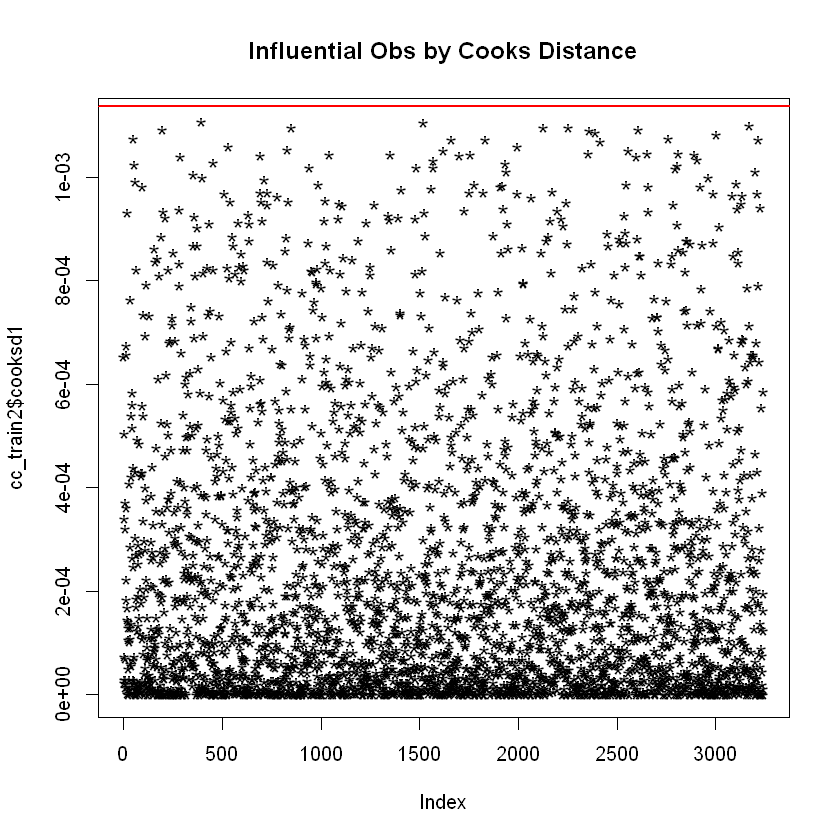

In [68]:
# No more outliers with Cook's Distance greater than 4/Sample Size

subset(cc_train2,cooksd1>(4/3520))

plot(cc_train2$cooksd1, pch="*", cex=1.5, main="Influential Obs by Cooks Distance")  # plot Cook's distance
abline(h = 4/3520, col="red", lwd=2)  # add a cutoff line

### Linear Regression Diagnostic Plots

    Diagnostics plots are used to evaluate the model assumptions and understand whether or not there are observations that can strongly have influence on the analysis. As consequence, the goal is to take the proper actions to improve the model fit.

#### 1. Residuals vs Fitted values
    Residual data of the simple linear regression model is the difference between the observed data of the dependent variable and the fitted values. The plot is useful for checking the assumption of "linearity" and "homoscedasticity". To assess the assumption of linearity, residuals should be not too far from 0 (ideally, standardized values should be in the range of -2 and +2). To assess he assumption of homoscedasticity, residuals should be randomly and equally distributed around the horizontal red line (which is just a scatterplot smoother, showing the average value of the residuals at each value of fitted value) representing a residual error of zero.

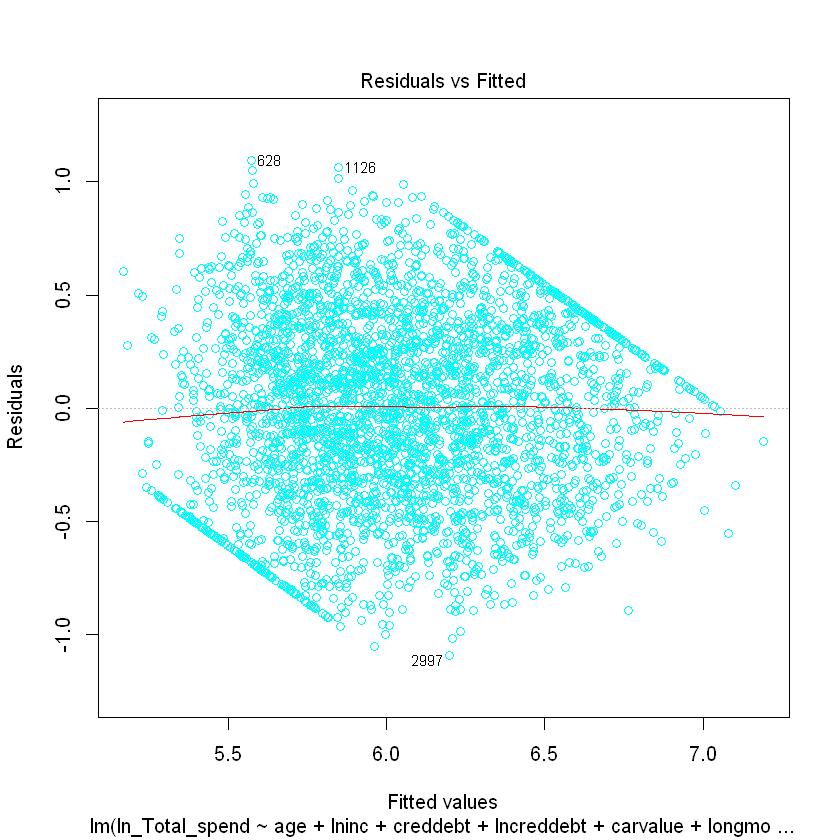

In [69]:
plot(final_model2, pch=1, col="cyan", lty=1, lwd=1, which=1)

#In the current case, the red trend line is almost at zero except slightly towards the left side, due to few outliers presence.
#Although few of the points( “3201”, “2313”, “2997”) ar far from 0, none of the values are outside the range of -2 and +2.

#### 2. Normal Q-Q Plot
    The normal Q-Q (quantile-quantile) plot is a scatterplot that allows to see if a set of data plausibly come from a normal distribution.

    It is created by plotting two sets of quantiles vs one another: graphically, the points will fall along a a straight line if both sets of quantiles come from the same distribution.

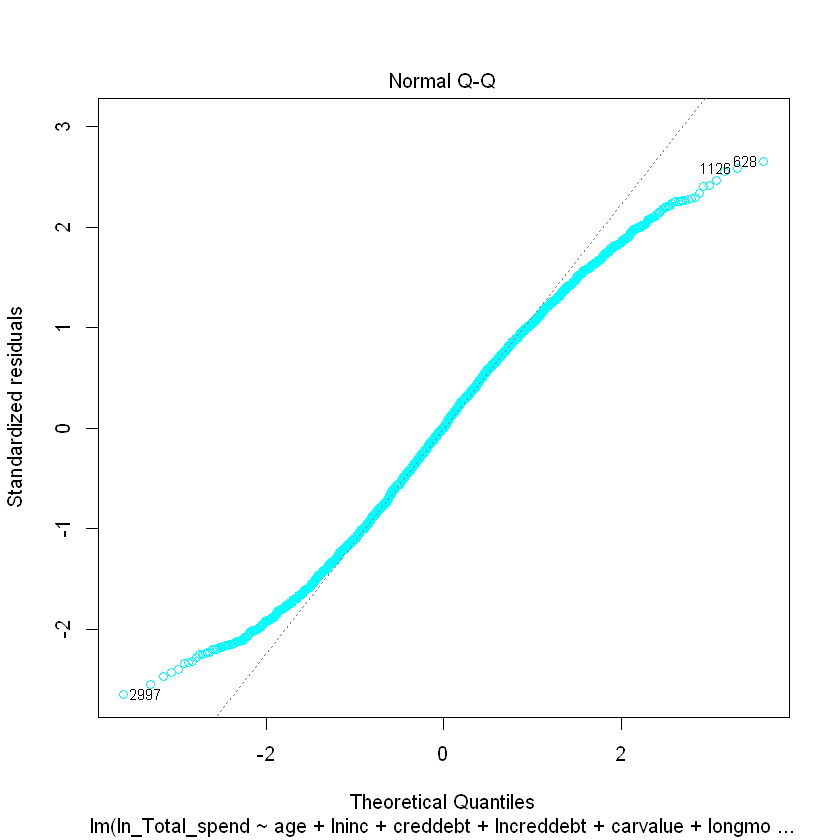

In [70]:
plot(final_model2, pch=1, col="cyan", lty=1, lwd=1, which=2)

#In the current case, points form a line in the middle of the graph, but tend to deviate from the diagonal line in both the upper and lower extremities. 
#Plot behaviour like this, means that the tails are lighter (have smaller values) than what would be expected under the standard modeling assumptions (of the Normal distribution). 
#Again the observations that can be noticed in the tails are (“3201”, “2313”, “2997”).

#### 3. Scale-location plot
    The scale-location plot shows the square root of the standardized residuals (sort of a square root of relative error) as a function of the fitted values. It is useful to see how the residuals are spread and check the assumption of homoscedasticity (that it if the residuals have an equal variance or not).

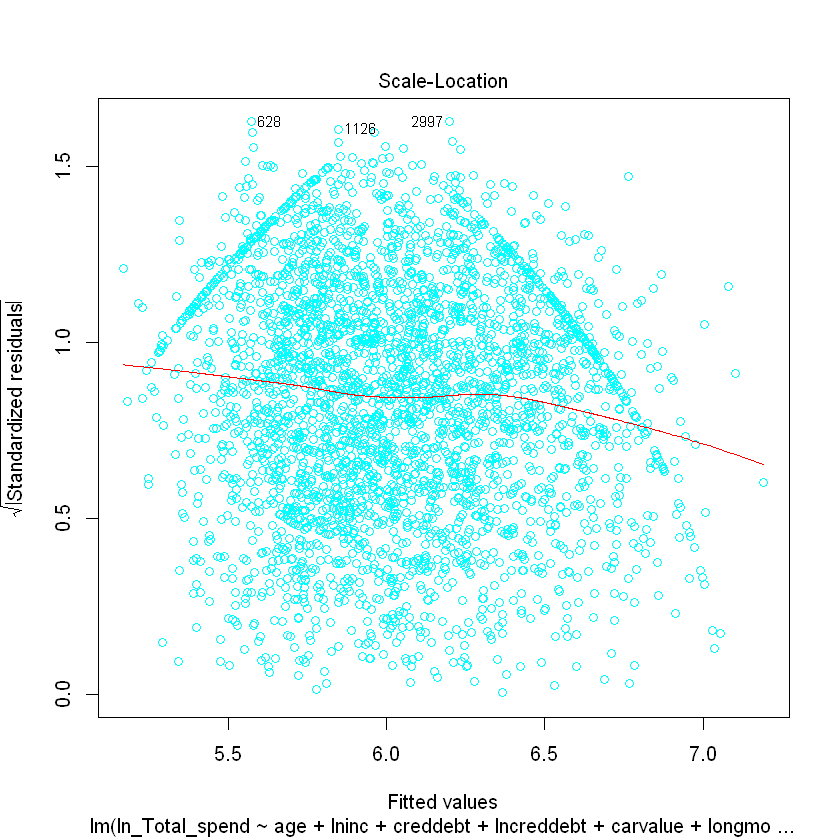

In [71]:
plot(final_model2, pch=1, col="cyan", lty=1, lwd=1, which=3)

#In the current case, the red trend line is almost horizontal.

#### 4. Residuals vs Leverage
    The plot shows each points leverage, which represents a measure of its importance in determining the regression result. Each point far from the dashed line can be intended as an influential point.

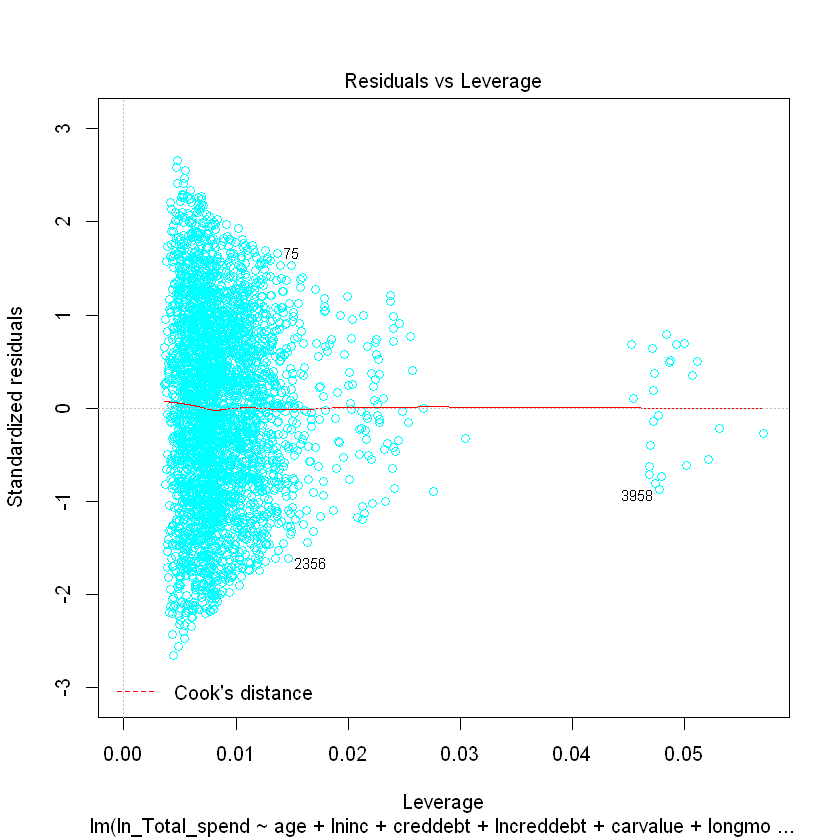

In [72]:
plot(final_model2, pch=1, col="cyan", lty=1, lwd=1, which=5)

#In the current case, the red trend line is almost horizontal.

### Model Improvement

    Model summary as well as diagnostic plots have given important information that allow to improve the model fit. Together with final_model2, it is possible to explore the final_model3 that omits the noticed outliers. As noticed in all the main diagnostic plots, the observations (“3201”, “2313”, “2997”) can be considered as outliers. They can also be shown graphically:

In [73]:
# rownames(cc_train2) gives the row number
# Exclude the 3 row numbers: 167,1200 and 3394
# The new recordcount should be 3529-3 = 3517
cc_train3 <- cc_train2[!(rownames(cc_train2) %in% c(3201,2313,2997)),]
nrow(cc_train3)

[1] 3241

### Create a new model with the updated Training dataset

In [74]:
final_model3 <- lm(ln_Total_spend ~ age + lninc + creddebt + lncreddebt + carvalue + longmon + cardmon + gender + edcat + reason + card + card2 + internet, data = cc_train3)
summary(final_model3)
# Removing outliers, model fits only slightly better than the previous: F statistic and R-squared values of final_model3 are higher than final_model2 ones. 


Call:
lm(formula = ln_Total_spend ~ age + lninc + creddebt + lncreddebt + 
    carvalue + longmon + cardmon + gender + edcat + reason + 
    card + card2 + internet, data = cc_train3)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.05598 -0.31062  0.00408  0.30800  1.08936 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.548e+00  7.520e-02  73.780  < 2e-16 ***
age         -2.060e-03  4.877e-04  -4.225 2.46e-05 ***
lninc        3.575e-01  1.957e-02  18.270  < 2e-16 ***
creddebt     2.359e-02  7.255e-03   3.252 0.001159 ** 
lncreddebt  -1.823e-04  6.158e-05  -2.960 0.003096 ** 
carvalue    -1.338e-03  6.450e-04  -2.075 0.038072 *  
longmon      3.550e-03  9.781e-04   3.629 0.000288 ***
cardmon     -2.144e-03  6.438e-04  -3.330 0.000879 ***
gender1     -5.785e-02  1.464e-02  -3.951 7.96e-05 ***
edcat2      -1.571e-02  2.155e-02  -0.729 0.465997    
edcat3      -1.628e-02  2.477e-02  -0.657 0.511230    
edcat4      -4.522e-02  2.594e-02  -

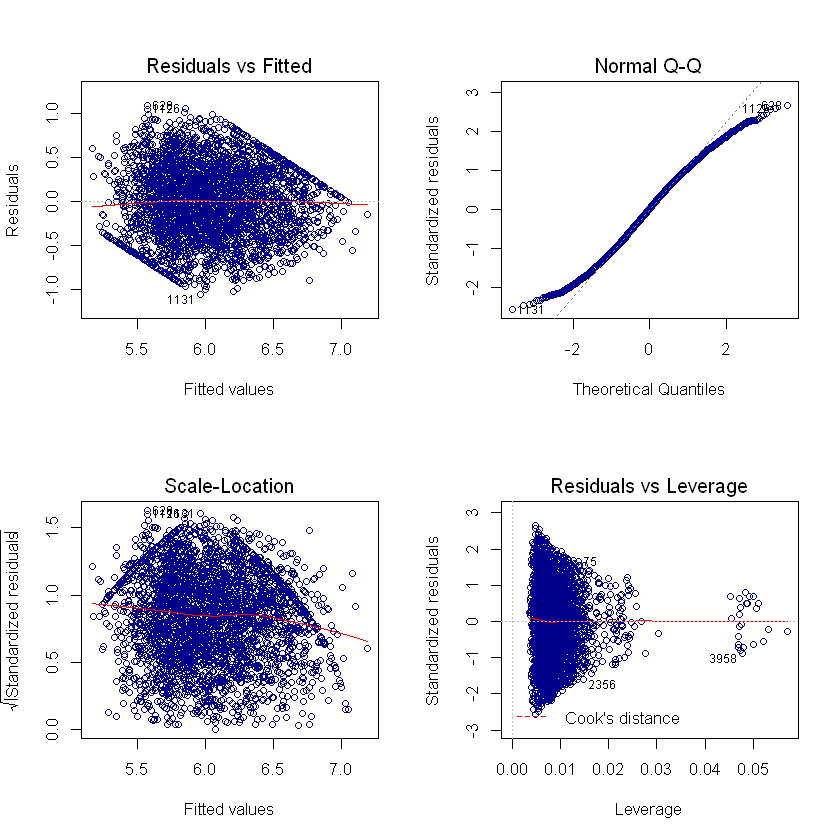

In [75]:
par(mfrow = c(2,2)) # display a unique layout for all graphs
plot(final_model3,col="darkblue")

# Plots still shows some tails, but they seem to be more acceptable.

### Check AIC and BIC values

    Another way that gives support to model selection is calculating AIC (Akaike’s information criterion) and BIC (Bayesian information criterion) metrics. They represent measures of the goodness of fit of an estimated statistical model (both criteria depend on the maximized value of the likelihood function for the estimated model).

In [76]:
AIC(final_model2)
AIC(final_model3)

[1] 3495.061

[1] 3480.215

In [77]:
BIC(final_model2)
BIC(final_model3)

[1] 3677.598

[1] 3662.725

In [78]:
# AIC and BIC values of final_model3 are lower than final_model2 ones. 
# Generally, small values correspond to models with a low test error, so it's a confirmation that final_model3 fits better than final_model2.

### Check for MultiCollinearity
    There is an extreme situation, called multicollinearity, where collinearity exists between three or more variables even if no pair of variables has a particularly high correlation. This means that there is redundancy between predictor variables.

    In the presence of multicollinearity, the solution of the regression model becomes unstable.The smallest possible value of VIF is 1 (absence of multicollinearity). As a rule of thumb, a VIF value that exceeds 5 or 10 indicates a problematic amount of collinearity.

In [79]:
#A value of 1 means that the predictor is not correlated with other variables. The higher the value, the greater the correlation of the variable with other variables. 
#Values of more than 4 or 5 are sometimes regarded as being moderate to high, with values of 10 or more being regarded as very high.

car::vif(final_model3)

# All variables have VIF less than 5. Most of them have close to 1.
# So we will not remove any variables

,GVIF,Df,GVIF^(1/(2*Df))
age,1.419596,1,1.191468
lninc,3.481537,1,1.865888
creddebt,2.916758,1,1.707852
lncreddebt,2.450569,1,1.565429
carvalue,3.028140,1,1.740155
longmon,1.546252,1,1.243484
cardmon,1.262718,1,1.123707
gender,1.023675,1,1.011768
edcat,1.525076,4,1.054172
reason,1.044296,4,1.005433


In [80]:
# We remove lncreddebt becauase its correlated to creddebt
final_model4 <- lm(ln_Total_spend ~ age + lninc + creddebt + carvalue + longmon + cardmon + gender + edcat + reason + card + card2 + internet, data = cc_train3)
summary(final_model4) 


Call:
lm(formula = ln_Total_spend ~ age + lninc + creddebt + carvalue + 
    longmon + cardmon + gender + edcat + reason + card + card2 + 
    internet, data = cc_train3)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04123 -0.31079  0.00752  0.31109  1.08717 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.5370649  0.0751946  73.636  < 2e-16 ***
age         -0.0020964  0.0004881  -4.295 1.80e-05 ***
lninc        0.3529977  0.0195329  18.072  < 2e-16 ***
creddebt     0.0091867  0.0053875   1.705 0.088255 .  
carvalue    -0.0012634  0.0006453  -1.958 0.050325 .  
longmon      0.0035926  0.0009791   3.669 0.000247 ***
cardmon     -0.0021302  0.0006446  -3.305 0.000961 ***
gender1     -0.0573542  0.0146601  -3.912 9.33e-05 ***
edcat2      -0.0179658  0.0215626  -0.833 0.404798    
edcat3      -0.0180211  0.0247959  -0.727 0.467413    
edcat4      -0.0465920  0.0259682  -1.794 0.072876 .  
edcat5      -0.0944076  0.0361718  -2.610 0.00909

### Stepwise Regresssion

In [81]:
step.model <- stepAIC(final_model4,direction = "both")
summary(step.model)
step.model$anova

Start:  AIC=-5712.51
ln_Total_spend ~ age + lninc + creddebt + carvalue + longmon + 
    cardmon + gender + edcat + reason + card + card2 + internet

           Df Sum of Sq    RSS     AIC
- internet  4     1.267 547.90 -5713.0
<none>                  546.63 -5712.5
- edcat     4     1.386 548.02 -5712.3
- creddebt  1     0.495 547.13 -5711.6
- carvalue  1     0.652 547.29 -5710.6
- cardmon   1     1.858 548.49 -5703.5
- longmon   1     2.291 548.93 -5701.0
- gender    1     2.604 549.24 -5699.1
- age       1     3.138 549.77 -5696.0
- reason    4    15.176 561.81 -5631.8
- lninc     1    55.564 602.20 -5400.8
- card2     4    68.214 614.85 -5339.4
- card      4   148.792 695.43 -4940.3

Step:  AIC=-5713.01
ln_Total_spend ~ age + lninc + creddebt + carvalue + longmon + 
    cardmon + gender + edcat + reason + card + card2

           Df Sum of Sq    RSS     AIC
- edcat     4     1.043 548.95 -5714.8
<none>                  547.90 -5713.0
+ internet  4     1.267 546.63 -5712.5
- creddeb


Call:
lm(formula = ln_Total_spend ~ age + lninc + creddebt + carvalue + 
    longmon + cardmon + gender + reason + card + card2, data = cc_train3)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.06160 -0.30729  0.00612  0.31036  1.07889 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.5226953  0.0731566  75.491  < 2e-16 ***
age         -0.0021004  0.0004816  -4.362 1.33e-05 ***
lninc        0.3501732  0.0194557  17.999  < 2e-16 ***
creddebt     0.0085527  0.0053838   1.589 0.112249    
carvalue    -0.0012970  0.0006449  -2.011 0.044367 *  
longmon      0.0038003  0.0009750   3.898 9.90e-05 ***
cardmon     -0.0021611  0.0006449  -3.351 0.000814 ***
gender1     -0.0578275  0.0146525  -3.947 8.10e-05 ***
reason2      0.3458569  0.0378359   9.141  < 2e-16 ***
reason3      0.0364639  0.0880401   0.414 0.678774    
reason4      0.0321245  0.0567340   0.566 0.571277    
reason9      0.1321753  0.0262972   5.026 5.28e-07 ***
card2       -0.547

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,3213,546.6349,-5712.514
- internet,4,1.266992,3217,547.9019,-5713.010
- edcat,4,1.043368,3221,548.9452,-5714.844


In [82]:
# Use the latest column list as given by Stepwise Regression with least AIC value
#Step:  AIC=-5558.34
#ln_Total_spend ~ age + lninc + creddebt + carvalue + longmon + cardmon + gender + edcat + reason + card + card2

final_model5 <- lm(ln_Total_spend ~ age + lninc + creddebt + carvalue + longmon + cardmon + gender + edcat + reason + card + card2, data = cc_train3)
summary(final_model5)


Call:
lm(formula = ln_Total_spend ~ age + lninc + creddebt + carvalue + 
    longmon + cardmon + gender + edcat + reason + card + card2, 
    data = cc_train3)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.05540 -0.30402  0.00777  0.31123  1.08603 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.5413188  0.0749624  73.921  < 2e-16 ***
age         -0.0021474  0.0004860  -4.418 1.03e-05 ***
lninc        0.3533603  0.0195287  18.094  < 2e-16 ***
creddebt     0.0088797  0.0053886   1.648 0.099476 .  
carvalue    -0.0012808  0.0006450  -1.986 0.047151 *  
longmon      0.0036069  0.0009796   3.682 0.000235 ***
cardmon     -0.0021747  0.0006447  -3.373 0.000752 ***
gender1     -0.0572292  0.0146591  -3.904 9.66e-05 ***
edcat2      -0.0152855  0.0213654  -0.715 0.474395    
edcat3      -0.0096239  0.0239022  -0.403 0.687242    
edcat4      -0.0322343  0.0241882  -1.333 0.182742    
edcat5      -0.0772453  0.0339870  -2.273 0.023105 *  
reaso

In [83]:
# Check again for multicollinearity
# No more variables showing high or very high VIF value (greater than  5 or 10)
# So nothing is dropped
car::vif(final_model5)

,GVIF,Df,GVIF^(1/(2*Df))
age,1.404950,1,1.185306
lninc,3.454953,1,1.858750
creddebt,1.603686,1,1.266367
carvalue,3.017613,1,1.737128
longmon,1.545724,1,1.243272
cardmon,1.261710,1,1.123259
gender,1.022306,1,1.011092
edcat,1.213099,4,1.024441
reason,1.037836,4,1.004653
card,1.879830,4,1.082094


### Predicting the Total spend in Training and Test datasets

In [84]:
# Training
pred_train <- predict(final_model5,newdata = cc_train)
cc_train <- cbind(cc_train,pred_spend=pred_train)

In [85]:
# Test
pred_test <- predict(final_model5,newdata = cc_test)
cc_test <- cbind(cc_test,pred_spend=pred_test)

### Calculate Prediction Accuracy and Error Rates

    A simple correlation between the actuals and predicted values can be used as a form of accuracy measure. A higher correlation accuracy implies that the actuals and predicted values have similar directional movement, i.e. when the actuals values increase the predicteds also increase and vice-versa.

In [86]:
actuals_preds <- data.frame(cbind(actual=exp(cc_test$ln_Total_spend), predicted=exp(cc_test$pred_spend)) )

#Export the actual and predicted values to a CSV file
write.csv(actuals_preds,"C:\\Data_Science\\Certifications\\AnalytixLabs\\Data Science in R\\Data Science with R - Final Projects\\Linear Regression - Credit Card Spend\\actuals_predictions.csv")

#### Correlation Accuracy

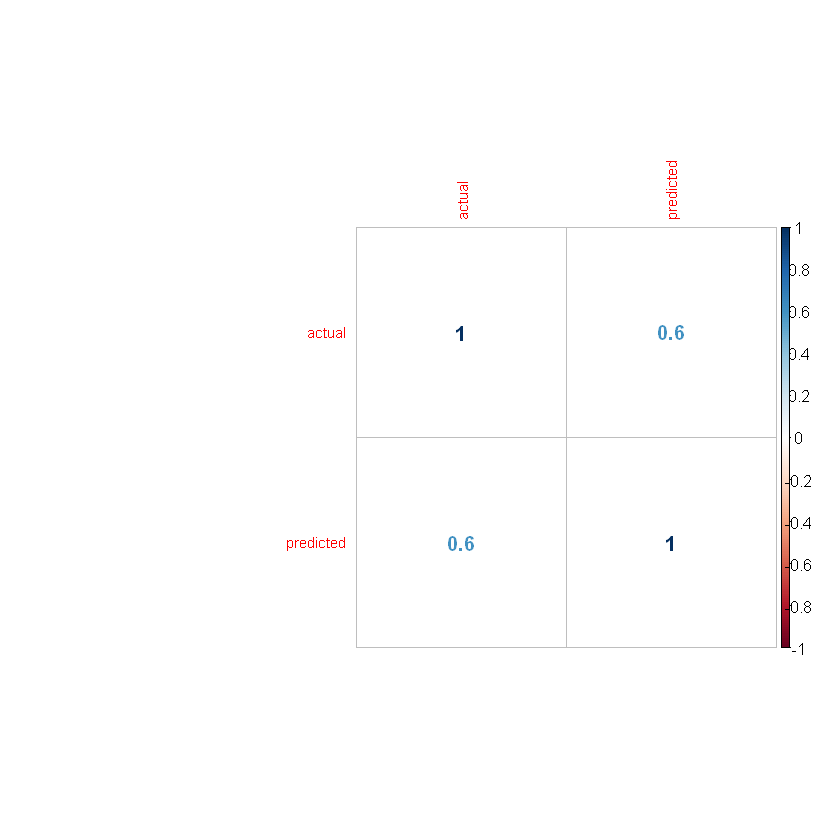

In [87]:
correlation_accuracy <- cor(actuals_preds)
corrplot(correlation_accuracy, method = "number", tl.cex = 0.75)

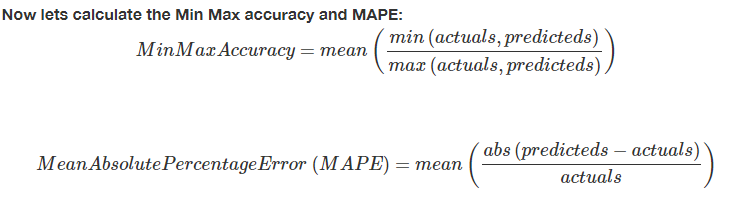

#### Min Max Accuracy and MAPE

In [88]:
min_max_accuracy <- mean(apply(actuals_preds, 1, min) / apply(actuals_preds, 1, max))  
cat("Min Max Accuracy%: ", round(min_max_accuracy*100,3))
cat("\n")
mape <- mean(abs((actuals_preds$predicted - actuals_preds$actual))/actuals_preds$actual)  
cat("MAPE%: ", round(mape*100,3)) 

Min Max Accuracy%:  71.393
MAPE%:  41.317

### Save the model to disk

In [89]:
saveRDS(final_model3, "C:\\Data_Science\\Certifications\\AnalytixLabs\\Data Science in R\\Data Science with R - Final Projects\\Linear Regression - Credit Card Spend\\LinearRegression.rda")

# readRDS("C:\\Data_Science\\Certifications\\AnalytixLabs\\Data Science in R\\Data Science with R - Final Projects\\Linear Regression - Credit Card Spend\\LinearRegression.rda")

### Decile Analysis

In [90]:
dec_loc <- quantile(cc_train$pred_spend,probs = seq(0.1,0.9,by=0.1))
cc_train$decile <- findInterval(cc_train$pred_spend,c(-Inf,dec_loc,+Inf)) 

In [91]:
cc_train_decile <- sqldf("select decile,count(decile) as Count,
                   avg(ln_total_spend) as Actual_spend,
                   avg(pred_spend) as Predicted_spend
                   from cc_train
                   group by decile
                   order by decile desc")

In [92]:
write.csv(cc_train_decile,"C:\\Data_Science\\Certifications\\AnalytixLabs\\Data Science in R\\Data Science with R - Final Projects\\Linear Regression - Credit Card Spend\\train_decile.csv")


In [93]:
dec_loc <- quantile(cc_test$pred_spend,probs = seq(0.1,0.9,by=0.1))
cc_test$decile <- findInterval(cc_test$pred_spend,c(-Inf,dec_loc,+Inf))


In [94]:
cc_test_decile <- sqldf("select decile,count(decile) as Count,
                   avg(ln_total_spend) as Actual_spend,
                   avg(pred_spend) as Predicted_spend
                   from cc_test
                   group by decile
                   order by decile desc")

In [95]:
write.csv(cc_test_decile,"C:\\Data_Science\\Certifications\\AnalytixLabs\\Data Science in R\\Data Science with R - Final Projects\\Linear Regression - Credit Card Spend\\test_decile.csv")

In [96]:
summary(final_model5)


Call:
lm(formula = ln_Total_spend ~ age + lninc + creddebt + carvalue + 
    longmon + cardmon + gender + edcat + reason + card + card2, 
    data = cc_train3)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.05540 -0.30402  0.00777  0.31123  1.08603 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.5413188  0.0749624  73.921  < 2e-16 ***
age         -0.0021474  0.0004860  -4.418 1.03e-05 ***
lninc        0.3533603  0.0195287  18.094  < 2e-16 ***
creddebt     0.0088797  0.0053886   1.648 0.099476 .  
carvalue    -0.0012808  0.0006450  -1.986 0.047151 *  
longmon      0.0036069  0.0009796   3.682 0.000235 ***
cardmon     -0.0021747  0.0006447  -3.373 0.000752 ***
gender1     -0.0572292  0.0146591  -3.904 9.66e-05 ***
edcat2      -0.0152855  0.0213654  -0.715 0.474395    
edcat3      -0.0096239  0.0239022  -0.403 0.687242    
edcat4      -0.0322343  0.0241882  -1.333 0.182742    
edcat5      -0.0772453  0.0339870  -2.273 0.023105 *  
reaso

### Calculate Variable Importance of model

In [97]:
imp <- as.data.frame(varImp(final_model5))
imp <- data.frame(columns = rownames(imp), overall = imp$Overall)
imp <- imp[order(imp$overall,decreasing = T),]
imp

write.csv(imp,"C:\\Data_Science\\Certifications\\AnalytixLabs\\Data Science in R\\Data Science with R - Final Projects\\Linear Regression - Credit Card Spend\\var_imp.csv")

,columns,overall
18,card4,26.4793860
16,card2,23.9000227
17,card3,23.0060039
2,lninc,18.0944151
20,card22,17.7982589
22,card24,16.6121789
21,card23,16.0774030
19,card5,10.3463701
12,reason2,9.1160070
23,card25,7.3138837


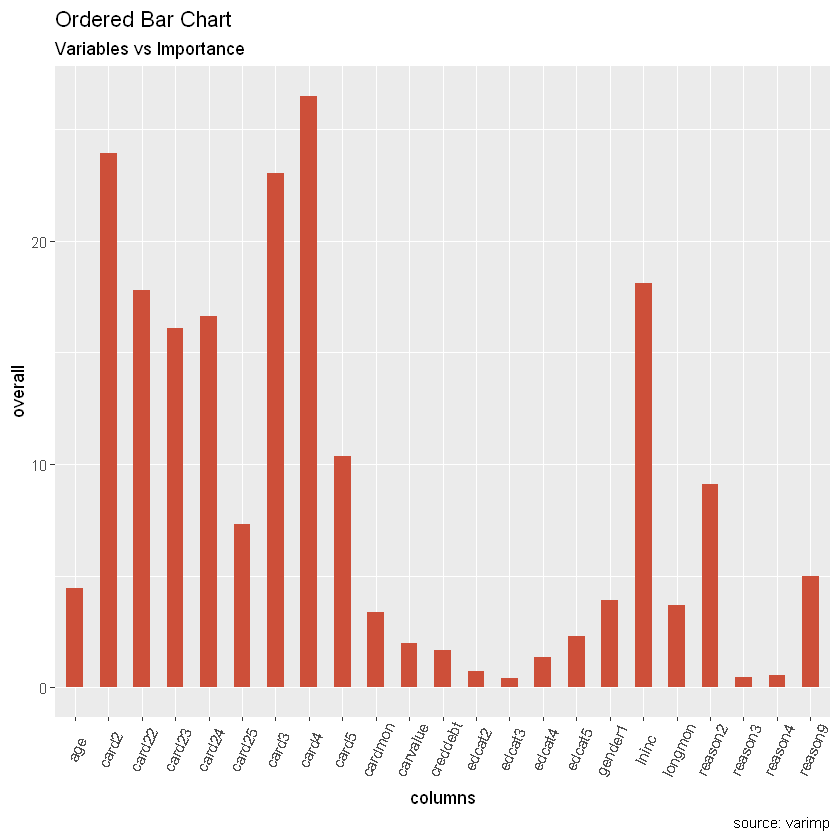

In [98]:
# Variable Importance: Draw a Bar Chart

ggplot(imp, aes(x=columns, y=overall))  + 
  geom_bar(stat="identity", width=.5, fill="tomato3") + 
  labs(title="Ordered Bar Chart", 
       subtitle="Variables vs Importance", 
       caption="source: varimp") + 
  theme(axis.text.x = element_text(angle=65, vjust=0.6))